<table align="center" width=100%>
    <tr>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Natural Language Processing Project <br><br> Twitter Sentiment Analysis
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### Problem Statement

The power of social media in spreading a message cannot be discounted for in today's world. What may begin as a single statement or post by an individual could be a trending topic within a matter of hours, thanks to the global connectivity made easy by social media platforms. Although, this is a boon when it comes to connectivity and staying in touch with people in other regions, it can also be delicate when it comes to sensitive issues being propogated among the masses.

For the most part of it, social media is the number one goto place to ask for help or provide help to those in need, be it a personal emergency or a public health hazard like the COVID pandemic or a natural disaster. However, with the pros of social media also comes the cons of the spread of negative ideas targeted towards a specific section of the society for example, racism, hate speech, false information etc

The social media platforms are implemeting stringent rules and improving their algorithms to filter out such illicit content, however from time to time such content does originate and spread and cause unrest in that specifc region of origin.

In order to keep this under control, it would be useful to implement certain algorithms which are able to detect the polarity score of any individual or group on the social media and take appropriate action if their profile and the related content looks suspicious.

Keeping the above problem statement in mind, we have implemented a few algorithms from the Natural Language Processing toolkit using Python, to analyse the content of tweets made by individuals and decide whether their account should be scrutinised further.

# Data Scraping

In [1]:
import tweepy

In [75]:
consumer_key = 'XXXXXXXXXXXXXX'
consumer_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXX'

access_token = 'XXXXXXXXXXXXXX-XXXXXXXXXXXXX'
access_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXXXX'

auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True,wait_on_rate_limit_notify=True)

### Scraping tweets based on user timeline

###### Elon Musk

In [236]:
import pandas as pd
tweets6 = pd.DataFrame()

for page in range(1,18):
    musk_tweets = api.user_timeline(screen_name='elonmusk', page=page, tweet_mode = 'extended', count=200)
    
    for tweet in musk_tweets:
        temp = {
            'created_at': tweet.created_at,
            'text': tweet.full_text,
            'likes': tweet.favorite_count,
            'retweets': tweet.retweet_count,
            'source': tweet.source
        }
        tweets6 = tweets6.append(temp, ignore_index=True)
tweets6.shape

(422, 5)

In [259]:
tweets6.head()

created_at    likes  retweets              source  \
0 2021-07-16 05:21:24   5994.0     277.0  Twitter for iPhone   
1 2021-07-16 03:35:46  12071.0     544.0  Twitter for iPhone   
2 2021-07-15 21:17:11   1991.0     105.0  Twitter for iPhone   
3 2021-07-15 21:15:36   4825.0     324.0  Twitter for iPhone   
4 2021-07-15 18:13:38   5370.0     191.0  Twitter for iPhone   

                                                text  
0  @AustinTeslaClub @SpaceX @austinbarnard45 @PPa...  
1            @Erdayastronaut @SpaceX Probably Monday  
2               @AaronS5_ @FrenchieEAP @karpathy Yes  
3  @FrenchieEAP @karpathy FSD beta 9 is using the...  
4  @Erdayastronaut @Model3Owners How about a wifi...

In [260]:
tweets6.tail()

created_at    likes  retweets              source  \
417 2020-10-22 20:33:06   2754.0      74.0  Twitter for iPhone   
418 2020-10-22 19:21:23   2304.0      43.0  Twitter for iPhone   
419 2020-10-22 16:23:06  15389.0     466.0  Twitter for iPhone   
420 2020-10-22 07:01:37   3388.0      48.0  Twitter for iPhone   
421 2020-10-22 06:30:28  57310.0    2363.0  Twitter for iPhone   

                                                  text  
417  @DMC_Ryan Well, we have said many times that t...  
418  @StephenKing Agreed. Are these performance tires?  
419  @SpaceX Just a small-seeming issue with loss o...  
420                                      @flcnhvy Sure  
421  Now that Tesla FSD beta is out in limited rele...

In [247]:
df_em_final = pd.DataFrame()
for page in range(1,21):
    tweets =  tweepy.Cursor(api.user_timeline,screen_name='elonmusk',tweet_mode='extended').items(2000)
    for tweet in tweets:
        temp = {
            'created_at': tweet.created_at,
            'likes': tweet.favorite_count,
            'retweets': tweet.retweet_count,
            'source': tweet.source,
            'text': tweet.full_text,
        }
        df_em_final = df_em_final.append(temp,ignore_index=True)
df_em_final.shape

(642, 5)

In [261]:
df_em_final.head()

created_at    likes  retweets              source  \
0 2021-07-16 05:21:24   6280.0     296.0  Twitter for iPhone   
1 2021-07-16 03:35:46  12521.0     565.0  Twitter for iPhone   
2 2021-07-15 21:17:11   2013.0     106.0  Twitter for iPhone   
3 2021-07-15 21:15:36   4843.0     325.0  Twitter for iPhone   
4 2021-07-15 18:13:38   5397.0     192.0  Twitter for iPhone   

                                                text  
0  @AustinTeslaClub @SpaceX @austinbarnard45 @PPa...  
1            @Erdayastronaut @SpaceX Probably Monday  
2               @AaronS5_ @FrenchieEAP @karpathy Yes  
3  @FrenchieEAP @karpathy FSD beta 9 is using the...  
4  @Erdayastronaut @Model3Owners How about a wifi...

In [262]:
df_em_final.tail()

created_at   likes  retweets              source  \
637 2021-07-14 15:58:45   927.0      81.0  Twitter for iPhone   
638 2021-07-14 04:18:30  3619.0     274.0  Twitter for iPhone   
639 2021-07-14 04:13:35  3146.0     358.0  Twitter for iPhone   
640 2021-07-14 02:42:29     0.0    2865.0  Twitter for iPhone   
641 2021-07-13 23:37:55  2567.0     147.0  Twitter for iPhone   

                                                  text  
637  @JamesHarrisNow @flummery5 @justindeanlee @Zai...  
638  @YounieTyler @tobyliiiiiiiiii I’m trying to se...  
639  @tobyliiiiiiiiii Population collapse is what’s...  
640  RT @Tesla: You can stream Netflix &amp; YouTub...  
641  @YounieTyler @astro_g_dogg Booster is more tha...

In [249]:
em4 = pd.DataFrame()
for page in range(1,100):
    tweets =  tweepy.Cursor(api.user_timeline,page=page,tweet_mode='extended',screen_name='elonmusk').items(200)
    for tweet in tweets:
        temp = {
            'created_at': tweet.created_at,
            'likes': tweet.favorite_count,
            'retweets': tweet.retweet_count,
            'source': tweet.source,
            'text': tweet.full_text,
        }
        em4 = em4.append(temp,ignore_index=True)
em4.shape

(282, 5)

In [263]:
em4.head()

created_at    likes  retweets              source  \
0 2021-07-16 05:21:24   6309.0     297.0  Twitter for iPhone   
1 2021-07-16 03:35:46  12561.0     566.0  Twitter for iPhone   
2 2021-07-15 21:17:11   2018.0     106.0  Twitter for iPhone   
3 2021-07-15 21:15:36   4845.0     326.0  Twitter for iPhone   
4 2021-07-15 18:13:38   5398.0     192.0  Twitter for iPhone   

                                                text  
0  @AustinTeslaClub @SpaceX @austinbarnard45 @PPa...  
1            @Erdayastronaut @SpaceX Probably Monday  
2               @AaronS5_ @FrenchieEAP @karpathy Yes  
3  @FrenchieEAP @karpathy FSD beta 9 is using the...  
4  @Erdayastronaut @Model3Owners How about a wifi...

In [264]:
em4.tail()

created_at    likes  retweets              source  \
277 2020-12-17 04:43:52   4232.0     127.0  Twitter for iPhone   
278 2020-12-17 04:08:02  24962.0     365.0  Twitter for iPhone   
279 2020-12-16 19:05:56   2855.0      47.0  Twitter for iPhone   
280 2020-12-16 18:09:21   3958.0      93.0  Twitter for iPhone   
281 2020-12-16 17:05:37   9318.0     252.0  Twitter for iPhone   

                                                  text  
277        @Teslarati @13ericralph31 This is incorrect  
278                                  @TheBabylonBee 🤣🤣  
279  @pcgamer But it is visually stunning &amp; pla...  
280  @pcgamer A t-shirt being better armor than a K...  
281  @cleantechnica Oh and umm … https://t.co/jtg94...

In [251]:
import pandas as pd
tweets_em_final = pd.DataFrame()

for page in range(1,50):
    musk_tweets = api.user_timeline(screen_name='elonmusk', page=page, tweet_mode = 'extended', count=200)
    
    for tweet in musk_tweets:
        temp = {
            'created_at': tweet.created_at,
            'text': tweet.full_text,
            'likes': tweet.favorite_count,
            'retweets': tweet.retweet_count,
            'source': tweet.source
        }
        tweets_em_final = tweets_em_final.append(temp, ignore_index=True)
tweets_em_final.shape

(622, 5)

In [265]:
tweets_em_final.head()

created_at    likes  retweets              source  \
0 2021-07-16 05:21:24   6324.0     298.0  Twitter for iPhone   
1 2021-07-16 03:35:46  12591.0     565.0  Twitter for iPhone   
2 2021-07-15 21:17:11   2022.0     106.0  Twitter for iPhone   
3 2021-07-15 21:15:36   4847.0     326.0  Twitter for iPhone   
4 2021-07-15 18:13:38   5402.0     193.0  Twitter for iPhone   

                                                text  
0  @AustinTeslaClub @SpaceX @austinbarnard45 @PPa...  
1            @Erdayastronaut @SpaceX Probably Monday  
2               @AaronS5_ @FrenchieEAP @karpathy Yes  
3  @FrenchieEAP @karpathy FSD beta 9 is using the...  
4  @Erdayastronaut @Model3Owners How about a wifi...

In [266]:
tweets_em_final.tail()

created_at    likes  retweets              source  \
617 2020-09-10 23:12:44   7158.0     177.0  Twitter for iPhone   
618 2020-09-10 21:49:27  36104.0    2374.0  Twitter for iPhone   
619 2020-09-10 21:02:15  92423.0    2702.0  Twitter for iPhone   
620 2020-09-10 07:35:15   2294.0      79.0  Twitter for iPhone   
621 2020-09-10 06:22:52   4728.0     348.0  Twitter for iPhone   

                                                  text  
617                           @flcnhvy 🇩🇪 Natürlich 🇩🇪  
618  Bitte arbeiten Sie bei Tesla Giga Berlin! Es w...  
619  @MonicaLewinsky Try a Tesla &amp; you’re welco...  
620           @slashdot Vera Rubin Observatory is cool  
621         @PPathole @eugenelee3 @UniverCurious 1+1=2

In [253]:
import pandas as pd
tweets_em_final_2 = pd.DataFrame()

for page in range(1,50):
    musk_tweets = api.user_timeline(screen_name='elonmusk', page=page, tweet_mode = 'extended', count=200)
    
    for tweet in musk_tweets:
        temp = {
            'created_at': tweet.created_at,
            'text': tweet.full_text,
            'likes': tweet.favorite_count,
            'retweets': tweet.retweet_count,
            'source': tweet.source
        }
        tweets_em_final_2 = tweets_em_final_2.append(temp, ignore_index=True)
tweets_em_final_2.shape

(222, 5)

In [267]:
tweets_em_final_2.head()

created_at    likes  retweets              source  \
0 2021-07-16 05:21:24   6334.0     298.0  Twitter for iPhone   
1 2021-07-16 03:35:46  12607.0     565.0  Twitter for iPhone   
2 2021-07-15 21:17:11   2023.0     106.0  Twitter for iPhone   
3 2021-07-15 21:15:36   4847.0     326.0  Twitter for iPhone   
4 2021-07-15 18:13:38   5403.0     193.0  Twitter for iPhone   

                                                text  
0  @AustinTeslaClub @SpaceX @austinbarnard45 @PPa...  
1            @Erdayastronaut @SpaceX Probably Monday  
2               @AaronS5_ @FrenchieEAP @karpathy Yes  
3  @FrenchieEAP @karpathy FSD beta 9 is using the...  
4  @Erdayastronaut @Model3Owners How about a wifi...

In [268]:
tweets_em_final_2.tail()

created_at    likes  retweets              source  \
217 2020-07-30 08:33:48    894.0      55.0  Twitter for iPhone   
218 2020-07-30 08:19:44  37655.0    4768.0  Twitter for iPhone   
219 2020-07-30 08:15:23    709.0      10.0  Twitter for iPhone   
220 2020-07-30 08:11:14   1608.0      93.0  Twitter for iPhone   
221 2020-07-30 08:03:46    871.0      24.0  Twitter for iPhone   

                                                  text  
217  @jelle56367384 @Anvithvittal @DNPthree @tiesto...  
218                 Losing It\nhttps://t.co/9HOY0ldzg4  
219                        @EuroSandor @RSprachrohr 🤣🤣  
220  @RenataKonkoly @Sneakyness Mein Herz Brennt. B...  
221                         @flcnhvy Robot Heart is 🔥🔥

In [293]:
final_elon_df = pd.concat([tweets6,df_em_final,em4,tweets_em_final,tweets_em_final_2],ignore_index=True)

In [294]:
final_elon_df.shape

(2190, 5)

In [295]:
final_elon_df.drop_duplicates(inplace=True,ignore_index=True)

In [296]:
final_elon_df

created_at    likes  retweets              source  \
0    2021-07-16 05:21:24   5994.0     277.0  Twitter for iPhone   
1    2021-07-16 03:35:46  12071.0     544.0  Twitter for iPhone   
2    2021-07-15 21:17:11   1991.0     105.0  Twitter for iPhone   
3    2021-07-15 21:15:36   4825.0     324.0  Twitter for iPhone   
4    2021-07-15 18:13:38   5370.0     191.0  Twitter for iPhone   
...                  ...      ...       ...                 ...   
1516 2020-07-30 08:33:48    894.0      55.0  Twitter for iPhone   
1517 2020-07-30 08:19:44  37655.0    4768.0  Twitter for iPhone   
1518 2020-07-30 08:15:23    709.0      10.0  Twitter for iPhone   
1519 2020-07-30 08:11:14   1608.0      93.0  Twitter for iPhone   
1520 2020-07-30 08:03:46    871.0      24.0  Twitter for iPhone   

                                                   text  
0     @AustinTeslaClub @SpaceX @austinbarnard45 @PPa...  
1               @Erdayastronaut @SpaceX Probably Monday  
2                  @AaronS5_ @FrenchieEAP @karpathy Yes  
3     @FrenchieEAP @karpathy FSD beta 9 is using the...  
4     @Erdayastronaut @Model3Owners How about a wifi...  
...                                                 ...  
1516  @jelle56367384 @Anvithvittal @DNPthree @tiesto...  
1517                 Losing It\nhttps://t.co/9HOY0ldzg4  
1518                        @EuroSandor @RSprachrohr 🤣🤣  
1519  @RenataKonkoly @Sneakyness Mein Herz Brennt. B...  
1520                         @flcnhvy Robot Heart is 🔥🔥  

[1521 rows x 5 columns]

###### Neil DeGrasse Tyson

In [240]:
import pandas as pd
neil_tweets_final = pd.DataFrame()

for page in range(1,20):
    degrasse_tweets = api.user_timeline(screen_name='neiltyson', page=page, tweet_mode = 'extended',count=200)
    
    for tweet in degrasse_tweets:
        temp = {
            'created_at': tweet.created_at,
            'text': tweet.full_text,
            'likes': tweet.favorite_count,
            'retweets': tweet.retweet_count,
            'source': tweet.source
        }
        neil_tweets_final = neil_tweets_final.append(temp, ignore_index=True)
neil_tweets_final.shape

(3205, 5)

In [269]:
neil_tweets_final.head()

created_at    likes  retweets                source  \
0 2021-07-15 20:40:34  14849.0    2583.0             TweetDeck   
1 2021-07-13 18:57:33    107.0       3.0    Twitter for iPhone   
2 2021-07-13 15:48:15  28164.0    1173.0             TweetDeck   
3 2021-07-13 12:29:44  10616.0    1299.0  Twitter Media Studio   
4 2021-07-08 03:42:24  10385.0     705.0             TweetDeck   

                                                text  
0  Relative to a Schoolroom Globe…\n\nPlanet Mars...  
1  @PabloDurissimo Thank you, but my English keyb...  
2  13 July 2021\nHappy 77th Birthday, Ernö Rubik\...  
3  A message that occasionally bears repeating. D...  
4  Hmm.  Makes you wonder which came first, the #...

In [270]:
neil_tweets_final.tail()

created_at   likes  retweets     source  \
3200 2015-04-21 01:06:20  3672.0     885.0  TweetDeck   
3201 2015-04-21 00:55:09  2081.0     603.0  TweetDeck   
3202 2015-04-21 00:49:07  3395.0     908.0  TweetDeck   
3203 2015-04-21 00:44:04  2489.0     633.0  TweetDeck   
3204 2015-04-21 00:37:40  1476.0     391.0  TweetDeck   

                                                   text  
3200  Hey @GeorgeTakei, you turn 79 today but you lo...  
3201  Hey @GeorgeTakei, FYI: Your 79 orbits around t...  
3202  Hey @GeorgeTakei, you were born 119.5 billion ...  
3203  Hey @GeorgeTakei, I hear today is your birthda...  
3204  Hey @GeorgeTakei - Honored to have you as my i...

In [299]:
neil_tweets_final.drop_duplicates(inplace=True)

In [300]:
neil_tweets_final

created_at    likes  retweets                source  \
0    2021-07-15 20:40:34  14849.0    2583.0             TweetDeck   
1    2021-07-13 18:57:33    107.0       3.0    Twitter for iPhone   
2    2021-07-13 15:48:15  28164.0    1173.0             TweetDeck   
3    2021-07-13 12:29:44  10616.0    1299.0  Twitter Media Studio   
4    2021-07-08 03:42:24  10385.0     705.0             TweetDeck   
...                  ...      ...       ...                   ...   
3200 2015-04-21 01:06:20   3672.0     885.0             TweetDeck   
3201 2015-04-21 00:55:09   2081.0     603.0             TweetDeck   
3202 2015-04-21 00:49:07   3395.0     908.0             TweetDeck   
3203 2015-04-21 00:44:04   2489.0     633.0             TweetDeck   
3204 2015-04-21 00:37:40   1476.0     391.0             TweetDeck   

                                                   text  
0     Relative to a Schoolroom Globe…\n\nPlanet Mars...  
1     @PabloDurissimo Thank you, but my English keyb...  
2     13 July 2021\nHappy 77th Birthday, Ernö Rubik\...  
3     A message that occasionally bears repeating. D...  
4     Hmm.  Makes you wonder which came first, the #...  
...                                                 ...  
3200  Hey @GeorgeTakei, you turn 79 today but you lo...  
3201  Hey @GeorgeTakei, FYI: Your 79 orbits around t...  
3202  Hey @GeorgeTakei, you were born 119.5 billion ...  
3203  Hey @GeorgeTakei, I hear today is your birthda...  
3204  Hey @GeorgeTakei - Honored to have you as my i...  

[3205 rows x 5 columns]

###### Donald Trump

In [245]:
import pandas as pd
potus_final = pd.DataFrame()

for page in range(1,18):
    potus_45 = api.user_timeline(screen_name='POTUS45', page=page,tweet_mode = 'extended', count=200)
    
    for tweet in potus_45:
        temp = {
            'created_at': tweet.created_at,
            'text': tweet.full_text,
            'likes': tweet.favorite_count,
            'retweets': tweet.retweet_count,
            'source': tweet.source
        }
        potus_final = potus_final.append(temp, ignore_index=True)
potus_final.shape

(1140, 5)

In [273]:
potus_final.head()

created_at  likes  retweets              source  \
0 2020-12-24 20:45:12    0.0   14832.0  Twitter for iPhone   
1 2020-12-08 22:44:21    0.0    5684.0  Twitter for iPhone   
2 2020-12-08 20:14:32    0.0    2527.0  Twitter for iPhone   
3 2020-12-08 20:14:28    0.0    2495.0  Twitter for iPhone   
4 2020-12-08 20:14:25    0.0    1551.0  Twitter for iPhone   

                                                text  
0  RT @WhiteHouse: President @realDonaldTrump and...  
1  RT @WhiteHouse: Every waking moment is about o...  
2  RT @WhiteHouse: We've created the largest, mos...  
3  RT @WhiteHouse: President @realDonaldTrump jus...  
4  RT @WhiteHouse: We have finalized a partnershi...

In [274]:
potus_final.tail()

created_at  likes  retweets           source  \
1135 2019-11-20 15:31:41    0.0    4761.0  The White House   
1136 2019-11-19 19:28:44    0.0    2822.0  The White House   
1137 2019-11-19 19:14:37    0.0    7364.0  The White House   
1138 2019-11-19 19:14:37    0.0    1790.0  The White House   
1139 2019-11-19 16:48:53    0.0    1715.0  The White House   

                                                   text  
1135  RT @WhiteHouse: Shifty Schiff corrects the rec...  
1136  RT @WhiteHouse: Shifty Schiff is inventing fak...  
1137  RT @WhiteHouse: Since the day President @realD...  
1138  RT @WhiteHouse: "They're using this impeachmen...  
1139  RT @WhiteHouse: "I've never had any contact wi...

In [303]:
potus_final.drop_duplicates(inplace=True)

In [304]:
potus_final

created_at  likes  retweets              source  \
0    2020-12-24 20:45:12    0.0   14832.0  Twitter for iPhone   
1    2020-12-08 22:44:21    0.0    5684.0  Twitter for iPhone   
2    2020-12-08 20:14:32    0.0    2527.0  Twitter for iPhone   
3    2020-12-08 20:14:28    0.0    2495.0  Twitter for iPhone   
4    2020-12-08 20:14:25    0.0    1551.0  Twitter for iPhone   
...                  ...    ...       ...                 ...   
1135 2019-11-20 15:31:41    0.0    4761.0     The White House   
1136 2019-11-19 19:28:44    0.0    2822.0     The White House   
1137 2019-11-19 19:14:37    0.0    7364.0     The White House   
1138 2019-11-19 19:14:37    0.0    1790.0     The White House   
1139 2019-11-19 16:48:53    0.0    1715.0     The White House   

                                                   text  
0     RT @WhiteHouse: President @realDonaldTrump and...  
1     RT @WhiteHouse: Every waking moment is about o...  
2     RT @WhiteHouse: We've created the largest, mos...  
3     RT @WhiteHouse: President @realDonaldTrump jus...  
4     RT @WhiteHouse: We have finalized a partnershi...  
...                                                 ...  
1135  RT @WhiteHouse: Shifty Schiff corrects the rec...  
1136  RT @WhiteHouse: Shifty Schiff is inventing fak...  
1137  RT @WhiteHouse: Since the day President @realD...  
1138  RT @WhiteHouse: "They're using this impeachmen...  
1139  RT @WhiteHouse: "I've never had any contact wi...  

[1140 rows x 5 columns]

### Scraping tweets based on keyword search

###### Keyword: 'Donald Trump'

In [222]:
query = 'donald trump'
max_tweets = 5000
tweets =  tweepy.Cursor(api.search, q=query,tweet_mode='extended').items(max_tweets)
df_dt_tweets_2 = pd.DataFrame()
for tweet in tweets:
    temp = {
        'created_at': tweet.created_at,
        'likes': tweet.favorite_count,
        'retweets': tweet.retweet_count,
        'source': tweet.source,
        'text': tweet.full_text,
        'user_name': tweet.user.name,
        'screen_name': tweet.user.screen_name
    }
    df_dt_tweets_2 = df_dt_tweets_2.append(temp,ignore_index=True)
df_dt_tweets_2.shape

Rate limit reached. Sleeping for: 573


(5000, 7)

In [275]:
df_dt_tweets_2.head()

created_at  likes  retweets      screen_name               source  \
0 2021-07-16 07:41:08    0.0       0.0  ImDylanForsberg      Twitter Web App   
1 2021-07-16 07:41:08    0.0     392.0  getonboardkag24     Twitter for iPad   
2 2021-07-16 07:41:05    0.0     712.0   GailB4611579CA     Twitter for iPad   
3 2021-07-16 07:41:04    0.0    8678.0     patmore_kate   Twitter for iPhone   
4 2021-07-16 07:41:00    0.0     775.0  LindaPo48395205  Twitter for Android   

                                                text      user_name  
0  Armin Laschet ist Donald Trump https://t.co/dY...  dylan soprano  
1  RT @GingerGano: I proudly stand with Donald Tr...      Trump Won  
2  RT @donwinslow: .@IvankaTrump is trying to rew...   gail briones  
3  RT @ProjectLincoln: Donald Trump and the GOP w...   Kate Patmore  
4  RT @realLizUSA: NEW!\n\nPowerful statement fro...   Linda Porter

In [306]:
df_dt_tweets_2.tail()

created_at  likes  retweets      screen_name  \
4995 2021-07-16 05:21:00    0.0      77.0      LaReeKirby1   
4996 2021-07-16 05:21:00    0.0     379.0  kristineshofner   
4997 2021-07-16 05:20:59    0.0    1969.0        l_haefner   
4998 2021-07-16 05:20:59    0.0       0.0      danangell11   
4999 2021-07-16 05:20:59    0.0    3156.0        SketchyRN   

                   source                                               text  \
4995  Twitter for Android  RT @TrumpFile: @politvidchannel @Ty___Webb Thi...   
4996      Twitter Web App  RT @AlexandraChalup: While this document relea...   
4997     Twitter for iPad  RT @SethAbramson: I'll tell you that it's a he...   
4998      Twitter Web App  @Christi54508025 @AnthonyCarneir2 @axiomatic11...   
4999  Twitter for Android  RT @KaivanShroff: 🚨BREAKING: leaked documents ...   

                          user_name  
4995                    LaRee Kirby  
4996  Kris Shofner #BidenHarris2020  
4997                    Haefner____  
4998                     Dan Angell  
4999                          Becky

In [307]:
df_dt_tweets_2.drop_duplicates(inplace=True)

In [308]:
df_dt_tweets_2

created_at  likes  retweets      screen_name  \
0    2021-07-16 07:41:08    0.0       0.0  ImDylanForsberg   
1    2021-07-16 07:41:08    0.0     392.0  getonboardkag24   
2    2021-07-16 07:41:05    0.0     712.0   GailB4611579CA   
3    2021-07-16 07:41:04    0.0    8678.0     patmore_kate   
4    2021-07-16 07:41:00    0.0     775.0  LindaPo48395205   
...                  ...    ...       ...              ...   
4995 2021-07-16 05:21:00    0.0      77.0      LaReeKirby1   
4996 2021-07-16 05:21:00    0.0     379.0  kristineshofner   
4997 2021-07-16 05:20:59    0.0    1969.0        l_haefner   
4998 2021-07-16 05:20:59    0.0       0.0      danangell11   
4999 2021-07-16 05:20:59    0.0    3156.0        SketchyRN   

                   source                                               text  \
0         Twitter Web App  Armin Laschet ist Donald Trump https://t.co/dY...   
1        Twitter for iPad  RT @GingerGano: I proudly stand with Donald Tr...   
2        Twitter for iPad  RT @donwinslow: .@IvankaTrump is trying to rew...   
3      Twitter for iPhone  RT @ProjectLincoln: Donald Trump and the GOP w...   
4     Twitter for Android  RT @realLizUSA: NEW!\n\nPowerful statement fro...   
...                   ...                                                ...   
4995  Twitter for Android  RT @TrumpFile: @politvidchannel @Ty___Webb Thi...   
4996      Twitter Web App  RT @AlexandraChalup: While this document relea...   
4997     Twitter for iPad  RT @SethAbramson: I'll tell you that it's a he...   
4998      Twitter Web App  @Christi54508025 @AnthonyCarneir2 @axiomatic11...   
4999  Twitter for Android  RT @KaivanShroff: 🚨BREAKING: leaked documents ...   

                          user_name  
0                     dylan soprano  
1                         Trump Won  
2                      gail briones  
3                      Kate Patmore  
4                      Linda Porter  
...                             ...  
4995                    LaRee Kirby  
4996  Kris Shofner #BidenHarris2020  
4997                    Haefner____  
4998                     Dan Angell  
4999                          Becky  

[5000 rows x 7 columns]

###### Keyword:  #secondwave

In [322]:
query = '#secondwave'
max_tweets = 5000
tweets =  tweepy.Cursor(api.search, q=query,tweet_mode='extended').items(max_tweets)
df_sec_tweets = pd.DataFrame()
for tweet in tweets:
    temp = {
        'created_at': tweet.created_at,
        'likes': tweet.favorite_count,
        'retweets': tweet.retweet_count,
        'source': tweet.source,
        'text': tweet.full_text,
        'user_name': tweet.user.name,
        'screen_name': tweet.user.screen_name
    }
    df_sec_tweets = df_sec_tweets.append(temp,ignore_index=True)
df_sec_tweets.shape

(2045, 7)

In [325]:
df_sec_tweets.head()

created_at  likes  retweets     screen_name               source  \
0 2021-07-16 18:22:10    0.0      11.0  Rai_jijeevisha  Twitter for Android   
1 2021-07-16 17:57:40    0.0       0.0      kkmajumdar   Twitter for iPhone   
2 2021-07-16 17:57:31    0.0       0.0      kkmajumdar   Twitter for iPhone   
3 2021-07-16 17:37:01    0.0       5.0        prabha_j      Twitter Web App   
4 2021-07-16 17:31:59    0.0      19.0   PIBChandigarh  Twitter for Android   

                                                text  \
0  RT @ArunDeshpande20: @myogiadityanath has been...   
1  @BBCNews Seriously #UK you seriously want #Fre...   
2  Seriously #UK you seriously want #FreedomDay c...   
3  RT @newslaundry: UP's peak positivity figure o...   
4  RT @PIB_India: Dr. VK Paul, Member (Health), @...   

                            user_name  
0                     PAWAN KUMAR RAI  
1  Kaushik Majumdar #YNWA #LFCforlife  
2  Kaushik Majumdar #YNWA #LFCforlife  
3                for Aslan! پربھا آپا  
4                   PIB in Chandigarh

In [326]:
df_sec_tweets.tail()

created_at  likes  retweets      screen_name  \
2040 2021-07-08 13:32:41   50.0       3.0         htTweets   
2041 2021-07-08 13:25:49    0.0       2.0        rohit2093   
2042 2021-07-08 13:11:30    0.0       1.0  fiona_fionnagal   
2043 2021-07-08 13:07:07    0.0       1.0   BlayneyDeborah   
2044 2021-07-08 12:39:41    3.0       2.0        ApniShala   

                   source                                               text  \
2040            TweetDeck  "Rs 23,000 crores package to be given to deal ...   
2041      Twitter Web App  RT @ApniShala: A big thank you to all the part...   
2042      Twitter Web App  RT @BlayneyDeborah: @globalhlthtwit @MegHillie...   
2043  Twitter for Android  @globalhlthtwit @MegHillier @NAOorguk highly c...   
2044  Twitter for Android  A big thank you to all the participants for ma...   

                  user_name  
2040        Hindustan Times  
2041                  Rohit  
2042  Sniomhadair MacKenzie  
2043        deborah blayney  
2044             Apni Shala

In [328]:
df_sec_tweets.drop_duplicates(inplace=True)

In [329]:
df_sec_tweets

created_at  likes  retweets      screen_name  \
0    2021-07-16 18:22:10    0.0      11.0   Rai_jijeevisha   
1    2021-07-16 17:57:40    0.0       0.0       kkmajumdar   
2    2021-07-16 17:57:31    0.0       0.0       kkmajumdar   
3    2021-07-16 17:37:01    0.0       5.0         prabha_j   
4    2021-07-16 17:31:59    0.0      19.0    PIBChandigarh   
...                  ...    ...       ...              ...   
2040 2021-07-08 13:32:41   50.0       3.0         htTweets   
2041 2021-07-08 13:25:49    0.0       2.0        rohit2093   
2042 2021-07-08 13:11:30    0.0       1.0  fiona_fionnagal   
2043 2021-07-08 13:07:07    0.0       1.0   BlayneyDeborah   
2044 2021-07-08 12:39:41    3.0       2.0        ApniShala   

                   source                                               text  \
0     Twitter for Android  RT @ArunDeshpande20: @myogiadityanath has been...   
1      Twitter for iPhone  @BBCNews Seriously #UK you seriously want #Fre...   
2      Twitter for iPhone  Seriously #UK you seriously want #FreedomDay c...   
3         Twitter Web App  RT @newslaundry: UP's peak positivity figure o...   
4     Twitter for Android  RT @PIB_India: Dr. VK Paul, Member (Health), @...   
...                   ...                                                ...   
2040            TweetDeck  "Rs 23,000 crores package to be given to deal ...   
2041      Twitter Web App  RT @ApniShala: A big thank you to all the part...   
2042      Twitter Web App  RT @BlayneyDeborah: @globalhlthtwit @MegHillie...   
2043  Twitter for Android  @globalhlthtwit @MegHillier @NAOorguk highly c...   
2044  Twitter for Android  A big thank you to all the participants for ma...   

                               user_name  
0                        PAWAN KUMAR RAI  
1     Kaushik Majumdar #YNWA #LFCforlife  
2     Kaushik Majumdar #YNWA #LFCforlife  
3                   for Aslan! پربھا آپا  
4                      PIB in Chandigarh  
...                                  ...  
2040                     Hindustan Times  
2041                               Rohit  
2042               Sniomhadair MacKenzie  
2043                     deborah blayney  
2044                          Apni Shala  

[2045 rows x 7 columns]

###### Keyword:  #spacetourism

In [343]:
query = '#spacetourism'
max_tweets = 5000
tweets =  tweepy.Cursor(api.search, q=query,tweet_mode='extended').items(max_tweets)
df_st_tweets = pd.DataFrame()
for tweet in tweets:
    temp = {
        'created_at': tweet.created_at,
        'likes': tweet.favorite_count,
        'retweets': tweet.retweet_count,
        'source': tweet.source,
        'text': tweet.full_text,
        'user_name': tweet.user.name,
        'screen_name': tweet.user.screen_name
    }
    df_st_tweets = df_st_tweets.append(temp,ignore_index=True)
df_st_tweets.shape

Rate limit reached. Sleeping for: 625


(1987, 7)

In [344]:
df_st_tweets.head()

created_at  likes  retweets     screen_name               source  \
0 2021-07-16 20:06:23    0.0       6.0        arukundo  Twitter for Android   
1 2021-07-16 20:05:02    0.0       0.0      NSR_SatCom       Hootsuite Inc.   
2 2021-07-16 19:57:34    0.0      21.0  simplemama2013  Twitter for Android   
3 2021-07-16 19:54:04    0.0       6.0   thegentlejain  Twitter for Android   
4 2021-07-16 19:49:13    0.0       6.0        Shi4Tech      Twitter Web App   

                                                text  \
0  RT @PawlowskiMario: This is what #JeffBezos's ...   
1  Space Tourism &amp; Travel Market opportunity ...   
2  RT @touristmtravel: First Space Tourism Travel...   
3  RT @PawlowskiMario: This is what #JeffBezos's ...   
4  RT @PawlowskiMario: This is what #JeffBezos's ...   

                   user_name  
0               Alex Rukundo  
1                        NSR  
2        Simple Mama At Home  
3               Akshat Jain✨  
4  Shi4Tech 💙 #TechForGood 💙

In [345]:
df_st_tweets.tail()

created_at  likes  retweets      screen_name  \
1982 2021-07-09 00:25:06    1.0       1.0      grahm_larry   
1983 2021-07-08 18:16:42    0.0       0.0  YourChiaroscuro   
1984 2021-07-08 15:10:04    0.0       1.0       godfrey_G_   
1985 2021-07-08 12:50:03    0.0       0.0       maristpoll   
1986 2021-07-08 12:32:49    1.0       0.0  officiallydarko   

                   source                                               text  \
1982      Twitter Web App  $SPCE \nThe Run Can Continue After 7/11\n\nhtt...   
1983     Twitter for iPad  This was, of course, before “Lord Help the Poo...   
1984           AiSpaceBot  RT @JohnStoepler: Factbox: #JeffBezos, #Richar...   
1985        Sprout Social  Is the Silent Generation over space? No comet....   
1986  Twitter for Android  Counting with you...\n\n#VirginGalactic #space...   

                                             user_name  
1982                                       Larry Grahm  
1983  ShootThatDeerBetweenTheHeadlights (Figurative 🤬)  
1984                                          godfrey™  
1985                                       Marist Poll  
1986                                             Darko

In [346]:
df_st_tweets.drop_duplicates(inplace=True)

In [347]:
df_st_tweets

created_at  likes  retweets      screen_name  \
0    2021-07-16 20:06:23    0.0       6.0         arukundo   
1    2021-07-16 20:05:02    0.0       0.0       NSR_SatCom   
2    2021-07-16 19:57:34    0.0      21.0   simplemama2013   
3    2021-07-16 19:54:04    0.0       6.0    thegentlejain   
4    2021-07-16 19:49:13    0.0       6.0         Shi4Tech   
...                  ...    ...       ...              ...   
1982 2021-07-09 00:25:06    1.0       1.0      grahm_larry   
1983 2021-07-08 18:16:42    0.0       0.0  YourChiaroscuro   
1984 2021-07-08 15:10:04    0.0       1.0       godfrey_G_   
1985 2021-07-08 12:50:03    0.0       0.0       maristpoll   
1986 2021-07-08 12:32:49    1.0       0.0  officiallydarko   

                   source                                               text  \
0     Twitter for Android  RT @PawlowskiMario: This is what #JeffBezos's ...   
1          Hootsuite Inc.  Space Tourism &amp; Travel Market opportunity ...   
2     Twitter for Android  RT @touristmtravel: First Space Tourism Travel...   
3     Twitter for Android  RT @PawlowskiMario: This is what #JeffBezos's ...   
4         Twitter Web App  RT @PawlowskiMario: This is what #JeffBezos's ...   
...                   ...                                                ...   
1982      Twitter Web App  $SPCE \nThe Run Can Continue After 7/11\n\nhtt...   
1983     Twitter for iPad  This was, of course, before “Lord Help the Poo...   
1984           AiSpaceBot  RT @JohnStoepler: Factbox: #JeffBezos, #Richar...   
1985        Sprout Social  Is the Silent Generation over space? No comet....   
1986  Twitter for Android  Counting with you...\n\n#VirginGalactic #space...   

                                             user_name  
0                                         Alex Rukundo  
1                                                  NSR  
2                                  Simple Mama At Home  
3                                         Akshat Jain✨  
4                            Shi4Tech 💙 #TechForGood 💙  
...                                                ...  
1982                                       Larry Grahm  
1983  ShootThatDeerBetweenTheHeadlights (Figurative 🤬)  
1984                                          godfrey™  
1985                                       Marist Poll  
1986                                             Darko  

[1987 rows x 7 columns]

# Sentiment Analysis

# Elon Musk

In [366]:
final_elon_df.shape

(1521, 5)

In [367]:
final_elon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1521 entries, 0 to 1520
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   created_at  1521 non-null   datetime64[ns]
 1   likes       1521 non-null   float64       
 2   retweets    1521 non-null   float64       
 3   source      1521 non-null   object        
 4   text        1521 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 59.5+ KB


In [439]:
import re
docs_1 = final_elon_df['text'].str.lower()
docs_1.head()

0    @austinteslaclub @spacex @austinbarnard45 @ppa...
1              @erdayastronaut @spacex probably monday
2                 @aarons5_ @frenchieeap @karpathy yes
3    @frenchieeap @karpathy fsd beta 9 is using the...
4    @erdayastronaut @model3owners how about a wifi...
Name: text, dtype: object

In [483]:
processed_doc_1 = []
for text in docs_1:
    processed_text = re.sub(r"(?:\@|http?\://https?\://|www)\S+", "", text)
    processed_text = "".join(processed_text).strip()
    processed_doc_1.append(processed_text)

In [484]:
final_doc_1 =  pd.Series(processed_doc_1)

In [532]:
docs_tokens_1 = final_doc_1.str.replace('[^a-z\s#@]', '').str.split(' ')

tokens_1 = []
for tokens in docs_tokens_1:
    tokens_1.extend(tokens)
print('No. of tokens in entire corpus:', len(tokens_1))

No. of tokens in entire corpus: 19481


C:\Users\Python\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [533]:
tokens_freq_1 = pd.Series(tokens_1).value_counts().drop([''])
tokens_freq_1[:5]

to     519
the    501
is     412
a      364
of     342
dtype: int64

In [553]:
import nltk
import numpy as np
common_stopwords = nltk.corpus.stopwords.words('english')
custom_stopwords_1 = ['rt',"it's",'amp','yes','like','also','would']
all_stopwords_1 = np.hstack([common_stopwords, custom_stopwords_1])
len(all_stopwords_1)

186

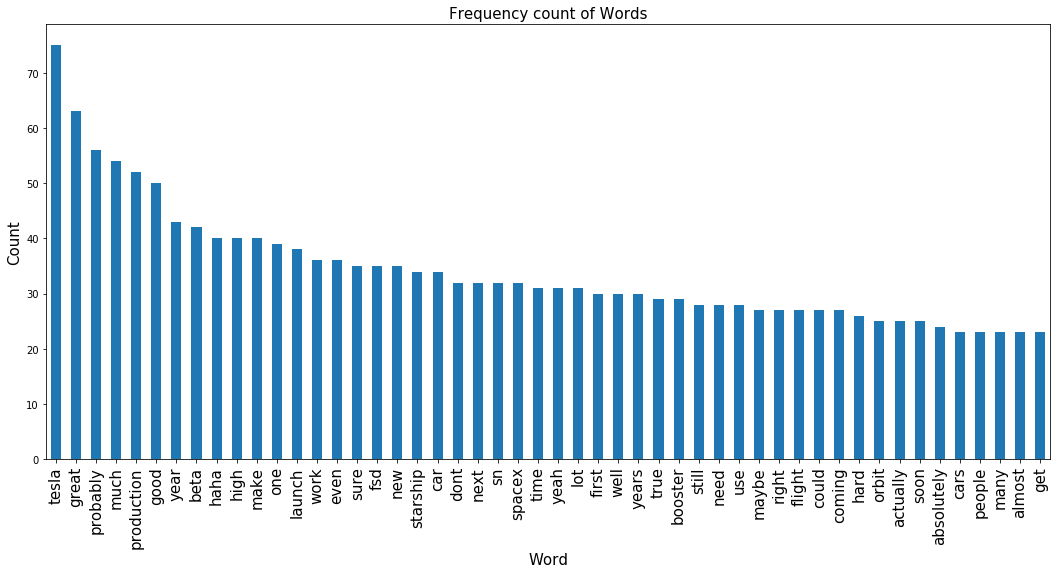

In [790]:
df_tokens_1 = pd.DataFrame(tokens_freq_1).reset_index().rename(columns={'index': 'token', 0: 'frequency'})
df_tokens_1 = df_tokens_1[~df_tokens_1['token'].isin(all_stopwords_1)]
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
df_tokens_1.set_index('token')['frequency'].head(50).plot.bar()
plt.title('Frequency count of Words',fontsize=15)
plt.xlabel('Word',fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

##### Word Cloud of Tweets

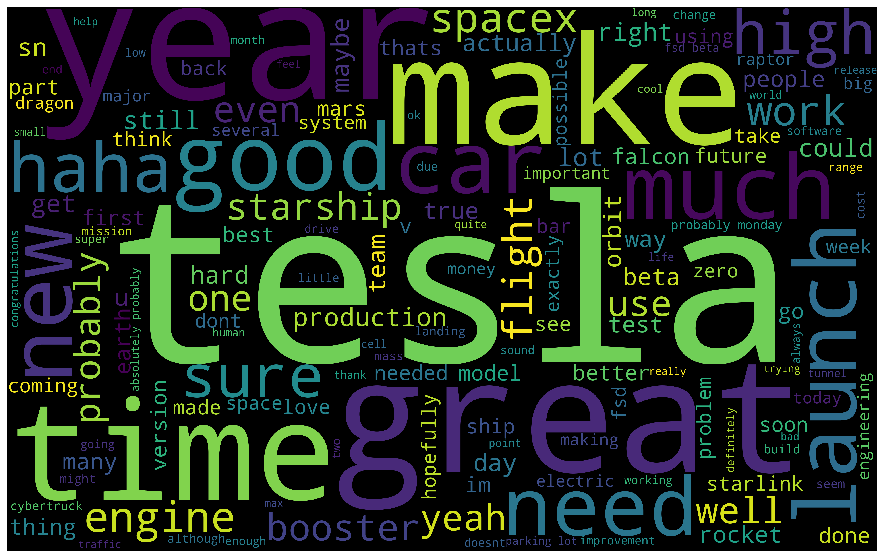

In [789]:
docs_strings_1 = ' '.join(tokens_1)
wc = WordCloud(background_color='Black', stopwords=all_stopwords_1,width=1600,height=1000,
               scale=3,max_words=150,random_state=837,font_step=1,mode='RGB',colormap='viridis').generate(docs_strings_1)
plt.figure(figsize=(40,10))
plt.imshow(wc)
plt.axis('off');

### Model 1:  Sentiment Analysis using SentimentIntensityAnalyzer

In [796]:
elon_senti = final_elon_df.copy()

In [797]:
elon_senti.head()

created_at    likes  retweets              source  \
0 2021-07-16 05:21:24   5994.0     277.0  Twitter for iPhone   
1 2021-07-16 03:35:46  12071.0     544.0  Twitter for iPhone   
2 2021-07-15 21:17:11   1991.0     105.0  Twitter for iPhone   
3 2021-07-15 21:15:36   4825.0     324.0  Twitter for iPhone   
4 2021-07-15 18:13:38   5370.0     191.0  Twitter for iPhone   

                                                text  
0  @AustinTeslaClub @SpaceX @austinbarnard45 @PPa...  
1            @Erdayastronaut @SpaceX Probably Monday  
2               @AaronS5_ @FrenchieEAP @karpathy Yes  
3  @FrenchieEAP @karpathy FSD beta 9 is using the...  
4  @Erdayastronaut @Model3Owners How about a wifi...

In [803]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Darshan
[nltk_data]     R\AppData\Roaming\nltk_data...


True

In [804]:
analyzer = SentimentIntensityAnalyzer()
elon_senti['sentiment score'] = elon_senti['text'].apply(lambda v: analyzer.polarity_scores(v)['compound'])

In [816]:
print(elon_senti['sentiment score'].max())
print(elon_senti['sentiment score'].min())

0.967
-0.8934


In [815]:
elon_senti[elon_senti['sentiment score'] == -0.8934]

created_at   likes  retweets              source  \
322 2020-11-03 14:59:17  2418.0     105.0  Twitter for iPhone   

                                                  text  sentiment score  
322  @ZainRaz4 @vincent13031925 @JonErlichman Close...          -0.8934

In [817]:
elon_senti[elon_senti['sentiment score'] == 0.967]

created_at   likes  retweets              source  \
1141 2020-09-28 20:08:49  9752.0    1309.0  Twitter for iPhone   

                                                   text  sentiment score  
1141  @vm_one1 @waEMD @SpaceX We will probably IPO S...            0.967

In [836]:
positive_1 = 0
negative_1 = 0
neutral_1 = 0
for score in elon_senti['sentiment score']:
    if score > 0:
        positive_1+=1
    elif score < 0:
        negative_1+=1
    else:
        neutral_1+=1

In [838]:
print(positive_1)
print(negative_1)
print(neutral_1)

720
191
610


In [850]:
pos1_percent = round((positive_1/(positive_1 + negative_1 + neutral_1))*100,2)
neg1_percent = round((negative_1/(positive_1 + negative_1 + neutral_1))*100,2)
neu1_percent = round((neutral_1/(positive_1 + negative_1 + neutral_1))*100,2)

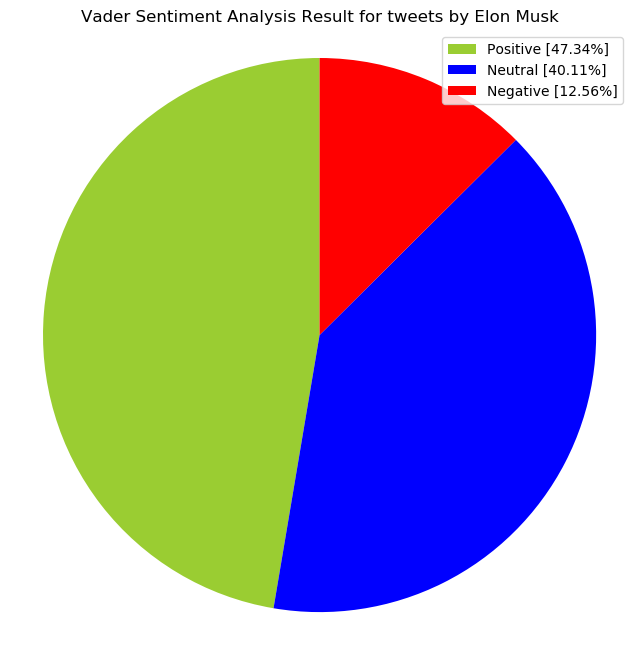

In [1640]:
plt.figure(figsize=(8,8))
labels = ['Positive ['+str(pos1_percent)+'%]' , 'Neutral ['+str(neu1_percent)+'%]','Negative ['+str(neg1_percent)+'%]']
sizes = [positive_1, neutral_1, negative_1]
colors = ['yellowgreen','blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Vader Sentiment Analysis Result for tweets by Elon Musk" )
plt.axis('equal')
plt.show()

In [870]:
df_elon_positive = elon_senti[elon_senti['sentiment score'] > 0]
df_elon_negative = elon_senti[elon_senti['sentiment score'] < 0]
df_elon_neutral = elon_senti[elon_senti['sentiment score'] == 0]

In [872]:
print(len(df_elon_positive))
print(len(df_elon_negative))
print(len(df_elon_neutral))

720
191
610


In [896]:
pos_processed_doc_1 = []
for text in df_elon_positive['text'].str.lower():
    processed_text = re.sub(r"(?:\@|http?\://https?\://|www)\S+", "", text)
    processed_text = "".join(processed_text).strip()
    pos_processed_doc_1.append(processed_text)

In [897]:
pos_final_doc_1 =  pd.Series(pos_processed_doc_1)

In [898]:
pos_docs_tokens_1 = pos_final_doc_1.str.replace('[^a-z\s#@]', '').str.split(' ')

pos_tokens_1 = []
for tokens in pos_docs_tokens_1:
    pos_tokens_1.extend(tokens)
print('No. of tokens in entire corpus:', len(pos_tokens_1))

No. of tokens in entire corpus: 10568


##### Word Cloud of Positive Tweets

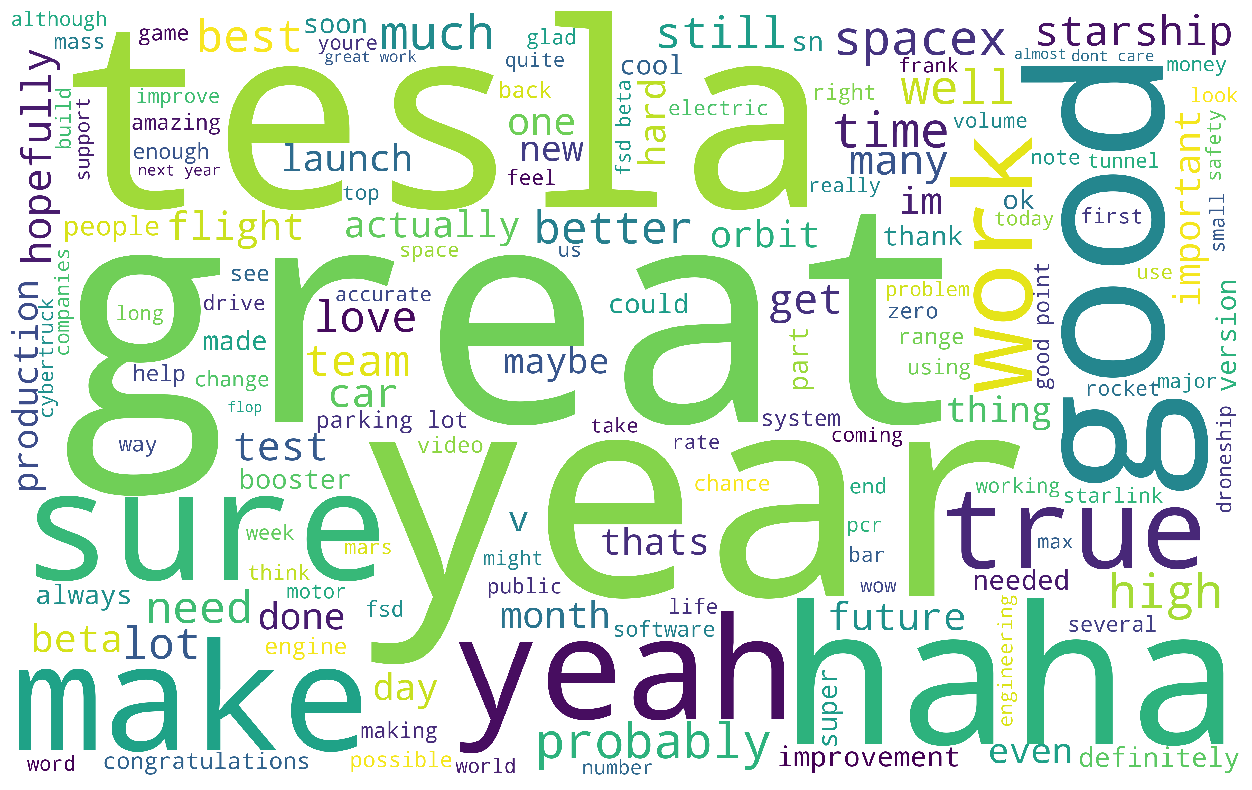

In [921]:
pos_strings_1 = ' '.join(pos_tokens_1)
pos_wc = WordCloud(background_color='White', stopwords=all_stopwords_1,width=1600,height=1000,
               scale=3,max_words=150,random_state=837,font_step=1,mode='RGB',colormap='viridis').generate(pos_strings_1)
plt.figure(figsize=(40,10))
plt.imshow(pos_wc)
plt.axis('off');

In [893]:
from warnings import filterwarnings
filterwarnings('ignore')

##### Word Cloud of Negative Tweets

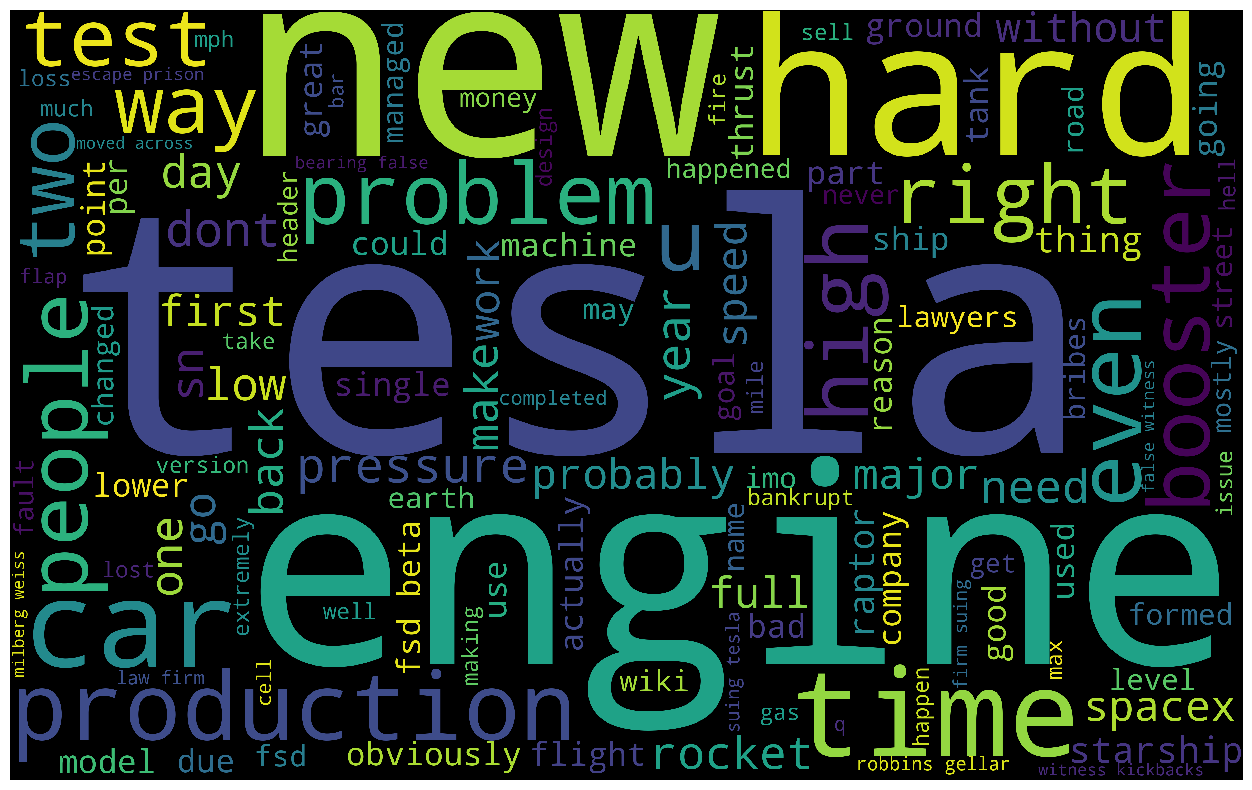

In [924]:
neg_processed_doc_1 = []
for text in df_elon_negative['text'].str.lower():
    processed_text = re.sub(r"(?:\@|http?\://https?\://|www)\S+", "", text)
    processed_text = "".join(processed_text).strip()
    neg_processed_doc_1.append(processed_text)
    
neg_final_doc_1 =  pd.Series(neg_processed_doc_1)

neg_docs_tokens_1 = neg_final_doc_1.str.replace('[^a-z\s#@]', '').str.split(' ')

neg_tokens_1 = []
for tokens in neg_docs_tokens_1:
    neg_tokens_1.extend(tokens)

neg_strings_1 = ' '.join(neg_tokens_1)
neg_wc = WordCloud(background_color='black', stopwords=all_stopwords_1,width=1600,height=1000,
               scale=3,max_words=150,random_state=612,font_step=1,mode='RGB',colormap='viridis',
                   min_font_size=20,max_font_size=450,prefer_horizontal=0.5).generate(neg_strings_1)
plt.figure(figsize=(40,10))
plt.imshow(neg_wc)
plt.axis('off');

##### Word Cloud of Neutral Tweets

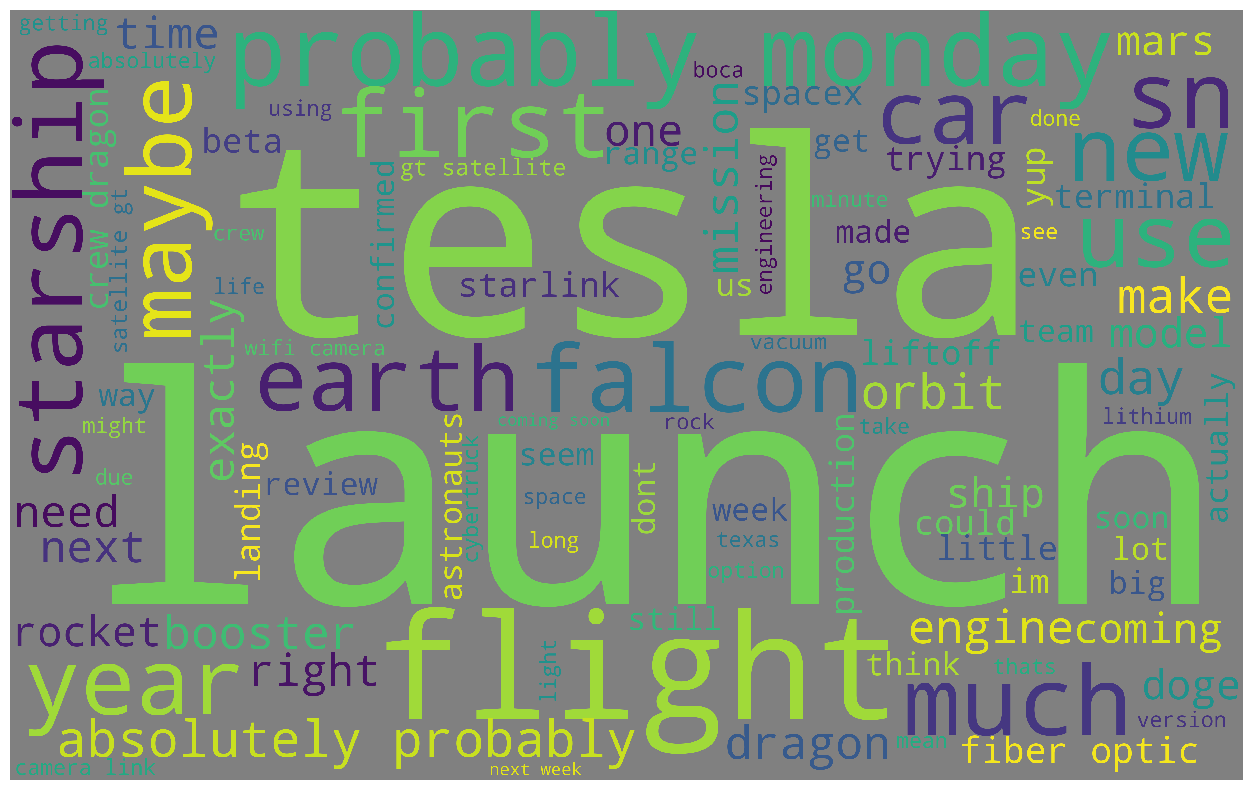

In [919]:
neu_processed_doc_1 = []
for text in df_elon_neutral['text'].str.lower():
    processed_text = re.sub(r"(?:\@|http?\://https?\://|www)\S+", "", text)
    processed_text = "".join(processed_text).strip()
    neu_processed_doc_1.append(processed_text)
    
neu_final_doc_1 =  pd.Series(neu_processed_doc_1)

neu_docs_tokens_1 = neu_final_doc_1.str.replace('[^a-z\s#@]', '').str.split(' ')

neu_tokens_1 = []
for tokens in neu_docs_tokens_1:
    neu_tokens_1.extend(tokens)

neu_strings_1 = ' '.join(neu_tokens_1)
neu_wc = WordCloud(background_color='gray', stopwords=all_stopwords_1,width=1600,height=1000,
               scale=3,max_words=100,random_state=837,font_step=1,mode='RGB',colormap='viridis').generate(neu_strings_1)
plt.figure(figsize=(40,10))
plt.imshow(neu_wc)
plt.axis('off');

### Model 2: Sentiment Anslysis uding TextBlob

In [926]:
elon_senti

created_at    likes  retweets              source  \
0    2021-07-16 05:21:24   5994.0     277.0  Twitter for iPhone   
1    2021-07-16 03:35:46  12071.0     544.0  Twitter for iPhone   
2    2021-07-15 21:17:11   1991.0     105.0  Twitter for iPhone   
3    2021-07-15 21:15:36   4825.0     324.0  Twitter for iPhone   
4    2021-07-15 18:13:38   5370.0     191.0  Twitter for iPhone   
...                  ...      ...       ...                 ...   
1516 2020-07-30 08:33:48    894.0      55.0  Twitter for iPhone   
1517 2020-07-30 08:19:44  37655.0    4768.0  Twitter for iPhone   
1518 2020-07-30 08:15:23    709.0      10.0  Twitter for iPhone   
1519 2020-07-30 08:11:14   1608.0      93.0  Twitter for iPhone   
1520 2020-07-30 08:03:46    871.0      24.0  Twitter for iPhone   

                                                   text  sentiment score  
0     @AustinTeslaClub @SpaceX @austinbarnard45 @PPa...           0.0000  
1               @Erdayastronaut @SpaceX Probably Monday           0.0000  
2                  @AaronS5_ @FrenchieEAP @karpathy Yes           0.4019  
3     @FrenchieEAP @karpathy FSD beta 9 is using the...           0.5719  
4     @Erdayastronaut @Model3Owners How about a wifi...           0.0000  
...                                                 ...              ...  
1516  @jelle56367384 @Anvithvittal @DNPthree @tiesto...           0.6249  
1517                 Losing It\nhttps://t.co/9HOY0ldzg4          -0.3818  
1518                        @EuroSandor @RSprachrohr 🤣🤣           0.0000  
1519  @RenataKonkoly @Sneakyness Mein Herz Brennt. B...           0.3818  
1520                         @flcnhvy Robot Heart is 🔥🔥           0.0000  

[1521 rows x 6 columns]

In [930]:
from textblob import TextBlob

In [952]:
elon_senti['textblob score'] = elon_senti['text'].apply(lambda v: TextBlob(v).sentiment.polarity)

In [954]:
elon_senti.head(25)

created_at    likes  retweets              source  \
0  2021-07-16 05:21:24   5994.0     277.0  Twitter for iPhone   
1  2021-07-16 03:35:46  12071.0     544.0  Twitter for iPhone   
2  2021-07-15 21:17:11   1991.0     105.0  Twitter for iPhone   
3  2021-07-15 21:15:36   4825.0     324.0  Twitter for iPhone   
4  2021-07-15 18:13:38   5370.0     191.0  Twitter for iPhone   
5  2021-07-15 18:11:55   5273.0     448.0  Twitter for iPhone   
6  2021-07-15 18:03:40   6640.0     393.0  Twitter for iPhone   
7  2021-07-15 18:01:20  32009.0    2550.0  Twitter for iPhone   
8  2021-07-15 17:54:08   1819.0     119.0  Twitter for iPhone   
9  2021-07-15 10:14:41   9576.0     571.0  Twitter for iPhone   
10 2021-07-15 08:12:42   2939.0     217.0  Twitter for iPhone   
11 2021-07-15 08:00:53   2853.0     232.0  Twitter for iPhone   
12 2021-07-15 07:55:31   2017.0     194.0  Twitter for iPhone   
13 2021-07-15 07:41:00   6036.0     589.0  Twitter for iPhone   
14 2021-07-15 06:00:11   2481.0     132.0  Twitter for iPhone   
15 2021-07-15 05:59:32   5001.0     192.0  Twitter for iPhone   
16 2021-07-15 05:51:52   2047.0     114.0  Twitter for iPhone   
17 2021-07-15 05:44:30   2026.0      77.0  Twitter for iPhone   
18 2021-07-15 05:08:19   1717.0     119.0  Twitter for iPhone   
19 2021-07-15 05:06:47   1707.0     104.0  Twitter for iPhone   
20 2021-07-15 04:25:44   3273.0      98.0  Twitter for iPhone   
21 2021-07-15 04:24:50   1946.0     138.0  Twitter for iPhone   
22 2021-03-23 00:35:26  15343.0    1193.0  Twitter for iPhone   
23 2021-03-22 02:10:37   3418.0     141.0  Twitter for iPhone   
24 2021-03-21 20:39:07   8052.0     560.0  Twitter for iPhone   

                                                 text  sentiment score  \
0   @AustinTeslaClub @SpaceX @austinbarnard45 @PPa...           0.0000   
1             @Erdayastronaut @SpaceX Probably Monday           0.0000   
2                @AaronS5_ @FrenchieEAP @karpathy Yes           0.4019   
3   @FrenchieEAP @karpathy FSD beta 9 is using the...           0.5719   
4   @Erdayastronaut @Model3Owners How about a wifi...           0.0000   
5   @BLKMDL3 @Model3Owners In end, we kept product...           0.6982   
6   @johnkrausphotos @SpaceX @PortCanaveral Versio...           0.6588   
7   @Model3Owners To be frank, there is always som...           0.8176   
8   @TesLatino @klwtts @jpr007 Tapering down charg...           0.3612   
9   @jpr007 Not bad, although new Model S has more...           0.7016   
10  @stevenmarkryan @Tesla Amazingly, all of this ...          -0.2023   
11  @stevenmarkryan @Tesla So maybe after that, Ro...           0.0000   
12  @stevenmarkryan @Tesla Then the founder of Rob...          -0.1531   
13  @stevenmarkryan @Tesla Robbins Gellar, the law...          -0.3291   
14  @AdrianoinJapan @Kristennetten Yeah, I wuz run...           0.0754   
15                                 @Kristennetten Yup           0.0000   
16  @TeslaGong @ajtourville @PPathole @Adamklotz_ ...           0.0000   
17                      @JxckSweeney @jack Good point           0.4404   
18  @ajtourville @PPathole @Adamklotz_ @AaronS5_ @...           0.7684   
19  @ajtourville @PPathole @Adamklotz_ @AaronS5_ @...           0.0000   
20                                     @PPathole Yeah           0.2960   
21  @PPathole @Adamklotz_ @AaronS5_ @crheller @Spa...           0.0000   
22  @TheMarsSociety SpaceX is developing rockets n...          -0.2280   
23  @bluemoondance74 @NASASpaceflight Going well. ...           0.3382   
24  @NASASpaceflight Hopefully will happen this de...           0.4019   

    textblob score  
0         0.250000  
1         0.000000  
2         0.000000  
3        -0.028571  
4         0.000000  
5         0.125357  
6         0.366667  
7         0.115000  
8         0.136111  
9         0.234091  
10        0.172222  
11       -0.400000  
12        0.100000  
13       -0.200000  
14        0.000000  
15        0.000000  
16        0.000000  
17        0.700000

In [955]:
print(elon_senti['textblob score'].max())
print(elon_senti['textblob score'].min())

1.0
-1.0


In [958]:
elon_senti[elon_senti['textblob score'] == -1]

created_at     likes  retweets              source  \
92   2021-03-12 18:58:22  242650.0   17461.0  Twitter for iPhone   
569  2021-05-29 05:16:45   14726.0     681.0  Twitter for iPhone   
1253 2020-09-17 08:04:35   15144.0     972.0  Twitter for iPhone   

                                                   text  sentiment score  \
92    BTC (Bitcoin) is an anagram of\nTBC(The Boring...          -0.3802   
569        @boringcompany Congrats Boring Company team!           0.3382   
1253                  @Teslarati It will be very insane          -0.4576   

      textblob score  
92              -1.0  
569             -1.0  
1253            -1.0

In [959]:
elon_senti[elon_senti['textblob score'] == 1]

created_at     likes  retweets              source  \
70   2021-03-14 13:55:44   10308.0    1021.0  Twitter for iPhone   
97   2021-03-11 12:47:07   19255.0     690.0  Twitter for iPhone   
183  2021-03-01 19:57:08  282798.0   26557.0  Twitter for iPhone   
201  2021-02-25 21:07:22   12385.0    1121.0  Twitter for iPhone   
262  2020-11-12 15:23:01    2331.0     120.0  Twitter for iPhone   
278  2020-11-09 18:38:23       0.0     521.0  Twitter for iPhone   
340  2020-11-01 22:20:01   15317.0     366.0  Twitter for iPhone   
368  2020-10-30 02:46:57   20213.0     214.0  Twitter for iPhone   
386  2020-10-28 00:19:44    1314.0      35.0  Twitter for iPhone   
397  2020-10-27 03:06:30    2570.0      92.0  Twitter for iPhone   
525  2021-07-01 01:38:27    6878.0     207.0  Twitter for iPhone   
613  2021-01-21 23:08:35  595496.0   56119.0  Twitter for iPhone   
632  2021-01-16 01:29:50   34118.0     659.0  Twitter for iPhone   
661  2020-12-31 05:19:34    9031.0     373.0  Twitter for iPhone   
716  2020-12-17 14:43:03    4975.0     163.0  Twitter for iPhone   
888  2021-01-09 17:10:44    2740.0      98.0  Twitter for iPhone   
1013 2020-10-10 20:37:36    4958.0     207.0  Twitter for iPhone   
1024 2020-10-09 00:56:18     951.0      30.0  Twitter for iPhone   
1068 2020-10-07 13:56:50    4245.0     141.0  Twitter for iPhone   
1070 2020-10-06 21:00:55    7813.0     131.0  Twitter for iPhone   
1259 2020-09-16 19:57:03    1834.0      52.0  Twitter for iPhone   
1286 2020-09-14 08:44:40   10504.0     376.0  Twitter for iPhone   
1371 2020-08-14 22:40:49   25951.0    1328.0  Twitter for iPhone   
1390 2020-08-14 17:35:06    6269.0     145.0  Twitter for iPhone   
1514 2020-07-30 17:04:42    7965.0     204.0  Twitter for iPhone   
1519 2020-07-30 08:11:14    1608.0      93.0  Twitter for iPhone   

                                                   text  sentiment score  \
70    @____AMiR__ @SpaceX We will support as best we...           0.7845   
97    @TrevorMahlmann @SpacePadreIsle Celebrating a ...           0.8439   
183   Doge meme shield (legendary item) https://t.co...           0.0000   
201   @RationalEtienne I hope they do! It would be a...           0.8070   
262                @Cardoso Luck is the best superpower           0.8020   
278   RT @boringcompany: Rumor has it that "Austin C...           0.6705   
340   @AustinTeslaClub @JoeTegtmeyer @peterdog15 @TX...           0.8016   
368                         @SpacePadreIsle Great shot!           0.6588   
386   @TheWPMontgomery @pcgamer One of the best game...           0.6369   
397      @HyperChangeTV Tesla team has done great work!           0.6588   
525                          @Erdayastronaut Impressive           0.5106   
613   Am donating $100M towards a prize for best car...           0.8176   
632                 @DMC_Ryan @Tesla It will be awesome           0.6249   
661                       @jack 🎩 The Greatest Gatsby 🎩           0.6369   
716          @nytimes Very impressive mission by China!           0.5974   
888   @TonyChoMrMagic @TeslaEnergy One of the best T...           0.6369   
1013  @Teslarati Great work by SpaceX valve engineer...           0.6588   
1024  @Astro_FarmerBob @astro_Pettit @AstroKomrade @...           0.6588   
1068  @Erdayastronaut @TrevorMahlmann @johnkrausphot...           0.6696   
1070  @mdcainjr @SpaceX @45thSpaceWing @NASA Great p...           0.6588   
1259                         @Kristennetten Great idea!           0.6588   
1286          @HistoryInPics The LEGO Movie was awesome           0.6249   
1371  Great mission patch design! https://t.co/p2Ic1...           0.6588   
1390                         @Erdayastronaut Impressive           0.5106   
1514  @NASAPersevere @ulalaunch @NASA_LSP Congrats o...           0.8313   
1519  @RenataKonkoly @Sneakyness Mein Herz Brennt. B...           0.3818   

      textblob score  
70               1.0  
97               1.0  
183              1.0  
201              1.0  
262      

In [960]:
positive_1_textblob = 0
negative_1_textblob = 0
neutral_1_textblob = 0
for score in elon_senti['textblob score']:
    if score > 0:
        positive_1_textblob+=1
    elif score < 0:
        negative_1_textblob+=1
    else:
        neutral_1_textblob+=1

In [961]:
print(positive_1_textblob)
print(negative_1_textblob)
print(neutral_1_textblob)

738
191
592


In [968]:
pos1_percent_blobtext = round((positive_1_textblob/(positive_1_textblob + negative_1_textblob + neutral_1_textblob))*100,2)
neg1_percent_blobtext = round((negative_1_textblob/(positive_1_textblob + negative_1_textblob + neutral_1_textblob))*100,2)
neu1_percent_blobtext = round((neutral_1_textblob/(positive_1_textblob + negative_1_textblob + neutral_1_textblob))*100,2)

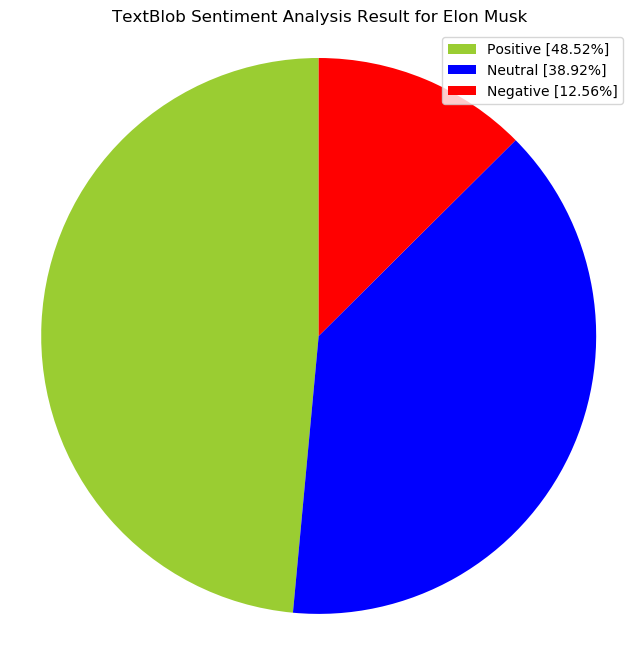

In [969]:
plt.figure(figsize=(8,8))
labels = ['Positive ['+str(pos1_percent_blobtext)+'%]' , 'Neutral ['+str(neu1_percent_blobtext)+'%]','Negative ['+str(neg1_percent_blobtext)+'%]']
sizes = [positive_1_textblob, neutral_1_textblob, negative_1_textblob]
colors = ['yellowgreen','blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("TextBlob Sentiment Analysis Result for Elon Musk" )
plt.axis('equal')
plt.show()

In [962]:
df_elon_positive_textblob = elon_senti[elon_senti['textblob score'] > 0]
df_elon_negative_textblob = elon_senti[elon_senti['textblob score'] < 0]
df_elon_neutral_textblob = elon_senti[elon_senti['textblob score'] == 0]

In [963]:
print(len(df_elon_positive_textblob))
print(len(df_elon_negative_textblob))
print(len(df_elon_neutral_textblob))

738
191
592


##### Word Cloud of Positive Tweets

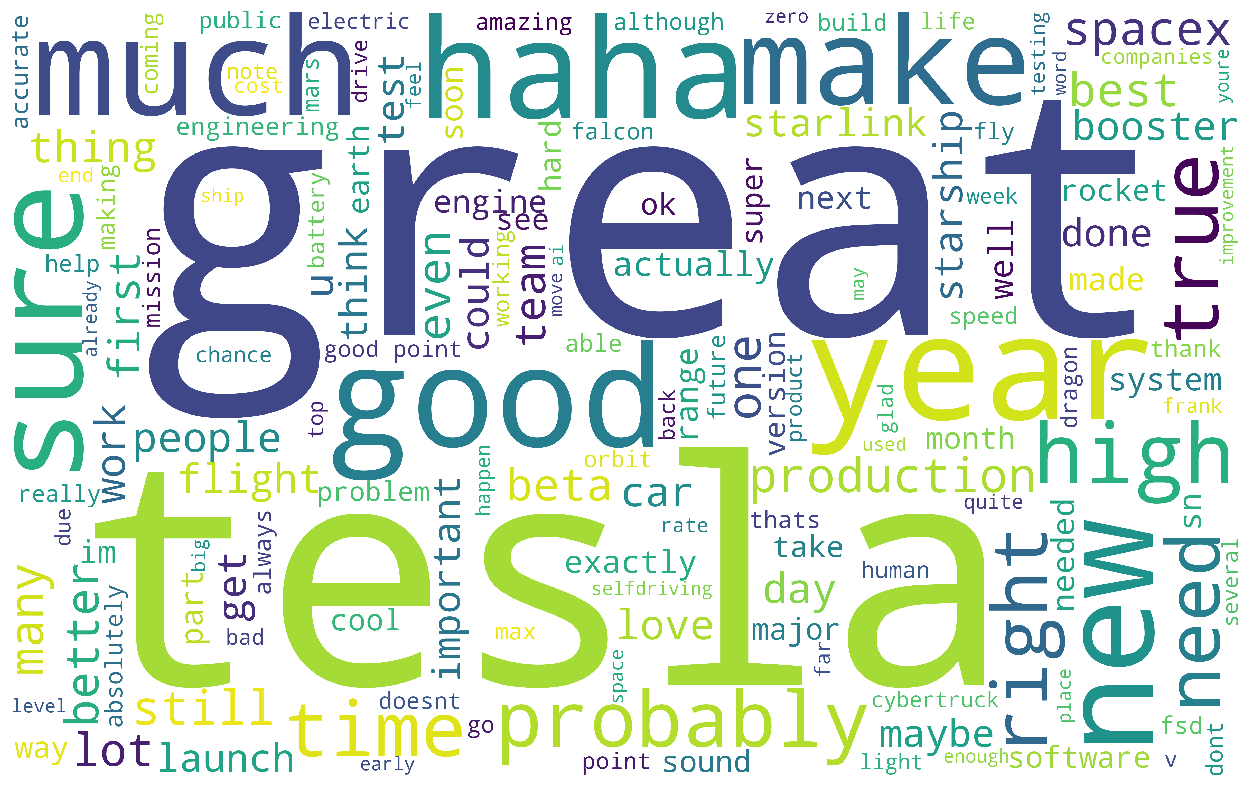

In [967]:
pos_processed_doc_1_textblob = []
for text in df_elon_positive_textblob['text'].str.lower():
    processed_text = re.sub(r"(?:\@|http?\://https?\://|www)\S+", "", text)
    processed_text = "".join(processed_text).strip()
    pos_processed_doc_1_textblob.append(processed_text)
    
pos_final_doc_1_blobtext =  pd.Series(pos_processed_doc_1_textblob)

pos_docs_tokens_1_blobtext = pos_final_doc_1_blobtext.str.replace('[^a-z\s#@]', '').str.split(' ')

pos_tokens_1_blobtext = []
for tokens in pos_docs_tokens_1_blobtext:
    pos_tokens_1_blobtext.extend(tokens)

pos_strings_1_blobtext = ' '.join(pos_tokens_1_blobtext)
pos_wc_blobtext = WordCloud(background_color='white', stopwords=all_stopwords_1,width=1600,height=1000,
               scale=3,max_words=150,random_state=612,font_step=1,mode='RGB',colormap='viridis',
                   min_font_size=20,max_font_size=450,prefer_horizontal=0.5).generate(pos_strings_1_blobtext)
plt.figure(figsize=(40,10))
plt.imshow(pos_wc_blobtext)
plt.axis('off');

##### Word Cloud of Negative Tweets

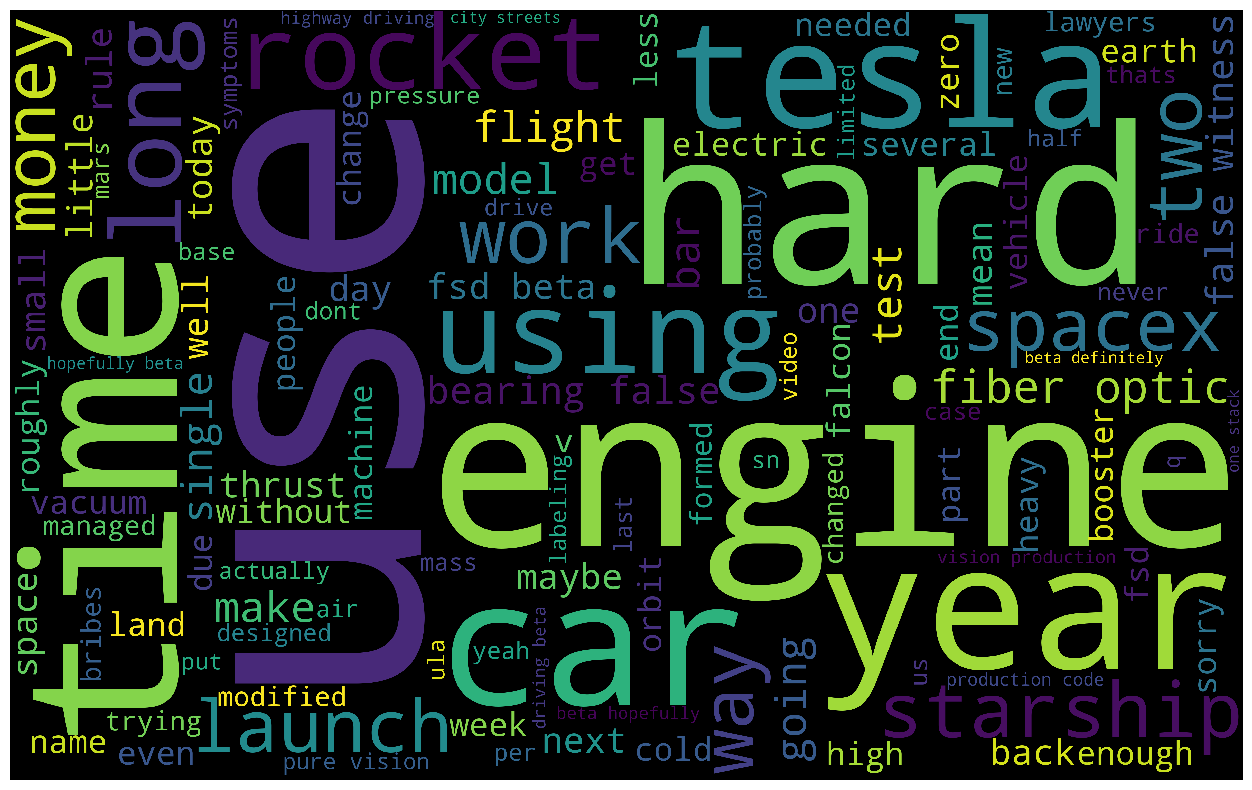

In [971]:
neg_processed_doc_1_textblob = []
for text in df_elon_negative_textblob['text'].str.lower():
    processed_text = re.sub(r"(?:\@|http?\://https?\://|www)\S+", "", text)
    processed_text = "".join(processed_text).strip()
    neg_processed_doc_1_textblob.append(processed_text)
    
neg_final_doc_1_blobtext =  pd.Series(neg_processed_doc_1_textblob)

neg_docs_tokens_1_blobtext = neg_final_doc_1_blobtext.str.replace('[^a-z\s#@]', '').str.split(' ')

neg_tokens_1_blobtext = []
for tokens in neg_docs_tokens_1_blobtext:
    neg_tokens_1_blobtext.extend(tokens)

neg_strings_1_blobtext = ' '.join(neg_tokens_1_blobtext)
neg_wc_blobtext = WordCloud(background_color='black', stopwords=all_stopwords_1,width=1600,height=1000,
               scale=3,max_words=150,random_state=837,font_step=1,mode='RGB',colormap='viridis',
                   min_font_size=20,max_font_size=450,prefer_horizontal=0.5).generate(neg_strings_1_blobtext)
plt.figure(figsize=(40,10))
plt.imshow(neg_wc_blobtext)
plt.axis('off');

##### Word Cloud of Neutral Tweets

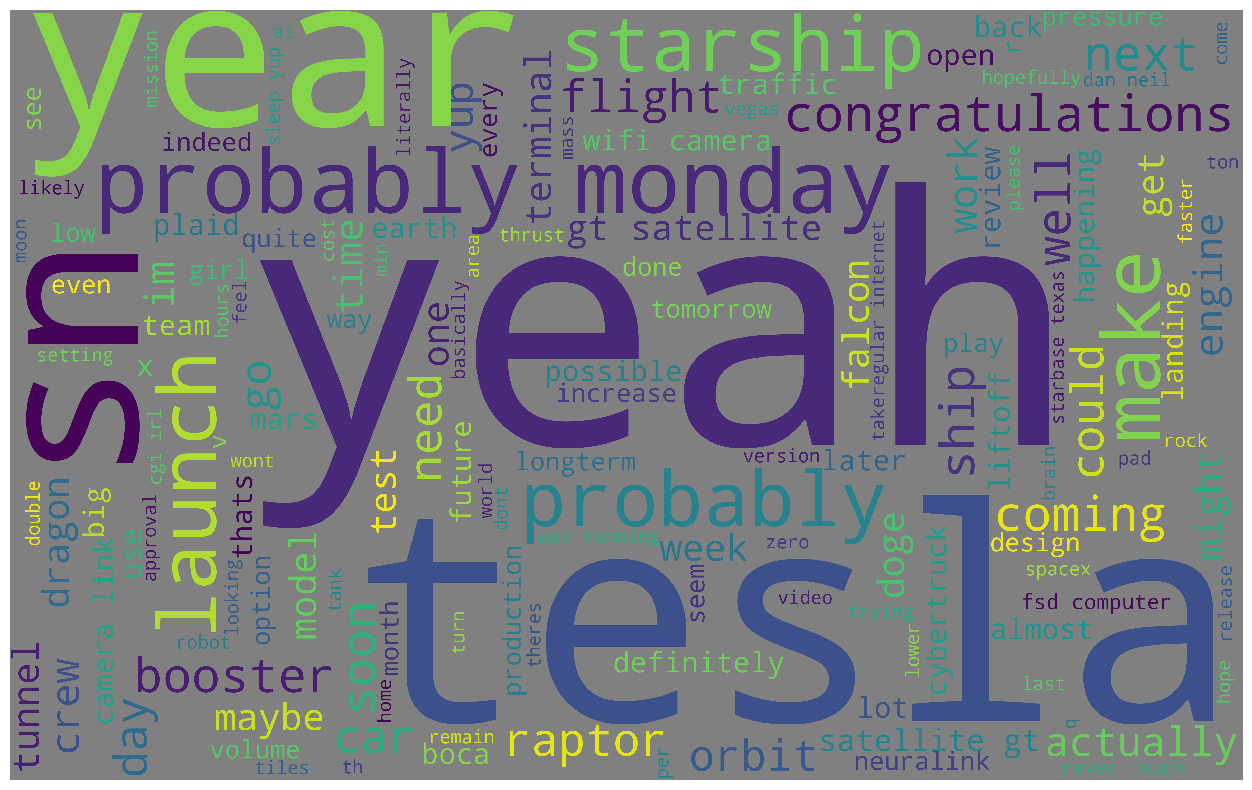

In [975]:
neu_processed_doc_1_textblob = []
for text in df_elon_neutral_textblob['text'].str.lower():
    processed_text = re.sub(r"(?:\@|http?\://https?\://|www)\S+", "", text)
    processed_text = "".join(processed_text).strip()
    neu_processed_doc_1_textblob.append(processed_text)
    
neu_final_doc_1_blobtext =  pd.Series(neu_processed_doc_1_textblob)

neu_docs_tokens_1_blobtext = neu_final_doc_1_blobtext.str.replace('[^a-z\s#@]', '').str.split(' ')

neu_tokens_1_blobtext = []
for tokens in neu_docs_tokens_1_blobtext:
    neu_tokens_1_blobtext.extend(tokens)

neu_strings_1_blobtext = ' '.join(neu_tokens_1_blobtext)
neu_wc_blobtext = WordCloud(background_color='gray', stopwords=all_stopwords_1,width=1600,height=1000,
               scale=3,max_words=150,random_state=837,font_step=1,mode='RGB',colormap='viridis',
                   min_font_size=20,max_font_size=450,prefer_horizontal=0.5).generate(neu_strings_1_blobtext)
plt.figure(figsize=(40,10))
plt.imshow(neu_wc_blobtext)
plt.axis('off');

### Model 3: Sentiment Analysis using Logistic Regression with Stemmed Data

In [1224]:
elon_log_df = elon_senti.copy()

In [1225]:
elon_log_df

created_at    likes  retweets              source  \
0    2021-07-16 05:21:24   5994.0     277.0  Twitter for iPhone   
1    2021-07-16 03:35:46  12071.0     544.0  Twitter for iPhone   
2    2021-07-15 21:17:11   1991.0     105.0  Twitter for iPhone   
3    2021-07-15 21:15:36   4825.0     324.0  Twitter for iPhone   
4    2021-07-15 18:13:38   5370.0     191.0  Twitter for iPhone   
...                  ...      ...       ...                 ...   
1516 2020-07-30 08:33:48    894.0      55.0  Twitter for iPhone   
1517 2020-07-30 08:19:44  37655.0    4768.0  Twitter for iPhone   
1518 2020-07-30 08:15:23    709.0      10.0  Twitter for iPhone   
1519 2020-07-30 08:11:14   1608.0      93.0  Twitter for iPhone   
1520 2020-07-30 08:03:46    871.0      24.0  Twitter for iPhone   

                                                   text  sentiment score  \
0     @AustinTeslaClub @SpaceX @austinbarnard45 @PPa...           0.0000   
1               @Erdayastronaut @SpaceX Probably Monday           0.0000   
2                  @AaronS5_ @FrenchieEAP @karpathy Yes           0.4019   
3     @FrenchieEAP @karpathy FSD beta 9 is using the...           0.5719   
4     @Erdayastronaut @Model3Owners How about a wifi...           0.0000   
...                                                 ...              ...   
1516  @jelle56367384 @Anvithvittal @DNPthree @tiesto...           0.6249   
1517                 Losing It\nhttps://t.co/9HOY0ldzg4          -0.3818   
1518                        @EuroSandor @RSprachrohr 🤣🤣           0.0000   
1519  @RenataKonkoly @Sneakyness Mein Herz Brennt. B...           0.3818   
1520                         @flcnhvy Robot Heart is 🔥🔥           0.0000   

      textblob score  
0           0.250000  
1           0.000000  
2           0.000000  
3          -0.028571  
4           0.000000  
...              ...  
1516        0.800000  
1517        0.000000  
1518        0.000000  
1519        1.000000  
1520        0.000000  

[1521 rows x 7 columns]

In [1226]:
sentiment = []
for score in elon_log_df['sentiment score']:
    if score > 0:
        sentiment.append('Positive')
    elif score < 0:
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')

In [1227]:
elon_log_df['sentiment'] = sentiment

In [1228]:
elon_log_df

created_at    likes  retweets              source  \
0    2021-07-16 05:21:24   5994.0     277.0  Twitter for iPhone   
1    2021-07-16 03:35:46  12071.0     544.0  Twitter for iPhone   
2    2021-07-15 21:17:11   1991.0     105.0  Twitter for iPhone   
3    2021-07-15 21:15:36   4825.0     324.0  Twitter for iPhone   
4    2021-07-15 18:13:38   5370.0     191.0  Twitter for iPhone   
...                  ...      ...       ...                 ...   
1516 2020-07-30 08:33:48    894.0      55.0  Twitter for iPhone   
1517 2020-07-30 08:19:44  37655.0    4768.0  Twitter for iPhone   
1518 2020-07-30 08:15:23    709.0      10.0  Twitter for iPhone   
1519 2020-07-30 08:11:14   1608.0      93.0  Twitter for iPhone   
1520 2020-07-30 08:03:46    871.0      24.0  Twitter for iPhone   

                                                   text  sentiment score  \
0     @AustinTeslaClub @SpaceX @austinbarnard45 @PPa...           0.0000   
1               @Erdayastronaut @SpaceX Probably Monday           0.0000   
2                  @AaronS5_ @FrenchieEAP @karpathy Yes           0.4019   
3     @FrenchieEAP @karpathy FSD beta 9 is using the...           0.5719   
4     @Erdayastronaut @Model3Owners How about a wifi...           0.0000   
...                                                 ...              ...   
1516  @jelle56367384 @Anvithvittal @DNPthree @tiesto...           0.6249   
1517                 Losing It\nhttps://t.co/9HOY0ldzg4          -0.3818   
1518                        @EuroSandor @RSprachrohr 🤣🤣           0.0000   
1519  @RenataKonkoly @Sneakyness Mein Herz Brennt. B...           0.3818   
1520                         @flcnhvy Robot Heart is 🔥🔥           0.0000   

      textblob score sentiment  
0           0.250000   Neutral  
1           0.000000   Neutral  
2           0.000000  Positive  
3          -0.028571  Positive  
4           0.000000   Neutral  
...              ...       ...  
1516        0.800000  Positive  
1517        0.000000  Negative  
1518        0.000000   Neutral  
1519        1.000000  Positive  
1520        0.000000   Neutral  

[1521 rows x 8 columns]

In [1229]:
elon_log_df_final = elon_log_df[['text','sentiment']]

In [1230]:
elon_log_df_final

text sentiment
0     @AustinTeslaClub @SpaceX @austinbarnard45 @PPa...   Neutral
1               @Erdayastronaut @SpaceX Probably Monday   Neutral
2                  @AaronS5_ @FrenchieEAP @karpathy Yes  Positive
3     @FrenchieEAP @karpathy FSD beta 9 is using the...  Positive
4     @Erdayastronaut @Model3Owners How about a wifi...   Neutral
...                                                 ...       ...
1516  @jelle56367384 @Anvithvittal @DNPthree @tiesto...  Positive
1517                 Losing It\nhttps://t.co/9HOY0ldzg4  Negative
1518                        @EuroSandor @RSprachrohr 🤣🤣   Neutral
1519  @RenataKonkoly @Sneakyness Mein Herz Brennt. B...  Positive
1520                         @flcnhvy Robot Heart is 🔥🔥   Neutral

[1521 rows x 2 columns]

In [1231]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from gensim.parsing.preprocessing import PorterStemmer, remove_stopwords
from sklearn.model_selection import train_test_split

In [1232]:
docs_log = elon_log_df_final['text'].str.lower().str.replace('[^a-z\s]', '')
docs_log = docs_log.apply(remove_stopwords)
stemmer = PorterStemmer()
docs_log = stemmer.stem_documents(docs_log)

In [1233]:
train_docs_log, test_docs_log = train_test_split(pd.Series(docs_log), test_size=0.2, random_state=1)


vectorizer_log = CountVectorizer().fit(train_docs_log)
vocab_log = vectorizer_log.get_feature_names()

train_dtm_log = vectorizer_log.transform(train_docs_log)
test_dtm_log= vectorizer_log.transform(test_docs_log)

train_y_log = elon_log_df_final.loc[train_docs_log.index, 'sentiment']
test_y_log = elon_log_df_final.loc[test_docs_log.index, 'sentiment']
print(train_y_log.shape)
print(test_y_log.shape)

(1216,)
(305,)


In [1234]:
train_dtm_log

<1216x3141 sparse matrix of type '<class 'numpy.int64'>'
	with 10131 stored elements in Compressed Sparse Row format>

In [1235]:
test_dtm_log

<305x3141 sparse matrix of type '<class 'numpy.int64'>'
	with 2104 stored elements in Compressed Sparse Row format>

In [1236]:
logistic_model = LogisticRegression().fit(train_dtm_log, train_y_log)
test_y_log_pred = logistic_model.predict(test_dtm_log)

In [1237]:
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix,roc_curve,classification_report
print('Accuracy score: ', accuracy_score(test_y_log, test_y_log_pred))
print('F1 score: ', f1_score(test_y_log, test_y_log_pred,average='weighted'))

Accuracy score:  0.7901639344262295
F1 score:  0.7760246158912455


In [1238]:
print(confusion_matrix(test_y_log, test_y_log_pred))

[[  9  12  12]
 [  1 110  10]
 [  2  27 122]]


In [1239]:
print(classification_report(test_y_log, test_y_log_pred))

              precision    recall  f1-score   support

    Negative       0.75      0.27      0.40        33
     Neutral       0.74      0.91      0.81       121
    Positive       0.85      0.81      0.83       151

    accuracy                           0.79       305
   macro avg       0.78      0.66      0.68       305
weighted avg       0.79      0.79      0.78       305



### Model 4: Sentiment Analysis using Logistic Regression with Lemmatized Data

In [1240]:
from nltk.stem import WordNetLemmatizer
docs_log_lemma = elon_log_df_final['text'].str.lower().str.replace('[^a-z\s]', '')
docs_log_lemma = docs_log_lemma.apply(remove_stopwords)
lemmatizer = WordNetLemmatizer()
docs_log_lemma = docs_log_lemma.apply(lambda x:lemmatizer.lemmatize(x))

In [1241]:
train_docs_log_lemma, test_docs_log_lemma = train_test_split(pd.Series(docs_log_lemma), test_size=0.2, random_state=1)


vectorizer_log_lemma = CountVectorizer().fit(train_docs_log_lemma)
vocab_log_lemma = vectorizer_log_lemma.get_feature_names()

train_dtm_log_lemma = vectorizer_log_lemma.transform(train_docs_log_lemma)
test_dtm_log_lemma= vectorizer_log_lemma.transform(test_docs_log_lemma)

train_y_log_lemma = elon_log_df_final.loc[train_docs_log_lemma.index, 'sentiment']
test_y_log_lemma = elon_log_df_final.loc[test_docs_log_lemma.index, 'sentiment']
print(train_y_log_lemma.shape)
print(test_y_log_lemma.shape)

(1216,)
(305,)


In [1242]:
train_dtm_log_lemma

<1216x3712 sparse matrix of type '<class 'numpy.int64'>'
	with 10209 stored elements in Compressed Sparse Row format>

In [1243]:
test_dtm_log_lemma

<305x3712 sparse matrix of type '<class 'numpy.int64'>'
	with 1988 stored elements in Compressed Sparse Row format>

In [1244]:
logistic_model_lemma = LogisticRegression().fit(train_dtm_log_lemma, train_y_log_lemma)
test_y_log_pred_lemma = logistic_model_lemma.predict(test_dtm_log_lemma)

In [1245]:
print('Accuracy score: ', accuracy_score(test_y_log_lemma, test_y_log_pred_lemma))
print('F1 score: ', f1_score(test_y_log_lemma, test_y_log_pred_lemma,average='weighted'))

Accuracy score:  0.7704918032786885
F1 score:  0.7599288925909112


In [1246]:
print(confusion_matrix(test_y_log_lemma, test_y_log_pred_lemma))

[[ 10  14   9]
 [  1 110  10]
 [  5  31 115]]


In [1247]:
print(classification_report(test_y_log_lemma, test_y_log_pred_lemma))

              precision    recall  f1-score   support

    Negative       0.62      0.30      0.41        33
     Neutral       0.71      0.91      0.80       121
    Positive       0.86      0.76      0.81       151

    accuracy                           0.77       305
   macro avg       0.73      0.66      0.67       305
weighted avg       0.77      0.77      0.76       305



### Model 5: Sentiment Analysis using Logistic Regression with Tfidf Vectorized data (using stemmed data)

In [1248]:
docs_log_tf = elon_log_df_final['text'].str.lower().str.replace('[^a-z\s]', '')
docs_log_tf = docs_log_tf.apply(remove_stopwords)
stemmer = PorterStemmer()
docs_log_tf = stemmer.stem_documents(docs_log_tf)

In [1249]:
train_docs_log_tf, test_docs_log_tf = train_test_split(pd.Series(docs_log_tf), test_size=0.2, random_state=1)


vectorizer_log_tf = TfidfVectorizer().fit(train_docs_log_tf)
vocab_log_tf = vectorizer_log_tf.get_feature_names()

train_dtm_log_tf = vectorizer_log_tf.transform(train_docs_log_tf)
test_dtm_log_tf= vectorizer_log_tf.transform(test_docs_log_tf)

train_y_log_tf = elon_log_df_final.loc[train_docs_log_tf.index, 'sentiment']
test_y_log_tf = elon_log_df_final.loc[test_docs_log_tf.index, 'sentiment']
print(train_y_log_tf.shape)
print(test_y_log_tf.shape)

(1216,)
(305,)


In [1250]:
train_dtm_log_tf

<1216x3141 sparse matrix of type '<class 'numpy.float64'>'
	with 10131 stored elements in Compressed Sparse Row format>

In [1251]:
test_dtm_log_tf

<305x3141 sparse matrix of type '<class 'numpy.float64'>'
	with 2104 stored elements in Compressed Sparse Row format>

In [1252]:
logistic_model_tf = LogisticRegression().fit(train_dtm_log_tf, train_y_log_tf)
test_y_log_pred_tf = logistic_model_tf.predict(test_dtm_log_tf)

In [1253]:
print('Accuracy score: ', accuracy_score(test_y_log_tf, test_y_log_pred_tf))
print('F1 score: ', f1_score(test_y_log_tf, test_y_log_pred_tf,average='weighted'))

Accuracy score:  0.7540983606557377
F1 score:  0.7230865234166085


In [1254]:
print(confusion_matrix(test_y_log_tf, test_y_log_pred_tf))

[[  3  10  20]
 [  0  96  25]
 [  0  20 131]]


In [1255]:
print(classification_report(test_y_log_tf, test_y_log_pred_tf))

              precision    recall  f1-score   support

    Negative       1.00      0.09      0.17        33
     Neutral       0.76      0.79      0.78       121
    Positive       0.74      0.87      0.80       151

    accuracy                           0.75       305
   macro avg       0.84      0.58      0.58       305
weighted avg       0.78      0.75      0.72       305



### Model 6: Sentiment Analysis using Logistic Regression with Tfidf Vectorized data (using Lemmatized data)

In [1221]:
docs_log_lemma_tf = elon_log_df_final['text'].str.lower().str.replace('[^a-z\s]', '')
docs_log_lemma_tf = docs_log_lemma_tf.apply(remove_stopwords)
lemmatizer = WordNetLemmatizer()
docs_log_lemma_tf = docs_log_lemma_tf.apply(lambda x:lemmatizer.lemmatize(x))

In [1256]:
train_docs_log_lemma_tf, test_docs_log_lemma_tf = train_test_split(pd.Series(docs_log_lemma_tf), test_size=0.2, random_state=1)


vectorizer_log_lemma_tf = TfidfVectorizer().fit(train_docs_log_lemma_tf)
vocab_log_lemma_tf = vectorizer_log_lemma_tf.get_feature_names()

train_dtm_log_lemma_tf = vectorizer_log_lemma_tf.transform(train_docs_log_lemma_tf)
test_dtm_log_lemma_tf= vectorizer_log_lemma_tf.transform(test_docs_log_lemma_tf)

train_y_log_lemma_tf = elon_log_df_final.loc[train_docs_log_lemma_tf.index, 'sentiment']
test_y_log_lemma_tf = elon_log_df_final.loc[test_docs_log_lemma_tf.index, 'sentiment']
print(train_y_log_lemma_tf.shape)
print(test_y_log_lemma_tf.shape)

(1216,)
(305,)


In [1257]:
train_dtm_log_lemma_tf

<1216x3712 sparse matrix of type '<class 'numpy.float64'>'
	with 10209 stored elements in Compressed Sparse Row format>

In [1258]:
test_dtm_log_lemma_tf

<305x3712 sparse matrix of type '<class 'numpy.float64'>'
	with 1988 stored elements in Compressed Sparse Row format>

In [1259]:
logistic_model_lemma_tf = LogisticRegression().fit(train_dtm_log_lemma_tf, train_y_log_lemma_tf)
test_y_log_pred_lemma_tf = logistic_model_lemma_tf.predict(test_dtm_log_lemma_tf)

In [1260]:
print('Accuracy score: ', accuracy_score(test_y_log_lemma_tf, test_y_log_pred_lemma_tf))
print('F1 score: ', f1_score(test_y_log_lemma_tf, test_y_log_pred_lemma_tf,average='weighted'))

Accuracy score:  0.7573770491803279
F1 score:  0.7263411258786606


In [1261]:
print(confusion_matrix(test_y_log_lemma_tf, test_y_log_pred_lemma_tf))

[[  3  11  19]
 [  0  98  23]
 [  0  21 130]]


In [1262]:
print(classification_report(test_y_log_lemma_tf, test_y_log_pred_lemma_tf))

              precision    recall  f1-score   support

    Negative       1.00      0.09      0.17        33
     Neutral       0.75      0.81      0.78       121
    Positive       0.76      0.86      0.80       151

    accuracy                           0.76       305
   macro avg       0.84      0.59      0.58       305
weighted avg       0.78      0.76      0.73       305



### Model 7: Sentiment Analysis using NaiveBayes Algorithm

In [1269]:
from sklearn.naive_bayes import MultinomialNB
docs_mnb = elon_log_df_final['text'].str.lower().str.replace('[^a-z\s]', '')
docs_mnb = docs_mnb.apply(remove_stopwords)
stemmer = PorterStemmer()
docs_mnb = stemmer.stem_documents(docs_mnb)

train_docs_mnb, test_docs_mnb = train_test_split(pd.Series(docs_mnb), test_size=0.2, random_state=1)


vectorizer_mnb = CountVectorizer().fit(train_docs_mnb)
vocab_mnb = vectorizer_mnb.get_feature_names()

train_dtm_mnb = vectorizer_mnb.transform(train_docs_mnb)
test_dtm_mnb= vectorizer_mnb.transform(test_docs_mnb)

train_y_mnb = elon_log_df_final.loc[train_docs_mnb.index, 'sentiment']
test_y_mnb = elon_log_df_final.loc[test_docs_mnb.index, 'sentiment']
print(train_y_log.shape)
print(test_y_log.shape)

(1216,)
(305,)


In [1270]:
train_dtm_mnb

<1216x3141 sparse matrix of type '<class 'numpy.int64'>'
	with 10131 stored elements in Compressed Sparse Row format>

In [1271]:
test_dtm_mnb

<305x3141 sparse matrix of type '<class 'numpy.int64'>'
	with 2104 stored elements in Compressed Sparse Row format>

In [1272]:
mnb_model = MultinomialNB().fit(train_dtm_mnb, train_y_mnb)
test_y_mnb_pred = mnb_model.predict(test_dtm_mnb)

In [1274]:
print('Accuracy score: ', accuracy_score(test_y_mnb, test_y_mnb_pred))
print('F1 score: ', f1_score(test_y_mnb, test_y_mnb_pred,average='weighted'))

Accuracy score:  0.6950819672131148
F1 score:  0.6765022381236175


In [1297]:
print(confusion_matrix(test_y_mnb, test_y_mnb_pred))

[[ 11   8  14]
 [  3  63  55]
 [  2  11 138]]


In [1298]:
print(classification_report(test_y_mnb, test_y_mnb_pred))

              precision    recall  f1-score   support

    Negative       0.69      0.33      0.45        33
     Neutral       0.77      0.52      0.62       121
    Positive       0.67      0.91      0.77       151

    accuracy                           0.70       305
   macro avg       0.71      0.59      0.61       305
weighted avg       0.71      0.70      0.68       305



##### Inferences from the models built:


- Among the supervised models which were implemented, it was observed that the Logistic Regression Model built using stemmed data and vectorized using the countvectorizer performed the best in terms of the overall accuracy and the F1 Score


- It was also observed that the Logistic Regression model performed better than the Multinomial NaiveBayes model

##### Polarity Analysis

In [1643]:
elon_log_df[['sentiment score','textblob score']].describe()

sentiment score  textblob score
count      1521.000000     1521.000000
mean          0.188366        0.136391
std           0.348224        0.262617
min          -0.893400       -1.000000
25%           0.000000        0.000000
50%           0.000000        0.000000
75%           0.440400        0.250000
max           0.967000        1.000000

Conclusion: The polarity for the profile of Elon Musk is positive

# Neil DeGrasse Tyson

In [1091]:
neil_tweets_final.shape

(3205, 5)

In [1104]:
docs_2 = neil_tweets_final['text'].str.lower()
docs_2.head()

0    relative to a schoolroom globe…\n\nplanet mars...
1    @pablodurissimo thank you, but my english keyb...
2    13 july 2021\nhappy 77th birthday, ernö rubik\...
3    a message that occasionally bears repeating. d...
4    hmm.  makes you wonder which came first, the #...
Name: text, dtype: object

In [1105]:
processed_doc_2 = []
for text in docs_2:
    processed_text = re.sub(r"(?:\@|http?\://https?\://|www)\S+", "", text)
    processed_text = "".join(processed_text).strip()
    processed_doc_2.append(processed_text)
    
final_doc_2 =  pd.Series(processed_doc_2)

docs_tokens_2 = final_doc_2.str.replace('[^a-z\s#@]', '').str.split(' ')

tokens_2 = []
for tokens in docs_tokens_2:
    tokens_2.extend(tokens)
print('No. of tokens in entire corpus:', len(tokens_2))

No. of tokens in entire corpus: 65752


In [1106]:
tokens_freq_2 = pd.Series(tokens_2).value_counts().drop([''])
tokens_freq_2[:5]

the    3209
of     1543
to     1419
a      1344
in     1141
dtype: int64

In [1110]:
common_stopwords = nltk.corpus.stopwords.words('english')
custom_stopwords_2 = ['rt',"it's",'amp','yes','like','also','would','us','im']
all_stopwords_2 = np.hstack([common_stopwords, custom_stopwords_2])
len(all_stopwords_2)

188

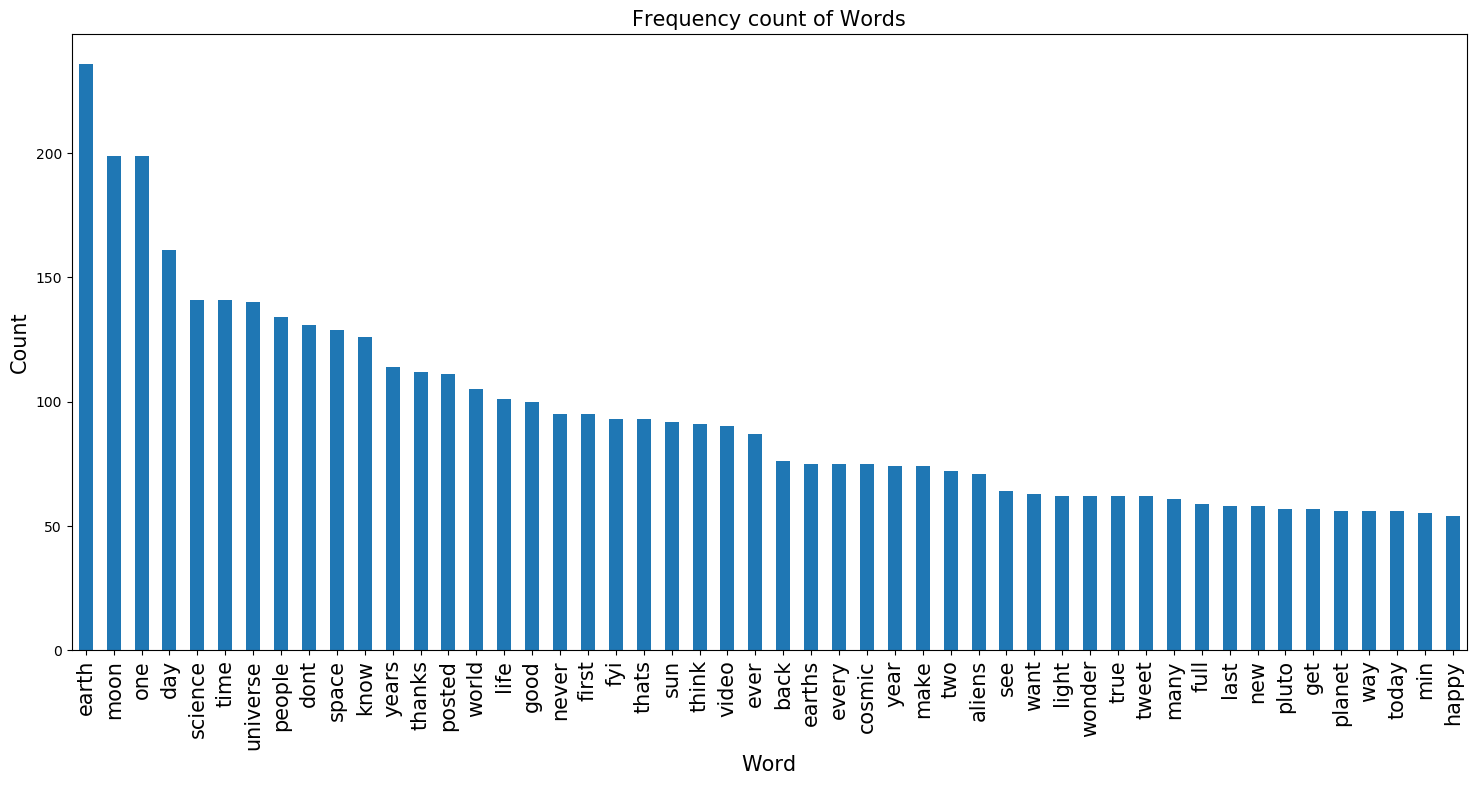

In [1111]:
df_tokens_2 = pd.DataFrame(tokens_freq_2).reset_index().rename(columns={'index': 'token', 0: 'frequency'})
df_tokens_2 = df_tokens_2[~df_tokens_2['token'].isin(all_stopwords_2)]
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
df_tokens_2.set_index('token')['frequency'].head(50).plot.bar()
plt.title('Frequency count of Words',fontsize=15)
plt.xlabel('Word',fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

#### Wordcloud of tweets

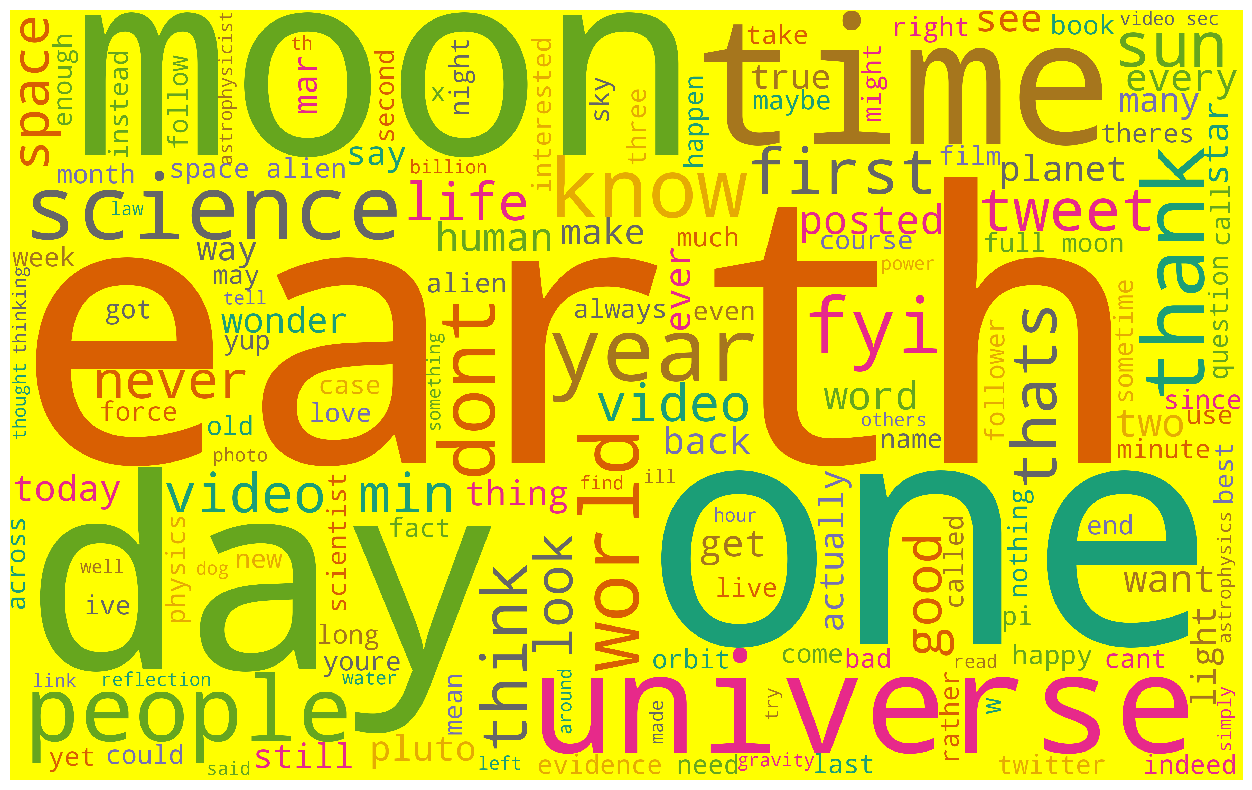

In [1327]:
docs_strings_2 = ' '.join(tokens_2)
wc_2 = WordCloud(background_color='yellow', stopwords=all_stopwords_2,width=1600,height=1000,
               scale=3,max_words=150,random_state=612,font_step=1,mode='RGB',colormap='Dark2_r').generate(docs_strings_2)
plt.figure(figsize=(40,10))
plt.imshow(wc_2)
plt.axis('off');

### Model 1:  Sentiment Analysis using SentimentIntensityAnalyzer

In [1155]:
neil_senti = neil_tweets_final.copy()

In [1156]:
neil_senti.head()

created_at    likes  retweets                source  \
0 2021-07-15 20:40:34  14849.0    2583.0             TweetDeck   
1 2021-07-13 18:57:33    107.0       3.0    Twitter for iPhone   
2 2021-07-13 15:48:15  28164.0    1173.0             TweetDeck   
3 2021-07-13 12:29:44  10616.0    1299.0  Twitter Media Studio   
4 2021-07-08 03:42:24  10385.0     705.0             TweetDeck   

                                                text  
0  Relative to a Schoolroom Globe…\n\nPlanet Mars...  
1  @PabloDurissimo Thank you, but my English keyb...  
2  13 July 2021\nHappy 77th Birthday, Ernö Rubik\...  
3  A message that occasionally bears repeating. D...  
4  Hmm.  Makes you wonder which came first, the #...

In [1157]:
analyzer = SentimentIntensityAnalyzer()
neil_senti['sentiment score'] = neil_senti['text'].apply(lambda v: analyzer.polarity_scores(v)['compound'])
print(neil_senti['sentiment score'].max())
print(neil_senti['sentiment score'].min())

0.9651
-0.9612


In [1158]:
neil_senti[neil_senti['sentiment score'] == -0.9612]

created_at    likes  retweets     source  \
2954 2015-10-02 16:35:45  22088.0   17043.0  TweetDeck   

                                                   text  sentiment score  
2954  Guns don’t kill people. Bullets kill people. F...          -0.9612

In [1159]:
neil_senti[neil_senti['sentiment score'] == 0.9651]

created_at   likes  retweets              source  \
1470 2019-05-14 02:00:44  3944.0     306.0  Twitter for iPhone   

                                                   text  sentiment score  
1470  Congratulations to the @StarTalkRadio family f...           0.9651

In [1160]:
positive_2 = 0
negative_2 = 0
neutral_2 = 0
for score in neil_senti['sentiment score']:
    if score > 0:
        positive_2+=1
    elif score < 0:
        negative_2+=1
    else:
        neutral_2+=1

In [1161]:
print(positive_2)
print(negative_2)
print(neutral_2)

1506
613
1086


In [1162]:
pos2_percent = round((positive_2/(positive_2 + negative_2 + neutral_2))*100,2)
neg2_percent = round((negative_2/(positive_2 + negative_2 + neutral_2))*100,2)
neu2_percent = round((neutral_2/(positive_2 + negative_2 + neutral_2))*100,2)

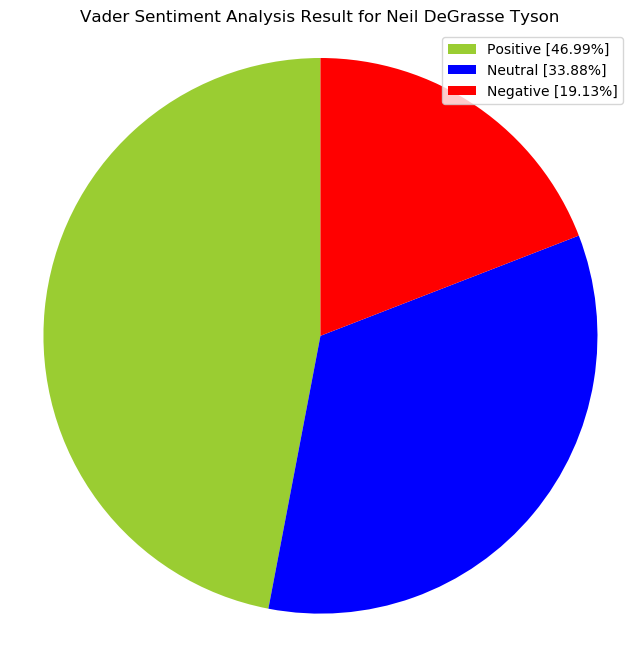

In [1163]:
plt.figure(figsize=(8,8))
labels = ['Positive ['+str(pos2_percent)+'%]' , 'Neutral ['+str(neu2_percent)+'%]','Negative ['+str(neg2_percent)+'%]']
sizes = [positive_2, neutral_2, negative_2]
colors = ['yellowgreen','blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Vader Sentiment Analysis Result for Neil DeGrasse Tyson" )
plt.axis('equal')
plt.show()

In [1164]:
df_neil_positive = neil_senti[neil_senti['sentiment score'] > 0]
df_neil_negative = neil_senti[neil_senti['sentiment score'] < 0]
df_neil_neutral = neil_senti[neil_senti['sentiment score'] == 0]

In [1166]:
print(len(df_neil_positive))
print(len(df_neil_negative))
print(len(df_neil_neutral))

1506
613
1086


##### Wordcloud of positive tweets

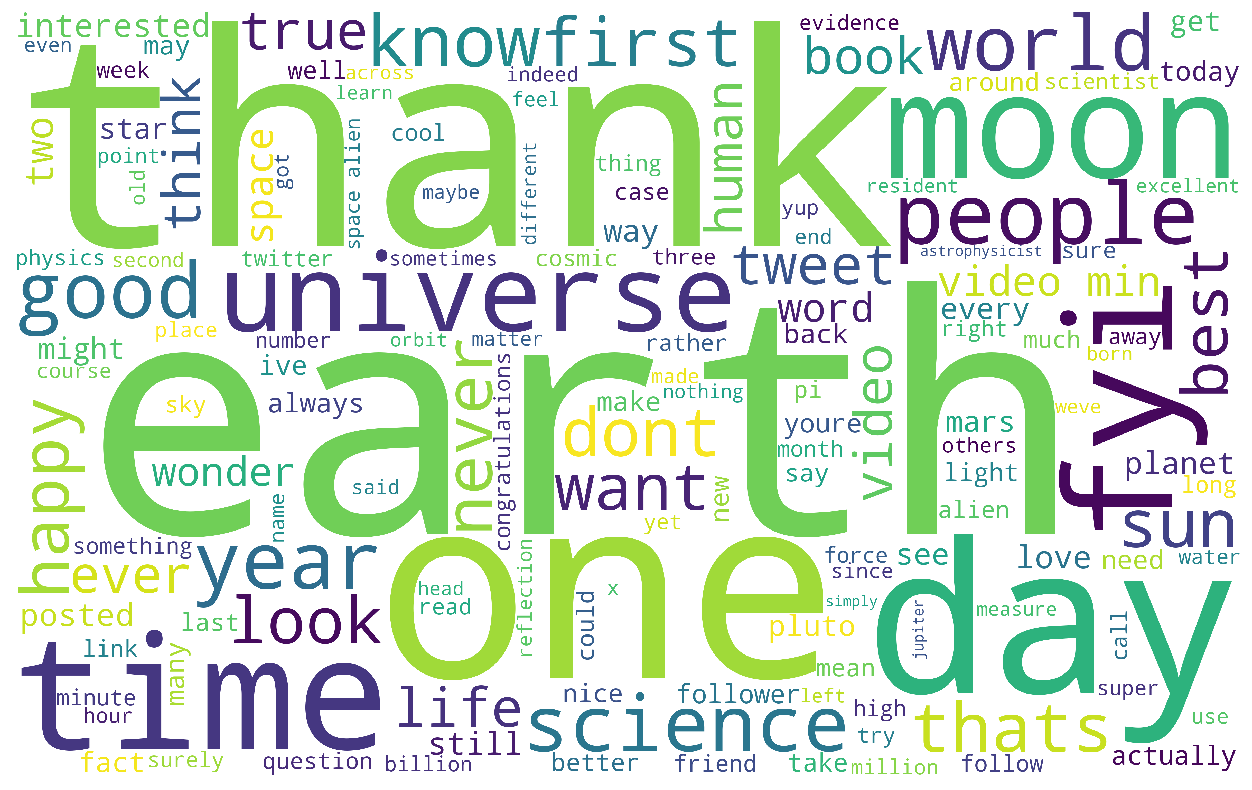

In [1326]:
pos_processed_doc_2 = []
for text in df_neil_positive['text'].str.lower():
    processed_text = re.sub(r"(?:\@|http?\://https?\://|www)\S+", "", text)
    processed_text = "".join(processed_text).strip()
    pos_processed_doc_2.append(processed_text)
    
pos_final_doc_2 =  pd.Series(pos_processed_doc_2)

pos_docs_tokens_2 = pos_final_doc_2.str.replace('[^a-z\s#@]', '').str.split(' ')

pos_tokens_2 = []
for tokens in pos_docs_tokens_2:
    pos_tokens_2.extend(tokens)

pos_strings_2 = ' '.join(pos_tokens_2)
pos_wc_2 = WordCloud(background_color='White', stopwords=all_stopwords_2,width=1600,height=1000,
               scale=3,max_words=150,random_state=837,font_step=1,mode='RGB',colormap='viridis').generate(pos_strings_2)
plt.figure(figsize=(40,10))
plt.imshow(pos_wc_2)
plt.axis('off');

##### Wordcloud of negative tweets

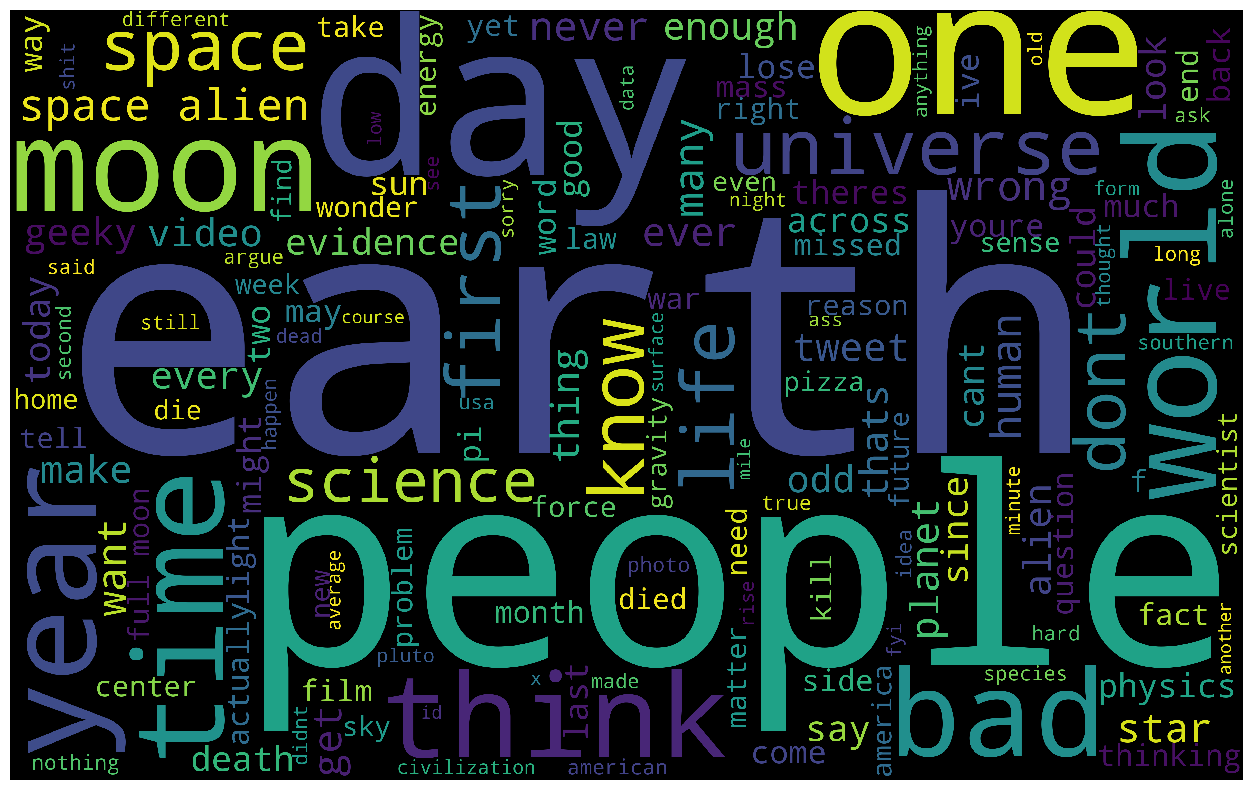

In [1325]:
neg_processed_doc_2 = []
for text in df_neil_negative['text'].str.lower():
    processed_text = re.sub(r"(?:\@|http?\://https?\://|www)\S+", "", text)
    processed_text = "".join(processed_text).strip()
    neg_processed_doc_2.append(processed_text)
    
neg_final_doc_2 =  pd.Series(neg_processed_doc_2)

neg_docs_tokens_2 = neg_final_doc_2.str.replace('[^a-z\s#@]', '').str.split(' ')

neg_tokens_2 = []
for tokens in neg_docs_tokens_2:
    neg_tokens_2.extend(tokens)

neg_strings_2 = ' '.join(neg_tokens_2)
neg_wc_2 = WordCloud(background_color='black', stopwords=all_stopwords_2,width=1600,height=1000,
               scale=3,max_words=150,random_state=612,font_step=1,mode='RGB',colormap='viridis',
                   min_font_size=20,max_font_size=450,prefer_horizontal=0.5).generate(neg_strings_2)
plt.figure(figsize=(40,10))
plt.imshow(neg_wc_2)
plt.axis('off');

##### Wordcloud of neutral tweets

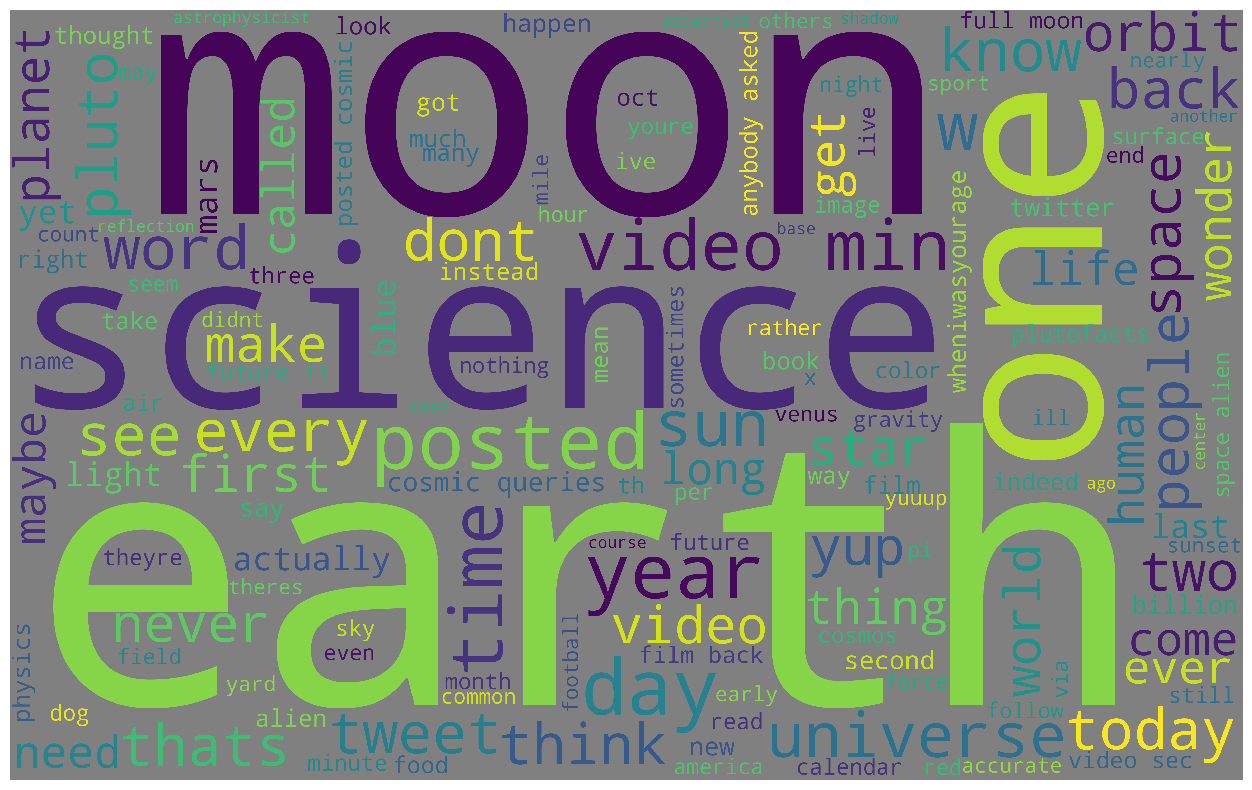

In [1324]:
neu_processed_doc_2 = []
for text in df_neil_neutral['text'].str.lower():
    processed_text = re.sub(r"(?:\@|http?\://https?\://|www)\S+", "", text)
    processed_text = "".join(processed_text).strip()
    neu_processed_doc_2.append(processed_text)
    
neu_final_doc_2 =  pd.Series(neu_processed_doc_2)

neu_docs_tokens_2 = neu_final_doc_2.str.replace('[^a-z\s#@]', '').str.split(' ')

neu_tokens_2 = []
for tokens in neu_docs_tokens_2:
    neu_tokens_2.extend(tokens)

neu_strings_2 = ' '.join(neu_tokens_2)
neu_wc_2 = WordCloud(background_color='gray', stopwords=all_stopwords_2,width=1600,height=1000,
               scale=3,max_words=150,random_state=837,font_step=1,mode='RGB',colormap='viridis').generate(neu_strings_2)
plt.figure(figsize=(40,10))
plt.imshow(neu_wc_2)
plt.axis('off');

### Model 2: Sentiment Anslysis uding TextBlob

In [1173]:
neil_senti

created_at    likes  retweets                source  \
0    2021-07-15 20:40:34  14849.0    2583.0             TweetDeck   
1    2021-07-13 18:57:33    107.0       3.0    Twitter for iPhone   
2    2021-07-13 15:48:15  28164.0    1173.0             TweetDeck   
3    2021-07-13 12:29:44  10616.0    1299.0  Twitter Media Studio   
4    2021-07-08 03:42:24  10385.0     705.0             TweetDeck   
...                  ...      ...       ...                   ...   
3200 2015-04-21 01:06:20   3672.0     885.0             TweetDeck   
3201 2015-04-21 00:55:09   2081.0     603.0             TweetDeck   
3202 2015-04-21 00:49:07   3395.0     908.0             TweetDeck   
3203 2015-04-21 00:44:04   2489.0     633.0             TweetDeck   
3204 2015-04-21 00:37:40   1476.0     391.0             TweetDeck   

                                                   text  sentiment score  
0     Relative to a Schoolroom Globe…\n\nPlanet Mars...           0.0000  
1     @PabloDurissimo Thank you, but my English keyb...          -0.3291  
2     13 July 2021\nHappy 77th Birthday, Ernö Rubik\...           0.8402  
3     A message that occasionally bears repeating. D...           0.9360  
4     Hmm.  Makes you wonder which came first, the #...           0.0000  
...                                                 ...              ...  
3200  Hey @GeorgeTakei, you turn 79 today but you lo...           0.0000  
3201  Hey @GeorgeTakei, FYI: Your 79 orbits around t...           0.3680  
3202  Hey @GeorgeTakei, you were born 119.5 billion ...           0.0000  
3203  Hey @GeorgeTakei, I hear today is your birthda...           0.6360  
3204  Hey @GeorgeTakei - Honored to have you as my i...           0.5859  

[3205 rows x 6 columns]

In [1174]:
neil_senti['textblob score'] = neil_senti['text'].apply(lambda v: TextBlob(v).sentiment.polarity)

In [1175]:
neil_senti.head(25)

created_at    likes  retweets                source  \
0  2021-07-15 20:40:34  14849.0    2583.0             TweetDeck   
1  2021-07-13 18:57:33    107.0       3.0    Twitter for iPhone   
2  2021-07-13 15:48:15  28164.0    1173.0             TweetDeck   
3  2021-07-13 12:29:44  10616.0    1299.0  Twitter Media Studio   
4  2021-07-08 03:42:24  10385.0     705.0             TweetDeck   
5  2021-07-05 15:05:03   4673.0     237.0       Twitter Web App   
6  2021-07-05 14:53:29    198.0       3.0             TweetDeck   
7  2021-07-05 13:24:05    390.0       6.0             TweetDeck   
8  2021-07-05 13:12:24  27199.0    3684.0             TweetDeck   
9  2021-07-04 01:01:23  22669.0    2266.0             TweetDeck   
10 2021-06-28 20:41:00   2218.0     200.0             TweetDeck   
11 2021-06-28 20:30:00   5600.0     447.0             TweetDeck   
12 2021-06-28 20:21:00  10710.0    1160.0             TweetDeck   
13 2021-06-28 20:15:00  14812.0    2377.0             TweetDeck   
14 2021-06-28 20:07:00   3962.0     312.0             TweetDeck   
15 2021-06-28 20:03:00  24048.0    1853.0             TweetDeck   
16 2021-06-28 19:58:00   4809.0     327.0             TweetDeck   
17 2021-06-28 19:48:00   9716.0    1555.0             TweetDeck   
18 2021-06-28 19:42:00   6836.0     638.0             TweetDeck   
19 2021-06-28 19:36:00  13647.0    1359.0             TweetDeck   
20 2021-06-28 19:31:00   4857.0     636.0             TweetDeck   
21 2021-06-28 19:26:00   3020.0     235.0             TweetDeck   
22 2021-06-28 19:20:00   9460.0     900.0             TweetDeck   
23 2021-06-28 19:15:00  10889.0    1575.0             TweetDeck   
24 2021-06-28 19:10:00  28473.0    4321.0             TweetDeck   

                                                 text  sentiment score  \
0   Relative to a Schoolroom Globe…\n\nPlanet Mars...           0.0000   
1   @PabloDurissimo Thank you, but my English keyb...          -0.3291   
2   13 July 2021\nHappy 77th Birthday, Ernö Rubik\...           0.8402   
3   A message that occasionally bears repeating. D...           0.9360   
4   Hmm.  Makes you wonder which came first, the #...           0.0000   
5   Thanks for asking.  It’s not as bad as you mig...           0.6956   
6   @LoganRay1984 Once again, thanks for the compl...           0.7184   
7   @summer_aims Thanks. But in my Tweets, I capit...           0.4404   
8   Today, July 5, 2021, Earth in its oval orbit i...           0.0000   
9   July 4, 1776\nIndependence Day in America\n\nW...           0.4767   
10  As you can tell, I think about Aliens often. B...           0.0000   
11  Gotta end with a Dad-joke…\n\nQ: What do you c...           0.0000   
12  The search for Aliens on Earth has been crowds...           0.6369   
13  Space Aliens, seeing Humans kill over land, po...          -0.6249   
14  If a UFO beams you up, steal a gizmo fom the A...          -0.4939   
15  I wonder.  If you can't teach algebra to a Chi...           0.4588   
16  If a UFO beams you up, steal a gizmo from the ...          -0.4939   
17  Our image of evil Space Aliens derives not fro...           0.2144   
18  Space Aliens might be surprised to see that mo...          -0.5859   
19  Humans kill one another so often, for all reas...           0.0516   
20  SPACE ALIEN: Why does your United Nations have...          -0.4404   
21  Always liked the fact that Superman &amp; Thor...           0.4215   
22  I wonder what Space Aliens would say, if told ...          -0.4404   
23  Space Aliens might be surprised to learn that ...          -0.4019   
24  Space Aliens may be surprised to learn that Hu...          -0.5859   

    textblob score  
0         0.000000  
1         0.000000  
2         0.290000  
3         0.575000  
4         0.250000  
5        -0.133333  
6         0.200000  
7         0.200000  
8        -0.125000  
9        -0.025000  
10        0.022222  
11        0.000000  
12        0.750000  
13        0.266667  
14       -0.250000  
15      

In [1176]:
print(neil_senti['textblob score'].max())
print(neil_senti['textblob score'].min())

1.0
-0.8


In [1177]:
neil_senti[neil_senti['textblob score'] == 1]

created_at     likes  retweets              source  \
199  2021-03-22 19:15:33   22988.0    1507.0           TweetDeck   
314  2021-02-08 17:56:47      13.0       0.0           TweetDeck   
393  2021-01-03 00:00:52       7.0       0.0           TweetDeck   
533  2020-10-26 16:00:09     551.0      25.0     Twitter Web App   
835  2020-05-01 14:06:47      13.0       0.0     Twitter Web App   
1044 2020-02-27 23:10:00    2654.0     161.0           TweetDeck   
1240 2019-11-16 18:22:30     246.0      12.0           TweetDeck   
1270 2019-10-20 02:51:32   44718.0    4870.0           TweetDeck   
1389 2019-07-19 20:01:00    8443.0    1020.0           TweetDeck   
1645 2018-09-21 18:17:11     126.0      30.0           TweetDeck   
1668 2018-07-22 01:54:08  231778.0   69253.0  Twitter for iPhone   
1754 2018-04-13 01:44:39   49392.0    6644.0           TweetDeck   
1860 2018-01-11 23:04:39   26148.0    4085.0           TweetDeck   
2052 2017-08-06 09:33:16      14.0       3.0           TweetDeck   
2190 2017-05-17 18:32:39    8633.0    1092.0           TweetDeck   
2267 2017-03-20 06:20:40      76.0       5.0           TweetDeck   
2697 2016-02-21 19:22:48   10847.0    4078.0           TweetDeck   
2761 2016-01-14 04:12:55   19626.0   10882.0  Twitter Web Client   
2784 2015-12-28 16:59:17     127.0      12.0           TweetDeck   
2924 2015-10-06 00:33:02    4803.0    1877.0           TweetDeck   

                                                   text  sentiment score  \
199   The imitable @WilliamShatner just completed hi...           0.6114   
314                      @phil8656 Greatest Of All Time           0.6369   
393   @JessyWi84079024 @timheap68 No. And in any cas...          -0.1677   
533              (12/14) What best describes your Diet?           0.6369   
835   @F1Outpost A belated happy birthday to you.  1...           0.8356   
1044  #MovieArithmetic\n\n"A Bug's Life" = "The Magn...           0.5994   
1240   @sratoz @AstroKatie Geeky cartoons are the best.           0.5574   
1270  The best evidence I can muster that Humans are...           0.8020   
1389  FYI: We measure the Moon’s distance with exqui...           0.3680   
1645  @Saksham8897 In life, and in the universe, it ...           0.6369   
1668  Today, the greatest threat of extinction we fa...          -0.1027   
1754  In my day, the word “Awesome" was reserved for...           0.3612   
1860  Best needle-point ever…via Jill Roberts @Wine_...           0.6369   
2052  @samutsakhonjeff @My2sense_Byron FYI:  D is bl...           0.1111   
2190  I still like the film "Bill &amp; Ted's Excell...           0.7351   
2267  @gonshorowski Hmm. What’s your best example of...           0.6369   
2697  Let's just confess that our best 4D portal, th...           0.6369   
2761  With Lotteries funding State education budgets...           0.6369   
2784  @Roy_Wilhelm — Please send your best link of m...           0.6747   
2924  #WhenIWasYourAge We cured diseases and went to...           0.0000   

      textblob score  
199              1.0  
314              1.0  
393              1.0  
533              1.0  
835              1.0  
1044             1.0  
1240             1.0  
1270             1.0  
1389             1.0  
1645             1.0  
1668             1.0  
1754             1.0  
1860             1.0  
2052             1.0  
2190             1.0  
2267             1.0  
2697             1.0  
2761             1.0  
2784             1.0  
2924             1.0

In [1178]:
neil_senti[neil_senti['textblob score'] == -0.8]

created_at   likes  retweets              source  \
186  2021-03-27 14:18:14   578.0      26.0           TweetDeck   
2320 2017-02-06 00:36:03  6197.0     790.0           TweetDeck   
2638 2016-03-21 20:23:37   478.0      46.0           TweetDeck   
2885 2015-10-23 20:09:24  3437.0    2516.0  Twitter for iPhone   
3193 2015-04-29 21:54:13   256.0      35.0           TweetDeck   

                                                   text  sentiment score  \
186   @CenterRotation Hate to do it this way, but if...          -0.3291   
2320  “Houston, Tranquility Base here. The Eagle has...           0.4215   
2638  @michaelianblack That’s because you are slaved...           0.0000   
2885  Sustained 200mph hurricane winds are sufficien...           0.0000   
3193  @oklumberman Since I don’t actually hate Chris...          -0.5719   

      textblob score  
186             -0.8  
2320            -0.8  
2638            -0.8  
2885            -0.8  
3193            -0.8

In [1179]:
positive_2_textblob = 0
negative_2_textblob = 0
neutral_2_textblob = 0
for score in neil_senti['textblob score']:
    if score > 0:
        positive_2_textblob+=1
    elif score < 0:
        negative_2_textblob+=1
    else:
        neutral_2_textblob+=1

In [1180]:
print(positive_2_textblob)
print(negative_2_textblob)
print(neutral_2_textblob)

1585
560
1060


In [1181]:
pos2_percent_blobtext = round((positive_2_textblob/(positive_2_textblob + negative_2_textblob + neutral_2_textblob))*100,2)
neg2_percent_blobtext = round((negative_2_textblob/(positive_2_textblob + negative_2_textblob + neutral_2_textblob))*100,2)
neu2_percent_blobtext = round((neutral_2_textblob/(positive_2_textblob + negative_2_textblob + neutral_2_textblob))*100,2)

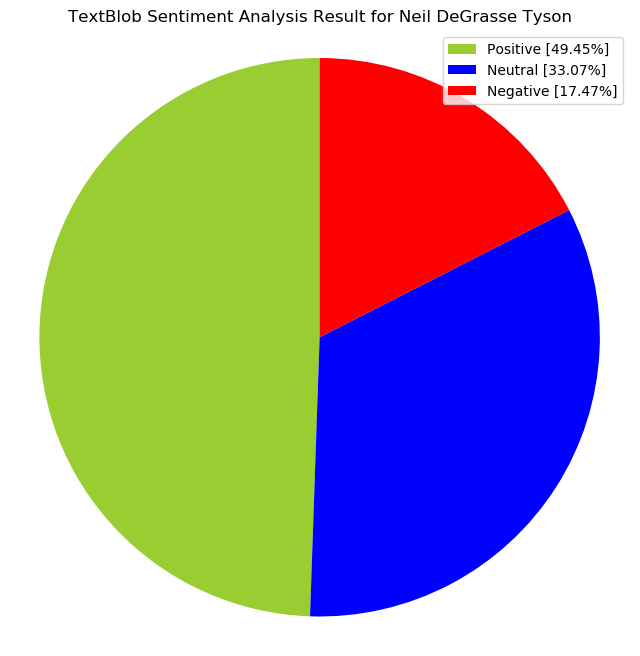

In [1275]:
plt.figure(figsize=(8,8))
labels = ['Positive ['+str(pos2_percent_blobtext)+'%]' , 'Neutral ['+str(neu2_percent_blobtext)+'%]','Negative ['+str(neg2_percent_blobtext)+'%]']
sizes = [positive_2_textblob, neutral_2_textblob, negative_2_textblob]
colors = ['yellowgreen','blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("TextBlob Sentiment Analysis Result for Neil DeGrasse Tyson" )
plt.axis('equal')
plt.show()

### Model 3: Sentiment Analysis using Logistic Regression

In [1276]:
neil_log_senti = neil_senti.copy()

In [1277]:
neil_log_senti

created_at    likes  retweets                source  \
0    2021-07-15 20:40:34  14849.0    2583.0             TweetDeck   
1    2021-07-13 18:57:33    107.0       3.0    Twitter for iPhone   
2    2021-07-13 15:48:15  28164.0    1173.0             TweetDeck   
3    2021-07-13 12:29:44  10616.0    1299.0  Twitter Media Studio   
4    2021-07-08 03:42:24  10385.0     705.0             TweetDeck   
...                  ...      ...       ...                   ...   
3200 2015-04-21 01:06:20   3672.0     885.0             TweetDeck   
3201 2015-04-21 00:55:09   2081.0     603.0             TweetDeck   
3202 2015-04-21 00:49:07   3395.0     908.0             TweetDeck   
3203 2015-04-21 00:44:04   2489.0     633.0             TweetDeck   
3204 2015-04-21 00:37:40   1476.0     391.0             TweetDeck   

                                                   text  sentiment score  \
0     Relative to a Schoolroom Globe…\n\nPlanet Mars...           0.0000   
1     @PabloDurissimo Thank you, but my English keyb...          -0.3291   
2     13 July 2021\nHappy 77th Birthday, Ernö Rubik\...           0.8402   
3     A message that occasionally bears repeating. D...           0.9360   
4     Hmm.  Makes you wonder which came first, the #...           0.0000   
...                                                 ...              ...   
3200  Hey @GeorgeTakei, you turn 79 today but you lo...           0.0000   
3201  Hey @GeorgeTakei, FYI: Your 79 orbits around t...           0.3680   
3202  Hey @GeorgeTakei, you were born 119.5 billion ...           0.0000   
3203  Hey @GeorgeTakei, I hear today is your birthda...           0.6360   
3204  Hey @GeorgeTakei - Honored to have you as my i...           0.5859   

      textblob score  
0           0.000000  
1           0.000000  
2           0.290000  
3           0.575000  
4           0.250000  
...              ...  
3200       -0.400000  
3201        0.000000  
3202        0.166667  
3203        0.000000  
3204        0.000000  

[3205 rows x 7 columns]

In [1278]:
sentiment_dg = []
for score in neil_log_senti['sentiment score']:
    if score > 0:
        sentiment_dg.append('Positive')
    elif score < 0:
        sentiment_dg.append('Negative')
    else:
        sentiment_dg.append('Neutral')

In [1279]:
neil_log_senti['sentiment'] = sentiment_dg

In [1280]:
neil_log_senti

created_at    likes  retweets                source  \
0    2021-07-15 20:40:34  14849.0    2583.0             TweetDeck   
1    2021-07-13 18:57:33    107.0       3.0    Twitter for iPhone   
2    2021-07-13 15:48:15  28164.0    1173.0             TweetDeck   
3    2021-07-13 12:29:44  10616.0    1299.0  Twitter Media Studio   
4    2021-07-08 03:42:24  10385.0     705.0             TweetDeck   
...                  ...      ...       ...                   ...   
3200 2015-04-21 01:06:20   3672.0     885.0             TweetDeck   
3201 2015-04-21 00:55:09   2081.0     603.0             TweetDeck   
3202 2015-04-21 00:49:07   3395.0     908.0             TweetDeck   
3203 2015-04-21 00:44:04   2489.0     633.0             TweetDeck   
3204 2015-04-21 00:37:40   1476.0     391.0             TweetDeck   

                                                   text  sentiment score  \
0     Relative to a Schoolroom Globe…\n\nPlanet Mars...           0.0000   
1     @PabloDurissimo Thank you, but my English keyb...          -0.3291   
2     13 July 2021\nHappy 77th Birthday, Ernö Rubik\...           0.8402   
3     A message that occasionally bears repeating. D...           0.9360   
4     Hmm.  Makes you wonder which came first, the #...           0.0000   
...                                                 ...              ...   
3200  Hey @GeorgeTakei, you turn 79 today but you lo...           0.0000   
3201  Hey @GeorgeTakei, FYI: Your 79 orbits around t...           0.3680   
3202  Hey @GeorgeTakei, you were born 119.5 billion ...           0.0000   
3203  Hey @GeorgeTakei, I hear today is your birthda...           0.6360   
3204  Hey @GeorgeTakei - Honored to have you as my i...           0.5859   

      textblob score sentiment  
0           0.000000   Neutral  
1           0.000000  Negative  
2           0.290000  Positive  
3           0.575000  Positive  
4           0.250000   Neutral  
...              ...       ...  
3200       -0.400000   Neutral  
3201        0.000000  Positive  
3202        0.166667   Neutral  
3203        0.000000  Positive  
3204        0.000000  Positive  

[3205 rows x 8 columns]

In [1281]:
neil_log_df_final = neil_log_senti[['text','sentiment']]

In [1282]:
neil_log_df_final

text sentiment
0     Relative to a Schoolroom Globe…\n\nPlanet Mars...   Neutral
1     @PabloDurissimo Thank you, but my English keyb...  Negative
2     13 July 2021\nHappy 77th Birthday, Ernö Rubik\...  Positive
3     A message that occasionally bears repeating. D...  Positive
4     Hmm.  Makes you wonder which came first, the #...   Neutral
...                                                 ...       ...
3200  Hey @GeorgeTakei, you turn 79 today but you lo...   Neutral
3201  Hey @GeorgeTakei, FYI: Your 79 orbits around t...  Positive
3202  Hey @GeorgeTakei, you were born 119.5 billion ...   Neutral
3203  Hey @GeorgeTakei, I hear today is your birthda...  Positive
3204  Hey @GeorgeTakei - Honored to have you as my i...  Positive

[3205 rows x 2 columns]

In [1283]:
docs_log_neil = neil_log_df_final['text'].str.lower().str.replace('[^a-z\s]', '')
docs_log_neil = docs_log_neil.apply(remove_stopwords)
stemmer = PorterStemmer()
docs_log_neil = stemmer.stem_documents(docs_log_neil)

In [1284]:
train_docs_log_neil, test_docs_log_neil = train_test_split(pd.Series(docs_log_neil), test_size=0.2, random_state=1)


vectorizer_log_neil = CountVectorizer().fit(train_docs_log_neil)
vocab_log_neil = vectorizer_log_neil.get_feature_names()

train_dtm_log_neil = vectorizer_log_neil.transform(train_docs_log_neil)
test_dtm_log_neil= vectorizer_log_neil.transform(test_docs_log_neil)

train_y_log_neil = neil_log_df_final.loc[train_docs_log_neil.index, 'sentiment']
test_y_log_neil = neil_log_df_final.loc[test_docs_log_neil.index, 'sentiment']
print(train_y_log_neil.shape)
print(test_y_log_neil.shape)

(2564,)
(641,)


In [1285]:
train_dtm_log_neil

<2564x7747 sparse matrix of type '<class 'numpy.int64'>'
	with 26669 stored elements in Compressed Sparse Row format>

In [1286]:
test_dtm_log_neil

<641x7747 sparse matrix of type '<class 'numpy.int64'>'
	with 5872 stored elements in Compressed Sparse Row format>

In [1287]:
logistic_model_neil = LogisticRegression().fit(train_dtm_log_neil, train_y_log_neil)
test_y_log_pred_neil = logistic_model_neil.predict(test_dtm_log_neil)

In [1288]:
print('Accuracy score: ', accuracy_score(test_y_log_neil, test_y_log_pred_neil))
print('F1 score: ', f1_score(test_y_log_neil, test_y_log_pred_neil,average='weighted'))

Accuracy score:  0.734789391575663
F1 score:  0.7235517232042705


In [1289]:
print(confusion_matrix(test_y_log_neil, test_y_log_pred_neil))

[[ 48  35  41]
 [  4 171  28]
 [ 15  47 252]]


In [1291]:
print(classification_report(test_y_log_neil, test_y_log_pred_neil))

              precision    recall  f1-score   support

    Negative       0.72      0.39      0.50       124
     Neutral       0.68      0.84      0.75       203
    Positive       0.79      0.80      0.79       314

    accuracy                           0.73       641
   macro avg       0.73      0.68      0.68       641
weighted avg       0.74      0.73      0.72       641



### Model 4: Sentiment Analysis using NaiveBayes Algorithm

In [1292]:
docs_mnb_neil = neil_log_df_final['text'].str.lower().str.replace('[^a-z\s]', '')
docs_mnb_neil = docs_mnb_neil.apply(remove_stopwords)
stemmer = PorterStemmer()
docs_mnb_neil = stemmer.stem_documents(docs_mnb_neil)

train_docs_mnb_neil, test_docs_mnb_neil = train_test_split(pd.Series(docs_mnb_neil), test_size=0.2, random_state=1)


vectorizer_mnb_neil = CountVectorizer().fit(train_docs_mnb_neil)
vocab_mnb_neil = vectorizer_mnb_neil.get_feature_names()

train_dtm_mnb_neil = vectorizer_mnb_neil.transform(train_docs_mnb_neil)
test_dtm_mnb_neil= vectorizer_mnb_neil.transform(test_docs_mnb_neil)

train_y_mnb_neil = neil_log_df_final.loc[train_docs_mnb_neil.index, 'sentiment']
test_y_mnb_neil = neil_log_df_final.loc[test_docs_mnb_neil.index, 'sentiment']

In [1293]:
train_dtm_mnb_neil

<2564x7747 sparse matrix of type '<class 'numpy.int64'>'
	with 26669 stored elements in Compressed Sparse Row format>

In [1294]:
test_dtm_mnb_neil

<641x7747 sparse matrix of type '<class 'numpy.int64'>'
	with 5872 stored elements in Compressed Sparse Row format>

In [1295]:
mnb_model_neil = MultinomialNB().fit(train_dtm_mnb_neil, train_y_mnb_neil)
test_y_mnb_pred_neil = mnb_model_neil.predict(test_dtm_mnb_neil)

In [1296]:
print('Accuracy score: ', accuracy_score(test_y_mnb_neil, test_y_mnb_pred_neil))
print('F1 score: ', f1_score(test_y_mnb_neil, test_y_mnb_pred_neil,average='weighted'))

Accuracy score:  0.6209048361934477
F1 score:  0.5912704569344853


In [1357]:
print(confusion_matrix(test_y_mnb_neil, test_y_mnb_pred_neil))

[[ 38  15  71]
 [ 11  81 111]
 [  7  28 279]]


In [1299]:
print(classification_report(test_y_mnb_neil, test_y_mnb_pred_neil))

              precision    recall  f1-score   support

    Negative       0.68      0.31      0.42       124
     Neutral       0.65      0.40      0.50       203
    Positive       0.61      0.89      0.72       314

    accuracy                           0.62       641
   macro avg       0.65      0.53      0.55       641
weighted avg       0.63      0.62      0.59       641



##### Polarity Analysis

In [1646]:
neil_senti[['sentiment score','textblob score']].describe()

sentiment score  textblob score
count      3205.000000     3205.000000
mean          0.145191        0.107631
std           0.380897        0.248643
min          -0.961200       -0.800000
25%           0.000000        0.000000
50%           0.000000        0.000000
75%           0.440400        0.250000
max           0.965100        1.000000

Conclusion: The polarity of the profile for Neil DeGrasse Tyson is positive

# Donald Trump

In [1300]:
potus_final.shape

(1140, 5)

In [1302]:
docs_3 = potus_final['text'].str.lower()
docs_3.head()

0    rt @whitehouse: president @realdonaldtrump and...
1    rt @whitehouse: every waking moment is about o...
2    rt @whitehouse: we've created the largest, mos...
3    rt @whitehouse: president @realdonaldtrump jus...
4    rt @whitehouse: we have finalized a partnershi...
Name: text, dtype: object

In [1303]:
processed_doc_3 = []
for text in docs_3:
    processed_text = re.sub(r"(?:\@|http?\://https?\://|www)\S+", "", text)
    processed_text = "".join(processed_text).strip()
    processed_doc_3.append(processed_text)
    
final_doc_3 =  pd.Series(processed_doc_3)

docs_tokens_3 = final_doc_3.str.replace('[^a-z\s#@]', '').str.split(' ')

tokens_3 = []
for tokens in docs_tokens_3:
    tokens_3.extend(tokens)
print('No. of tokens in entire corpus:', len(tokens_3))

No. of tokens in entire corpus: 21584


In [1304]:
tokens_freq_3 = pd.Series(tokens_3).value_counts().drop([''])
tokens_freq_3[:5]

rt     1140
the    1071
to      633
and     522
of      512
dtype: int64

In [1328]:
common_stopwords = nltk.corpus.stopwords.words('english')
custom_stopwords_3 = ['rt',"it's",'amp','yes','like','also','would','us','im','http','https']
all_stopwords_3 = np.hstack([common_stopwords, custom_stopwords_3])
len(all_stopwords_3)

190

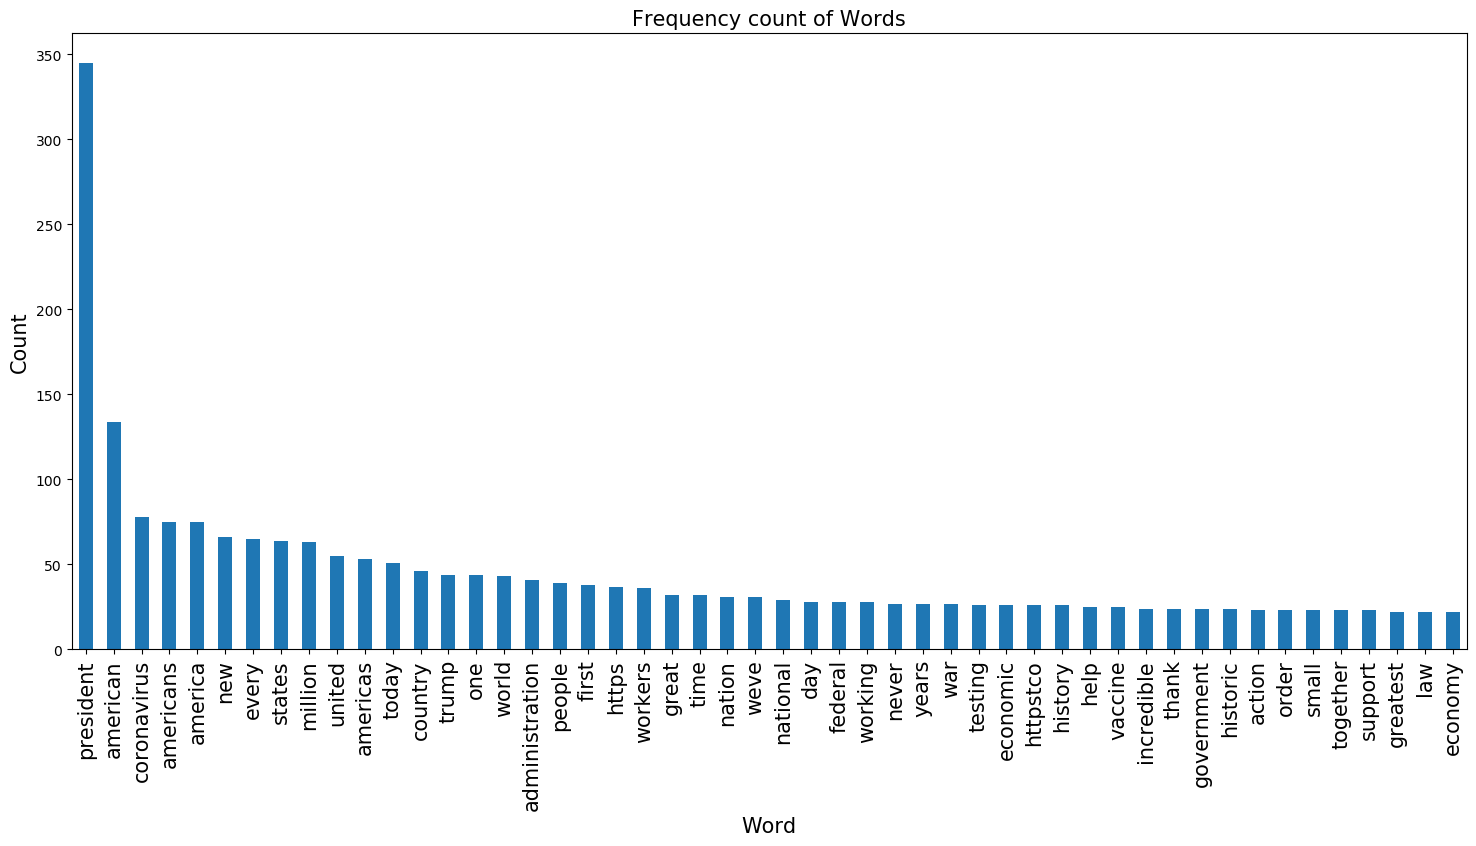

In [1306]:
df_tokens_3 = pd.DataFrame(tokens_freq_3).reset_index().rename(columns={'index': 'token', 0: 'frequency'})
df_tokens_3 = df_tokens_3[~df_tokens_3['token'].isin(all_stopwords_3)]
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
df_tokens_3.set_index('token')['frequency'].head(50).plot.bar()
plt.title('Frequency count of Words',fontsize=15)
plt.xlabel('Word',fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

##### Wordcloud of tweets

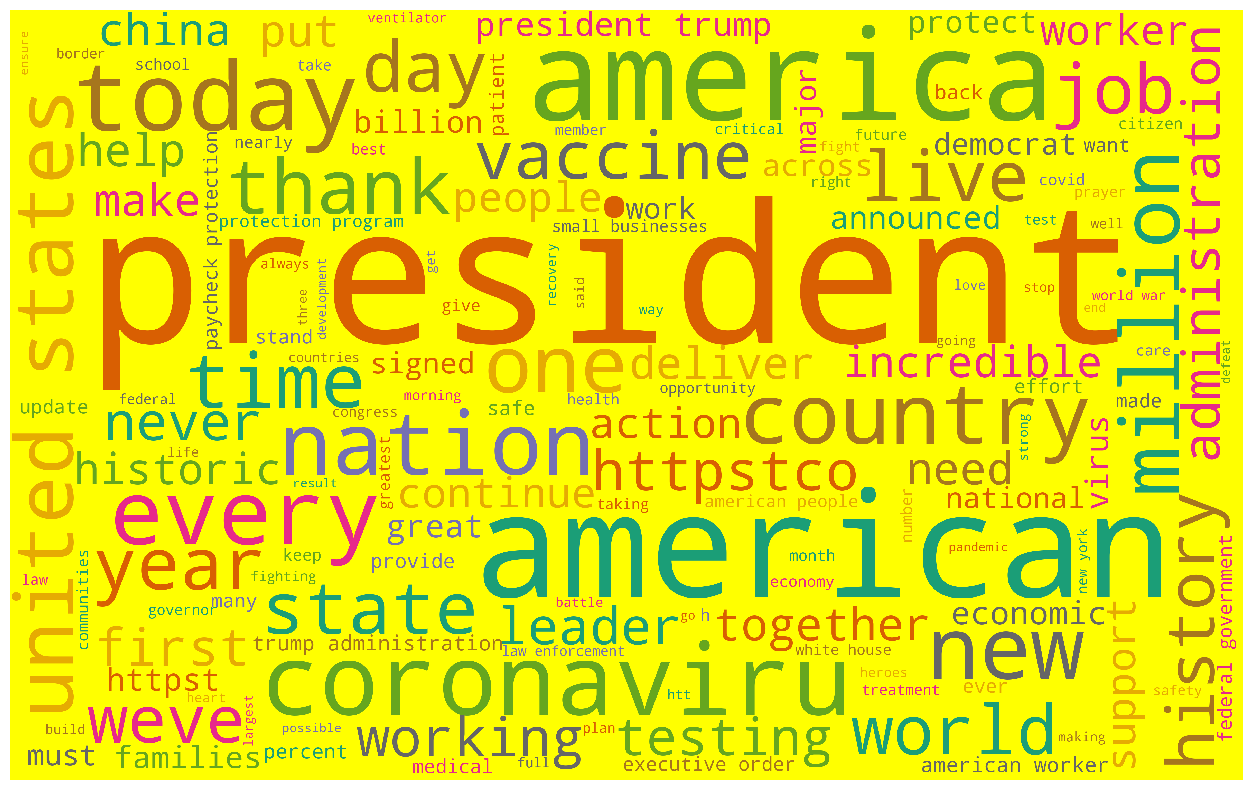

In [1330]:
docs_strings_3 = ' '.join(tokens_3)
wc_3 = WordCloud(background_color='yellow', stopwords=all_stopwords_3,width=1600,height=1000,
               scale=3,max_words=150,random_state=612,font_step=1,mode='RGB',colormap='Dark2_r').generate(docs_strings_3)
plt.figure(figsize=(40,10))
plt.imshow(wc_3)
plt.axis('off');

### Model 1:  Sentiment Analysis using SentimentIntensityAnalyzer

In [1308]:
dt_senti = potus_final.copy()

In [1309]:
dt_senti.head()

created_at  likes  retweets              source  \
0 2020-12-24 20:45:12    0.0   14832.0  Twitter for iPhone   
1 2020-12-08 22:44:21    0.0    5684.0  Twitter for iPhone   
2 2020-12-08 20:14:32    0.0    2527.0  Twitter for iPhone   
3 2020-12-08 20:14:28    0.0    2495.0  Twitter for iPhone   
4 2020-12-08 20:14:25    0.0    1551.0  Twitter for iPhone   

                                                text  
0  RT @WhiteHouse: President @realDonaldTrump and...  
1  RT @WhiteHouse: Every waking moment is about o...  
2  RT @WhiteHouse: We've created the largest, mos...  
3  RT @WhiteHouse: President @realDonaldTrump jus...  
4  RT @WhiteHouse: We have finalized a partnershi...

In [1310]:
analyzer = SentimentIntensityAnalyzer()
dt_senti['sentiment score'] = dt_senti['text'].apply(lambda v: analyzer.polarity_scores(v)['compound'])
print(dt_senti['sentiment score'].max())
print(dt_senti['sentiment score'].min())

0.9413
-0.9274


In [1311]:
dt_senti[dt_senti['sentiment score'] == 0.9413]

created_at  likes  retweets           source  \
110 2020-09-14 21:41:15    0.0     613.0  The White House   

                                                  text  sentiment score  
110  RT @WhiteHouse: "Our Nation is strong because ...           0.9413

In [1312]:
dt_senti[dt_senti['sentiment score'] == -0.9274]

created_at  likes  retweets           source  \
989 2020-02-16 14:00:04    0.0    3958.0  The White House   

                                                  text  sentiment score  
989  RT @WhiteHouse: Daria Ortiz is the granddaught...          -0.9274

In [1313]:
positive_3 = 0
negative_3 = 0
neutral_3 = 0
for score in dt_senti['sentiment score']:
    if score > 0:
        positive_3+=1
    elif score < 0:
        negative_3+=1
    else:
        neutral_3+=1

In [1314]:
print(positive_3)
print(negative_3)
print(neutral_3)

601
210
329


In [1315]:
pos3_percent = round((positive_3/(positive_3 + negative_3 + neutral_3))*100,2)
neg3_percent = round((negative_3/(positive_3 + negative_3 + neutral_3))*100,2)
neu3_percent = round((neutral_3/(positive_3 + negative_3 + neutral_3))*100,2)

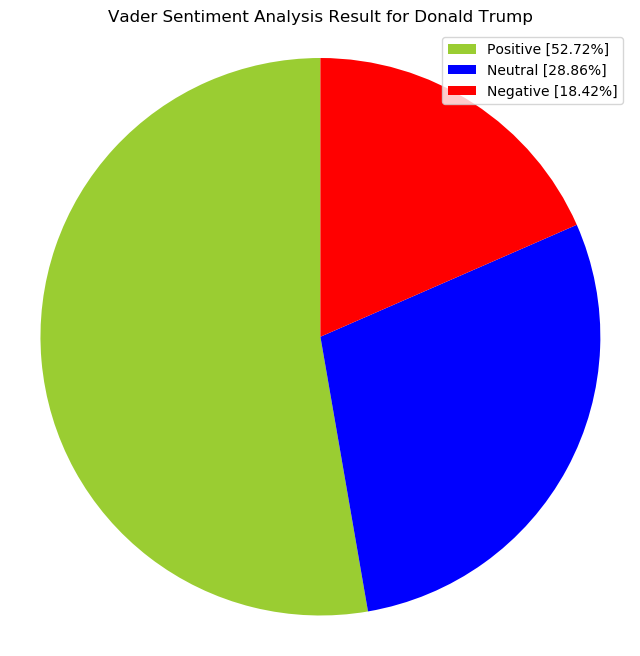

In [1316]:
plt.figure(figsize=(8,8))
labels = ['Positive ['+str(pos3_percent)+'%]' , 'Neutral ['+str(neu3_percent)+'%]','Negative ['+str(neg3_percent)+'%]']
sizes = [positive_3, neutral_3, negative_3]
colors = ['yellowgreen','blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Vader Sentiment Analysis Result for Donald Trump" )
plt.axis('equal')
plt.show()

In [1317]:
df_dt_positive = dt_senti[dt_senti['sentiment score'] > 0]
df_dt_negative = dt_senti[dt_senti['sentiment score'] < 0]
df_dt_neutral = dt_senti[dt_senti['sentiment score'] == 0]

In [1318]:
print(len(df_dt_positive))
print(len(df_dt_negative))
print(len(df_dt_neutral))

601
210
329


##### Wordcloud of positive tweets

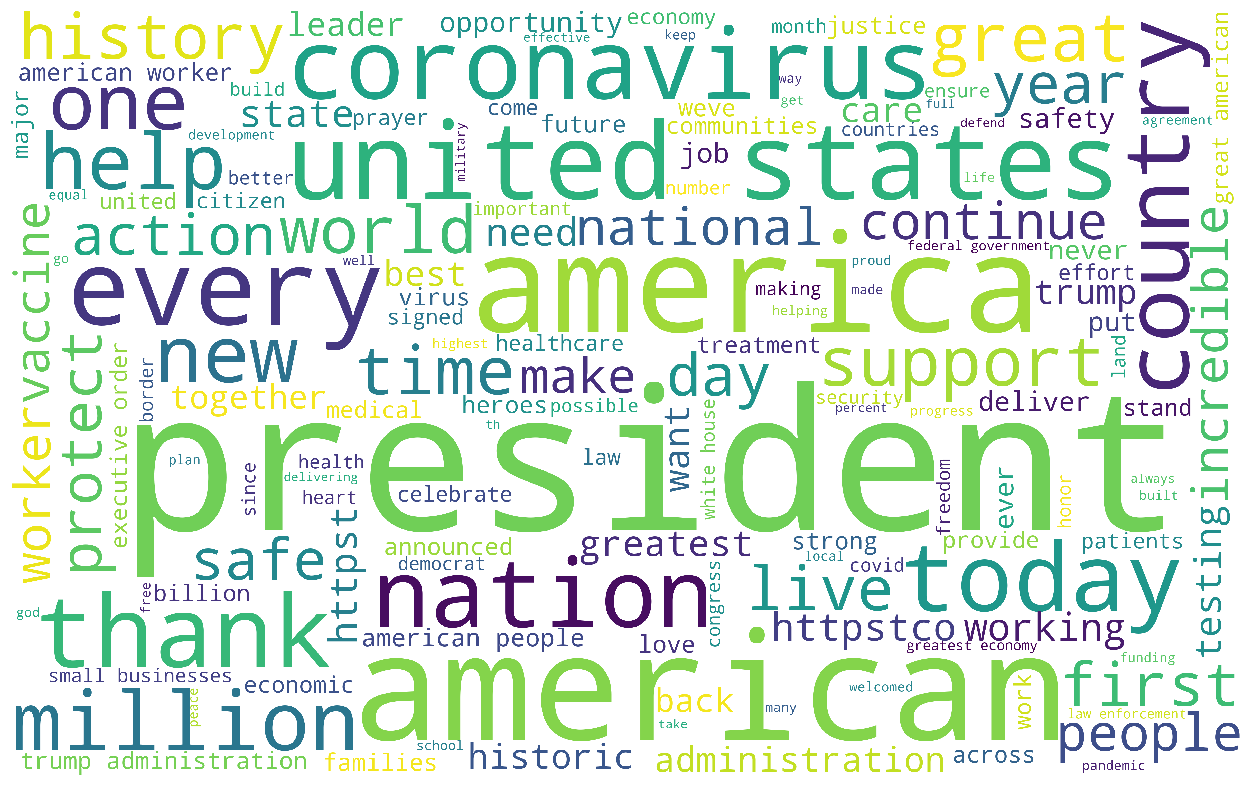

In [1329]:
pos_processed_doc_3 = []
for text in df_dt_positive['text'].str.lower():
    processed_text = re.sub(r"(?:\@|http?\://https?\://|www)\S+", "", text)
    processed_text = "".join(processed_text).strip()
    pos_processed_doc_3.append(processed_text)
    
pos_final_doc_3 =  pd.Series(pos_processed_doc_3)

pos_docs_tokens_3 = pos_final_doc_3.str.replace('[^a-z\s#@]', '').str.split(' ')

pos_tokens_3 = []
for tokens in pos_docs_tokens_3:
    pos_tokens_3.extend(tokens)

pos_strings_3 = ' '.join(pos_tokens_3)
pos_wc_3 = WordCloud(background_color='White', stopwords=all_stopwords_3,width=1600,height=1000,
               scale=3,max_words=150,random_state=837,font_step=1,mode='RGB',colormap='viridis').generate(pos_strings_3)
plt.figure(figsize=(40,10))
plt.imshow(pos_wc_3)
plt.axis('off');

##### Wordcloud of negative tweets

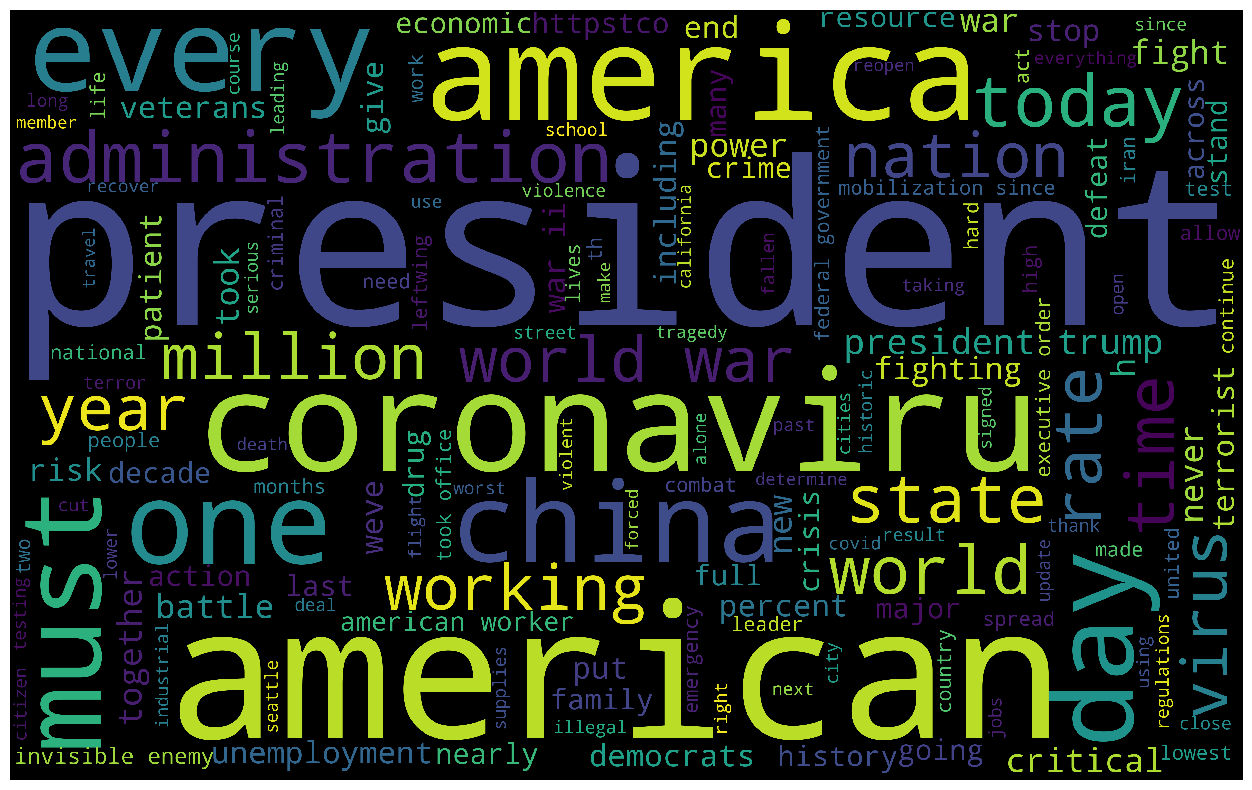

In [1331]:
neg_processed_doc_3 = []
for text in df_dt_negative['text'].str.lower():
    processed_text = re.sub(r"(?:\@|http?\://https?\://|www)\S+", "", text)
    processed_text = "".join(processed_text).strip()
    neg_processed_doc_3.append(processed_text)
    
neg_final_doc_3 =  pd.Series(neg_processed_doc_3)

neg_docs_tokens_3 = neg_final_doc_3.str.replace('[^a-z\s#@]', '').str.split(' ')

neg_tokens_3 = []
for tokens in neg_docs_tokens_3:
    neg_tokens_3.extend(tokens)

neg_strings_3 = ' '.join(neg_tokens_3)
neg_wc_3 = WordCloud(background_color='black', stopwords=all_stopwords_3,width=1600,height=1000,
               scale=3,max_words=150,random_state=612,font_step=1,mode='RGB',colormap='viridis',
                   min_font_size=20,max_font_size=450,prefer_horizontal=0.5).generate(neg_strings_3)
plt.figure(figsize=(40,10))
plt.imshow(neg_wc_3)
plt.axis('off');

##### Wordcloud of neutral tweets

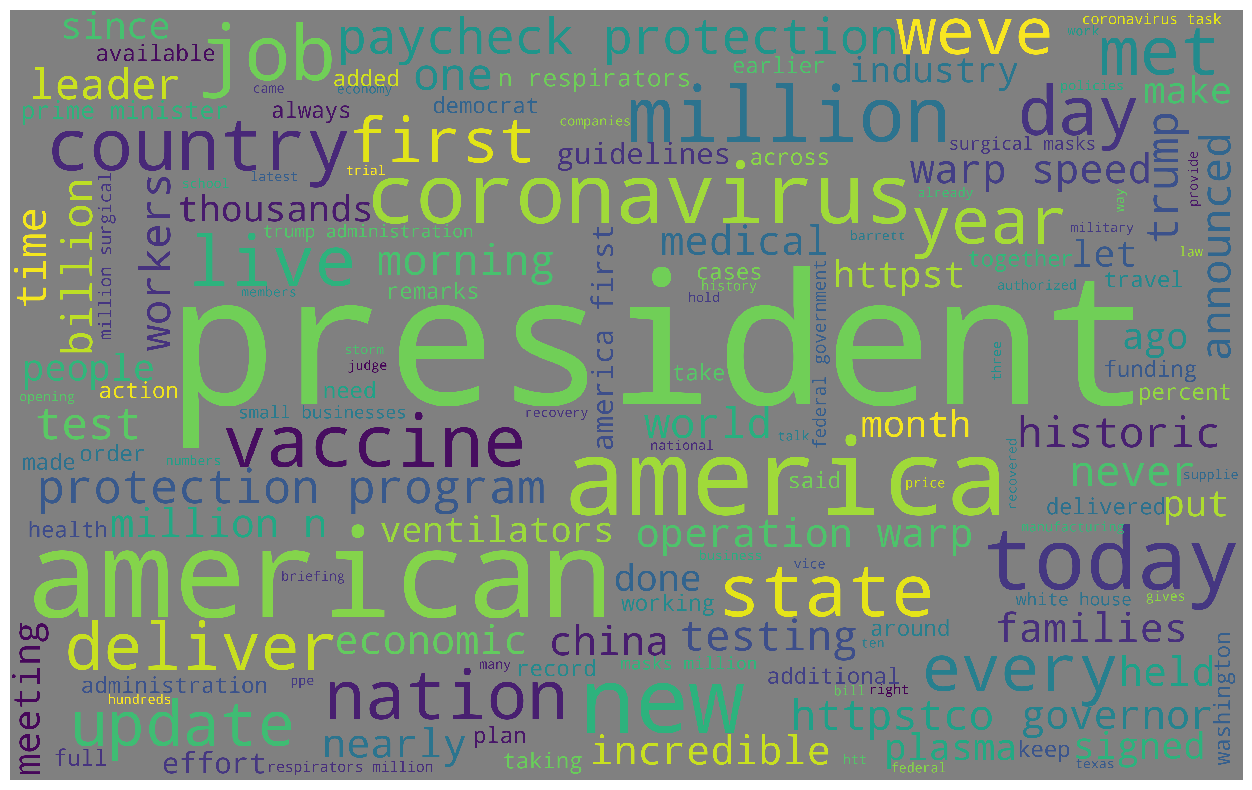

In [1332]:
neu_processed_doc_3 = []
for text in df_dt_neutral['text'].str.lower():
    processed_text = re.sub(r"(?:\@|http?\://https?\://|www)\S+", "", text)
    processed_text = "".join(processed_text).strip()
    neu_processed_doc_3.append(processed_text)
    
neu_final_doc_3 =  pd.Series(neu_processed_doc_3)

neu_docs_tokens_3 = neu_final_doc_3.str.replace('[^a-z\s#@]', '').str.split(' ')

neu_tokens_3 = []
for tokens in neu_docs_tokens_3:
    neu_tokens_3.extend(tokens)

neu_strings_3 = ' '.join(neu_tokens_3)
neu_wc_3 = WordCloud(background_color='gray', stopwords=all_stopwords_3,width=1600,height=1000,
               scale=3,max_words=150,random_state=837,font_step=1,mode='RGB',colormap='viridis').generate(neu_strings_3)
plt.figure(figsize=(40,10))
plt.imshow(neu_wc_3)
plt.axis('off');

### Model 2: Sentiment Analysis using Logistic Regression

In [1335]:
dt_log_senti = dt_senti.copy()

In [1336]:
dt_log_senti

created_at  likes  retweets              source  \
0    2020-12-24 20:45:12    0.0   14832.0  Twitter for iPhone   
1    2020-12-08 22:44:21    0.0    5684.0  Twitter for iPhone   
2    2020-12-08 20:14:32    0.0    2527.0  Twitter for iPhone   
3    2020-12-08 20:14:28    0.0    2495.0  Twitter for iPhone   
4    2020-12-08 20:14:25    0.0    1551.0  Twitter for iPhone   
...                  ...    ...       ...                 ...   
1135 2019-11-20 15:31:41    0.0    4761.0     The White House   
1136 2019-11-19 19:28:44    0.0    2822.0     The White House   
1137 2019-11-19 19:14:37    0.0    7364.0     The White House   
1138 2019-11-19 19:14:37    0.0    1790.0     The White House   
1139 2019-11-19 16:48:53    0.0    1715.0     The White House   

                                                   text  sentiment score  
0     RT @WhiteHouse: President @realDonaldTrump and...           0.0000  
1     RT @WhiteHouse: Every waking moment is about o...           0.7184  
2     RT @WhiteHouse: We've created the largest, mos...           0.7569  
3     RT @WhiteHouse: President @realDonaldTrump jus...           0.3818  
4     RT @WhiteHouse: We have finalized a partnershi...           0.0000  
...                                                 ...              ...  
1135  RT @WhiteHouse: Shifty Schiff corrects the rec...           0.0000  
1136  RT @WhiteHouse: Shifty Schiff is inventing fak...          -0.4767  
1137  RT @WhiteHouse: Since the day President @realD...          -0.3182  
1138  RT @WhiteHouse: "They're using this impeachmen...          -0.2732  
1139  RT @WhiteHouse: "I've never had any contact wi...           0.4215  

[1140 rows x 6 columns]

In [1337]:
sentiment_dt = []
for score in dt_log_senti['sentiment score']:
    if score > 0:
        sentiment_dt.append('Positive')
    elif score < 0:
        sentiment_dt.append('Negative')
    else:
        sentiment_dt.append('Neutral')

In [1338]:
dt_log_senti['sentiment'] = sentiment_dt

In [1339]:
dt_log_senti

created_at  likes  retweets              source  \
0    2020-12-24 20:45:12    0.0   14832.0  Twitter for iPhone   
1    2020-12-08 22:44:21    0.0    5684.0  Twitter for iPhone   
2    2020-12-08 20:14:32    0.0    2527.0  Twitter for iPhone   
3    2020-12-08 20:14:28    0.0    2495.0  Twitter for iPhone   
4    2020-12-08 20:14:25    0.0    1551.0  Twitter for iPhone   
...                  ...    ...       ...                 ...   
1135 2019-11-20 15:31:41    0.0    4761.0     The White House   
1136 2019-11-19 19:28:44    0.0    2822.0     The White House   
1137 2019-11-19 19:14:37    0.0    7364.0     The White House   
1138 2019-11-19 19:14:37    0.0    1790.0     The White House   
1139 2019-11-19 16:48:53    0.0    1715.0     The White House   

                                                   text  sentiment score  \
0     RT @WhiteHouse: President @realDonaldTrump and...           0.0000   
1     RT @WhiteHouse: Every waking moment is about o...           0.7184   
2     RT @WhiteHouse: We've created the largest, mos...           0.7569   
3     RT @WhiteHouse: President @realDonaldTrump jus...           0.3818   
4     RT @WhiteHouse: We have finalized a partnershi...           0.0000   
...                                                 ...              ...   
1135  RT @WhiteHouse: Shifty Schiff corrects the rec...           0.0000   
1136  RT @WhiteHouse: Shifty Schiff is inventing fak...          -0.4767   
1137  RT @WhiteHouse: Since the day President @realD...          -0.3182   
1138  RT @WhiteHouse: "They're using this impeachmen...          -0.2732   
1139  RT @WhiteHouse: "I've never had any contact wi...           0.4215   

     sentiment  
0      Neutral  
1     Positive  
2     Positive  
3     Positive  
4      Neutral  
...        ...  
1135   Neutral  
1136  Negative  
1137  Negative  
1138  Negative  
1139  Positive  

[1140 rows x 7 columns]

In [1340]:
dt_log_df_final = dt_log_senti[['text','sentiment']]

In [1341]:
dt_log_df_final

text sentiment
0     RT @WhiteHouse: President @realDonaldTrump and...   Neutral
1     RT @WhiteHouse: Every waking moment is about o...  Positive
2     RT @WhiteHouse: We've created the largest, mos...  Positive
3     RT @WhiteHouse: President @realDonaldTrump jus...  Positive
4     RT @WhiteHouse: We have finalized a partnershi...   Neutral
...                                                 ...       ...
1135  RT @WhiteHouse: Shifty Schiff corrects the rec...   Neutral
1136  RT @WhiteHouse: Shifty Schiff is inventing fak...  Negative
1137  RT @WhiteHouse: Since the day President @realD...  Negative
1138  RT @WhiteHouse: "They're using this impeachmen...  Negative
1139  RT @WhiteHouse: "I've never had any contact wi...  Positive

[1140 rows x 2 columns]

In [1342]:
docs_log_dt = dt_log_df_final['text'].str.lower().str.replace('[^a-z\s]', '')
docs_log_dt = docs_log_dt.apply(remove_stopwords)
stemmer = PorterStemmer()
docs_log_dt = stemmer.stem_documents(docs_log_dt)

In [1343]:
train_docs_log_dt, test_docs_log_dt = train_test_split(pd.Series(docs_log_dt), test_size=0.2, random_state=1)


vectorizer_log_dt = CountVectorizer().fit(train_docs_log_dt)
vocab_log_dt = vectorizer_log_dt.get_feature_names()

train_dtm_log_dt = vectorizer_log_dt.transform(train_docs_log_dt)
test_dtm_log_dt= vectorizer_log_dt.transform(test_docs_log_dt)

train_y_log_dt = dt_log_df_final.loc[train_docs_log_dt.index, 'sentiment']
test_y_log_dt = dt_log_df_final.loc[test_docs_log_dt.index, 'sentiment']
print(train_y_log_dt.shape)
print(test_y_log_dt.shape)

(912,)
(228,)


In [1344]:
train_dtm_log_dt

<912x2701 sparse matrix of type '<class 'numpy.int64'>'
	with 10271 stored elements in Compressed Sparse Row format>

In [1345]:
test_dtm_log_dt

<228x2701 sparse matrix of type '<class 'numpy.int64'>'
	with 2228 stored elements in Compressed Sparse Row format>

In [1346]:
logistic_model_dt = LogisticRegression().fit(train_dtm_log_dt, train_y_log_dt)
test_y_log_pred_dt = logistic_model_dt.predict(test_dtm_log_dt)

In [1347]:
print('Accuracy score: ', accuracy_score(test_y_log_dt, test_y_log_pred_dt))
print('F1 score: ', f1_score(test_y_log_dt, test_y_log_pred_dt,average='weighted'))

Accuracy score:  0.6491228070175439
F1 score:  0.6263176951978335


In [1348]:
print(confusion_matrix(test_y_log_dt, test_y_log_pred_dt))

[[11 12 24]
 [ 2 42 19]
 [ 7 16 95]]


In [1349]:
print(classification_report(test_y_log_dt, test_y_log_pred_dt))

              precision    recall  f1-score   support

    Negative       0.55      0.23      0.33        47
     Neutral       0.60      0.67      0.63        63
    Positive       0.69      0.81      0.74       118

    accuracy                           0.65       228
   macro avg       0.61      0.57      0.57       228
weighted avg       0.64      0.65      0.63       228



### Model 3: Sentiment Analysis using NaiveBayes Algorithm

In [1351]:
docs_mnb_dt = dt_log_df_final['text'].str.lower().str.replace('[^a-z\s]', '')
docs_mnb_dt = docs_mnb_dt.apply(remove_stopwords)
stemmer = PorterStemmer()
docs_mnb_dt = stemmer.stem_documents(docs_mnb_dt)

train_docs_mnb_dt, test_docs_mnb_dt = train_test_split(pd.Series(docs_mnb_dt), test_size=0.2, random_state=1)


vectorizer_mnb_dt = CountVectorizer().fit(train_docs_mnb_dt)
vocab_mnb_dt = vectorizer_mnb_dt.get_feature_names()

train_dtm_mnb_dt = vectorizer_mnb_dt.transform(train_docs_mnb_dt)
test_dtm_mnb_dt= vectorizer_mnb_dt.transform(test_docs_mnb_dt)

train_y_mnb_dt = dt_log_df_final.loc[train_docs_mnb_dt.index, 'sentiment']
test_y_mnb_dt = dt_log_df_final.loc[test_docs_mnb_dt.index, 'sentiment']

In [1352]:
train_dtm_mnb_dt

<912x2701 sparse matrix of type '<class 'numpy.int64'>'
	with 10271 stored elements in Compressed Sparse Row format>

In [1353]:
test_dtm_mnb_dt

<228x2701 sparse matrix of type '<class 'numpy.int64'>'
	with 2228 stored elements in Compressed Sparse Row format>

In [1354]:
mnb_model_dt = MultinomialNB().fit(train_dtm_mnb_dt, train_y_mnb_dt)
test_y_mnb_pred_dt = mnb_model_dt.predict(test_dtm_mnb_dt)

In [1355]:
print('Accuracy score: ', accuracy_score(test_y_mnb_dt, test_y_mnb_pred_dt))
print('F1 score: ', f1_score(test_y_mnb_dt, test_y_mnb_pred_dt,average='weighted'))

Accuracy score:  0.6096491228070176
F1 score:  0.5676625748938526


In [1358]:
print(confusion_matrix(test_y_mnb_dt, test_y_mnb_pred_dt))

[[  7   8  32]
 [  2  29  32]
 [  6   9 103]]


In [1356]:
print(classification_report(test_y_mnb_dt, test_y_mnb_pred_dt))

              precision    recall  f1-score   support

    Negative       0.47      0.15      0.23        47
     Neutral       0.63      0.46      0.53        63
    Positive       0.62      0.87      0.72       118

    accuracy                           0.61       228
   macro avg       0.57      0.49      0.49       228
weighted avg       0.59      0.61      0.57       228



##### Polarity Analysis

In [1649]:
dt_senti[['sentiment score']].describe()

sentiment score
count      1140.000000
mean          0.180927
std           0.419539
min          -0.927400
25%           0.000000
50%           0.127000
75%           0.525800
max           0.941300

Conclusion: The polarity score for the profile of Donald Trump is positive

# Hashtag search: #spacetourism

In [1359]:
df_st_tweets.shape

(1987, 7)

In [1360]:
docs_4 = df_st_tweets['text'].str.lower()
docs_4.head()

0    rt @pawlowskimario: this is what #jeffbezos's ...
1    space tourism &amp; travel market opportunity ...
2    rt @touristmtravel: first space tourism travel...
3    rt @pawlowskimario: this is what #jeffbezos's ...
4    rt @pawlowskimario: this is what #jeffbezos's ...
Name: text, dtype: object

In [1361]:
processed_doc_4 = []
for text in docs_4:
    processed_text = re.sub(r"(?:\@|http?\://https?\://|www)\S+", "", text)
    processed_text = "".join(processed_text).strip()
    processed_doc_4.append(processed_text)
    
final_doc_4 =  pd.Series(processed_doc_4)

docs_tokens_4 = final_doc_4.str.replace('[^a-z\s#@]', '').str.split(' ')

tokens_4 = []
for tokens in docs_tokens_4:
    tokens_4.extend(tokens)
print('No. of tokens in entire corpus:', len(tokens_4))

No. of tokens in entire corpus: 42326


In [1362]:
tokens_freq_4 = pd.Series(tokens_4).value_counts().drop([''])
tokens_freq_4[:5]

the              1300
#spacetourism    1233
to               1074
space             994
rt                849
dtype: int64

In [1403]:
common_stopwords = nltk.corpus.stopwords.words('english')
custom_stopwords_4 = ['rt',"it's",'amp','yes','like','also','would','us','im','spacetourism','space tourism','space', 'tourism']
all_stopwords_4 = np.hstack([common_stopwords, custom_stopwords_4])
len(all_stopwords_4)

192

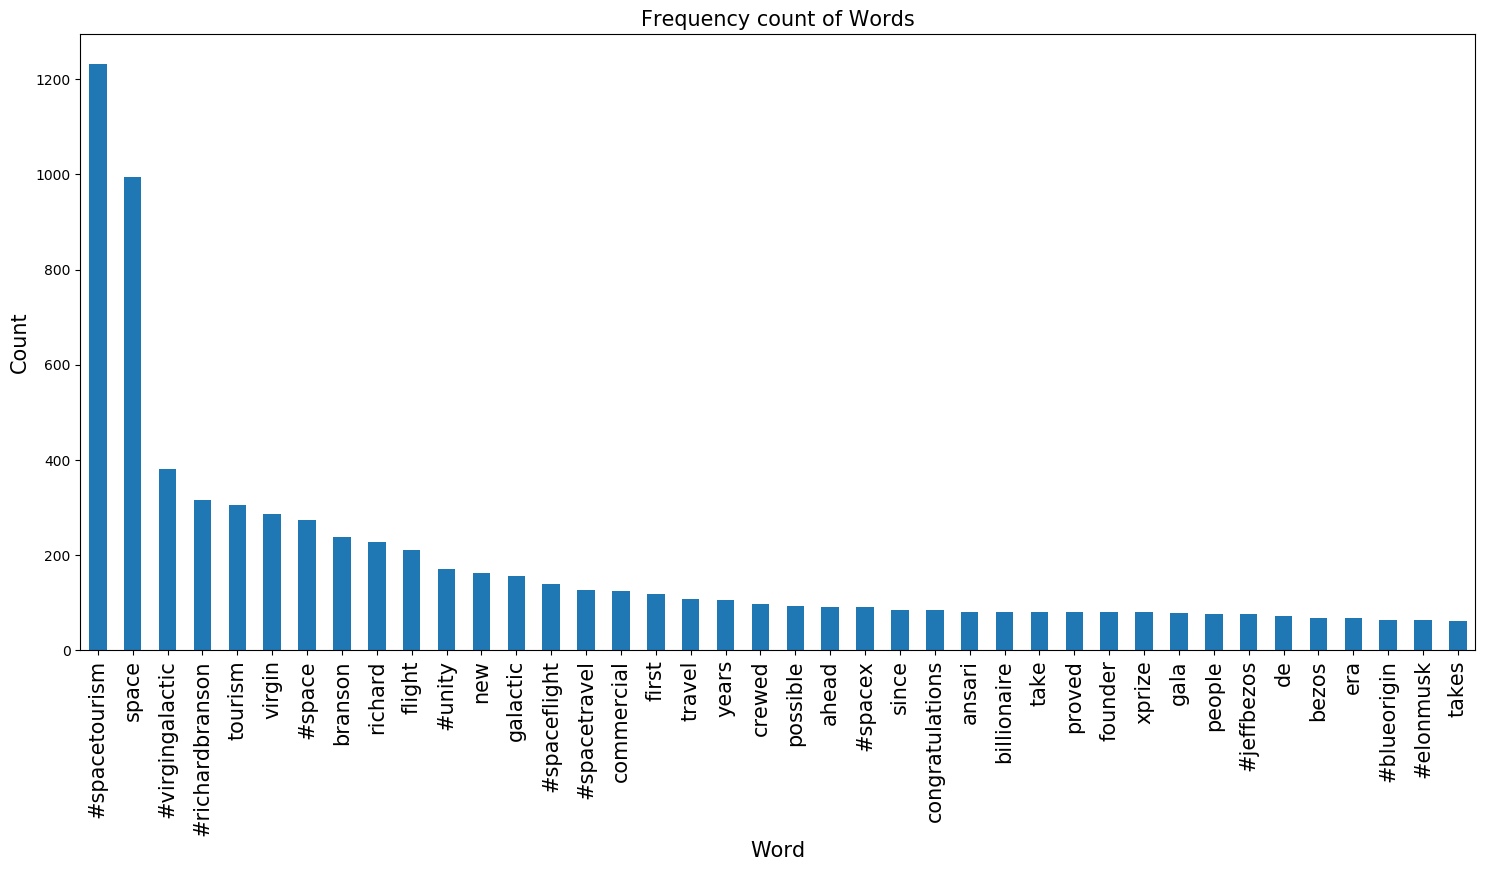

In [1366]:
df_tokens_4 = pd.DataFrame(tokens_freq_4).reset_index().rename(columns={'index': 'token', 0: 'frequency'})
df_tokens_4 = df_tokens_4[~df_tokens_4['token'].isin(all_stopwords_4)]
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
df_tokens_4.set_index('token')['frequency'].head(40).plot.bar()
plt.title('Frequency count of Words',fontsize=15)
plt.xlabel('Word',fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

##### Wordcloud of tweets

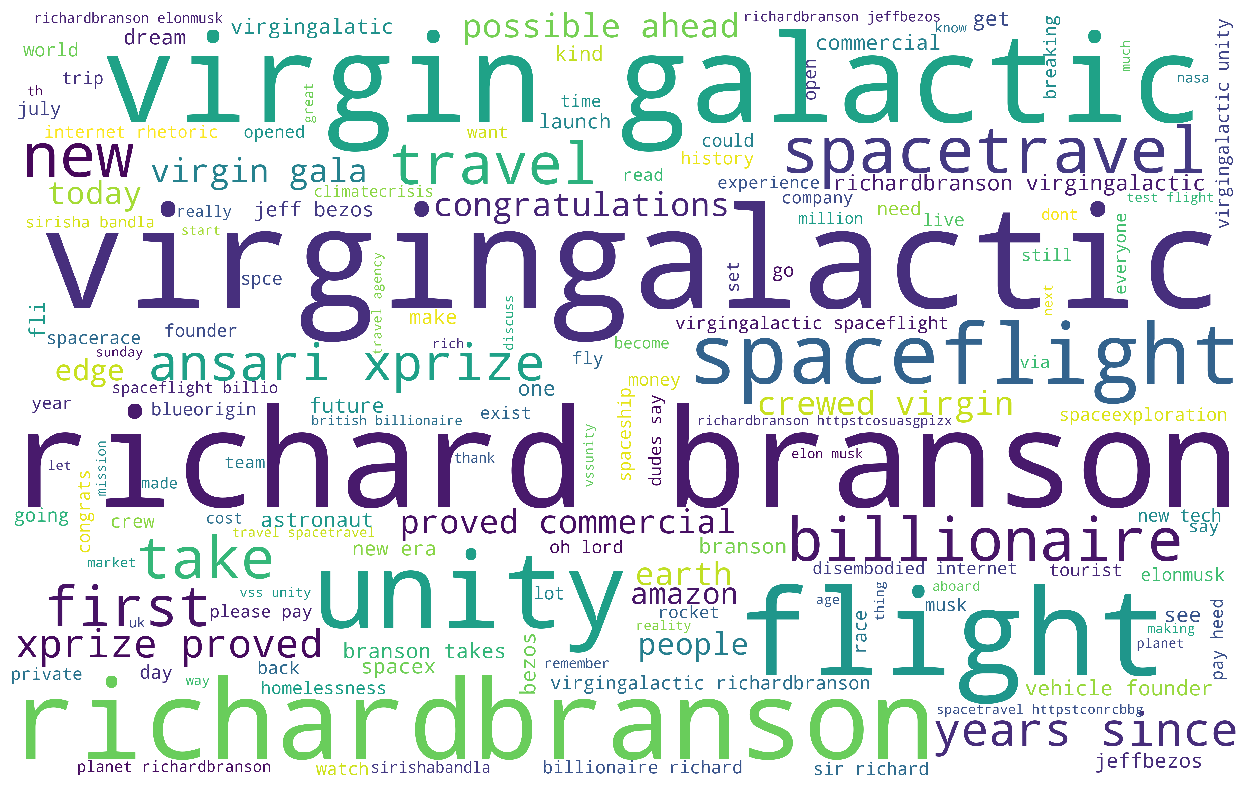

In [1409]:
docs_strings_4 = ' '.join(tokens_4)
wc_4 = WordCloud(background_color='white', stopwords=all_stopwords_4,width=1600,height=1000,
               scale=3,max_words=150,random_state=612,font_step=1,mode='RGB',colormap='viridis_r').generate(docs_strings_4)
plt.figure(figsize=(40,10))
plt.imshow(wc_4)
plt.axis('off');

### Model 1:  Sentiment Analysis using SentimentIntensityAnalyzer

In [1375]:
st_senti = df_st_tweets.copy()

In [1376]:
st_senti.head()

created_at  likes  retweets     screen_name               source  \
0 2021-07-16 20:06:23    0.0       6.0        arukundo  Twitter for Android   
1 2021-07-16 20:05:02    0.0       0.0      NSR_SatCom       Hootsuite Inc.   
2 2021-07-16 19:57:34    0.0      21.0  simplemama2013  Twitter for Android   
3 2021-07-16 19:54:04    0.0       6.0   thegentlejain  Twitter for Android   
4 2021-07-16 19:49:13    0.0       6.0        Shi4Tech      Twitter Web App   

                                                text  \
0  RT @PawlowskiMario: This is what #JeffBezos's ...   
1  Space Tourism &amp; Travel Market opportunity ...   
2  RT @touristmtravel: First Space Tourism Travel...   
3  RT @PawlowskiMario: This is what #JeffBezos's ...   
4  RT @PawlowskiMario: This is what #JeffBezos's ...   

                   user_name  
0               Alex Rukundo  
1                        NSR  
2        Simple Mama At Home  
3               Akshat Jain✨  
4  Shi4Tech 💙 #TechForGood 💙

In [1377]:
analyzer = SentimentIntensityAnalyzer()
st_senti['sentiment score'] = st_senti['text'].apply(lambda v: analyzer.polarity_scores(v)['compound'])
print(st_senti['sentiment score'].max())
print(st_senti['sentiment score'].min())

0.9729
-0.8899


In [1378]:
st_senti[st_senti['sentiment score'] == 0.9729]

created_at  likes  retweets screen_name              source  \
1397 2021-07-11 17:22:54    0.0       0.0  DenisICold  Twitter for iPhone   

                                                   text   user_name  \
1397  Guys, that’s a good chance to help space progr...  Denis Cold   

      sentiment score  
1397           0.9729

In [1379]:
st_senti[st_senti['sentiment score'] == -0.8899]

created_at  likes  retweets screen_name               source  \
1218 2021-07-11 19:45:09    1.0       0.0     MTNsszz  Twitter for Android   

                                                   text user_name  \
1218  @atRachelGilmore And our lame Canadian public ...        RT   

      sentiment score  
1218          -0.8899

In [1380]:
positive_4 = 0
negative_4 = 0
neutral_4 = 0
for score in st_senti['sentiment score']:
    if score > 0:
        positive_4+=1
    elif score < 0:
        negative_4+=1
    else:
        neutral_4+=1

In [1381]:
print(positive_4)
print(negative_4)
print(neutral_4)

782
193
1012


In [1382]:
pos4_percent = round((positive_4/(positive_4 + negative_4 + neutral_4))*100,2)
neg4_percent = round((negative_4/(positive_4 + negative_4 + neutral_4))*100,2)
neu4_percent = round((neutral_4/(positive_4 + negative_4 + neutral_4))*100,2)

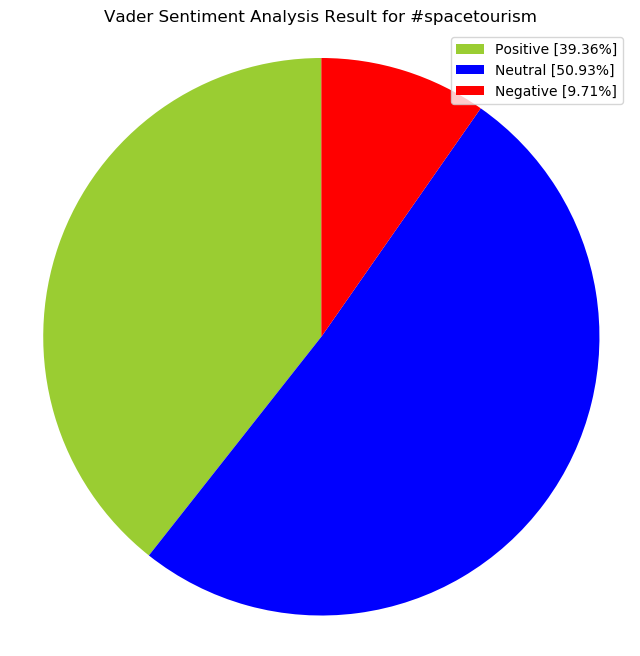

In [1384]:
plt.figure(figsize=(8,8))
labels = ['Positive ['+str(pos4_percent)+'%]' , 'Neutral ['+str(neu4_percent)+'%]','Negative ['+str(neg4_percent)+'%]']
sizes = [positive_4, neutral_4, negative_4]
colors = ['yellowgreen','blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Vader Sentiment Analysis Result for #spacetourism" )
plt.axis('equal')
plt.show()

In [1385]:
df_st_positive = st_senti[st_senti['sentiment score'] > 0]
df_st_negative = st_senti[st_senti['sentiment score'] < 0]
df_st_neutral = st_senti[st_senti['sentiment score'] == 0]

In [1386]:
print(len(df_st_positive))
print(len(df_st_negative))
print(len(df_st_neutral))

782
193
1012


##### Wordcloud of positive tweets

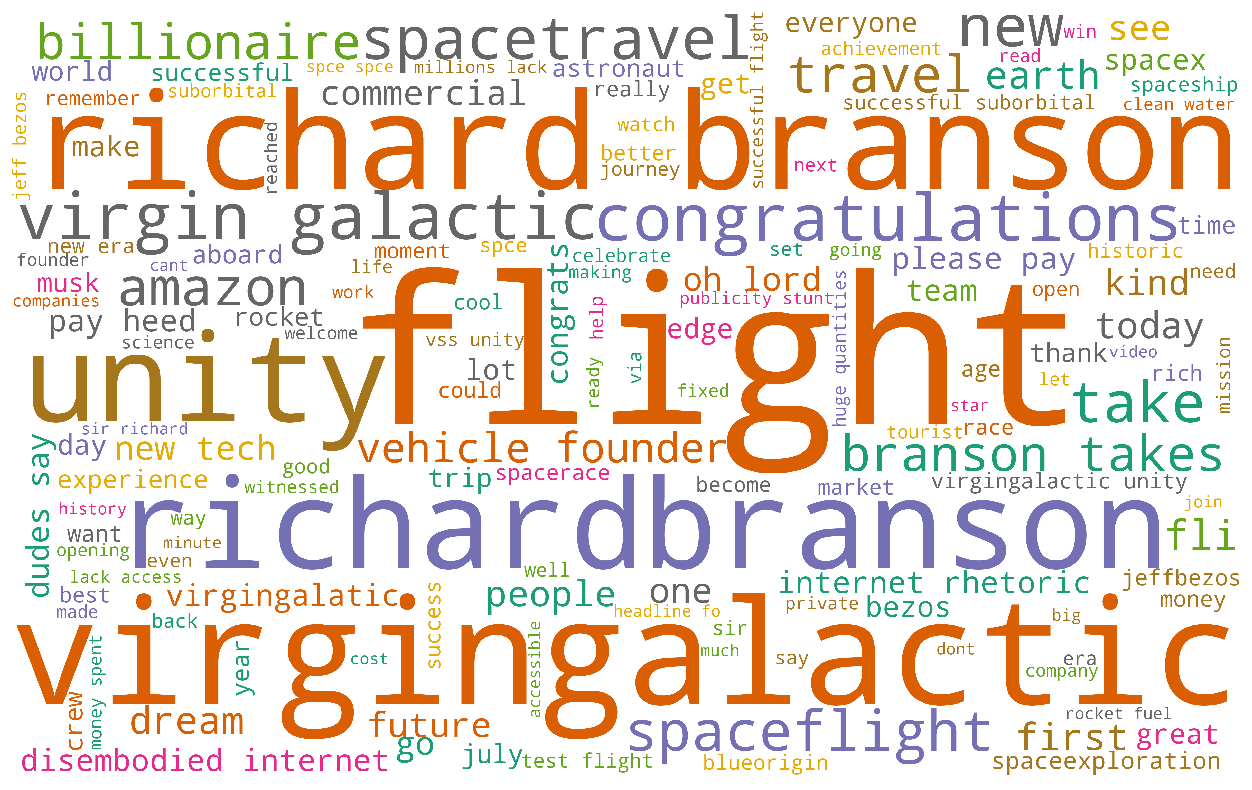

In [1410]:
pos_processed_doc_4 = []
for text in df_st_positive['text'].str.lower():
    processed_text = re.sub(r"(?:\@|http?\://https?\://|www)\S+", "", text)
    processed_text = "".join(processed_text).strip()
    pos_processed_doc_4.append(processed_text)
    
pos_final_doc_4 =  pd.Series(pos_processed_doc_4)

pos_docs_tokens_4 = pos_final_doc_4.str.replace('[^a-z\s#@]', '').str.split(' ')

pos_tokens_4 = []
for tokens in pos_docs_tokens_4:
    pos_tokens_4.extend(tokens)

pos_strings_4 = ' '.join(pos_tokens_4)
pos_wc_4 = WordCloud(background_color='White', stopwords=all_stopwords_4,width=1600,height=1000,
               scale=3,max_words=150,random_state=837,font_step=1,mode='RGB',colormap='Dark2_r').generate(pos_strings_4)
plt.figure(figsize=(40,10))
plt.imshow(pos_wc_4)
plt.axis('off');

##### Wordcloud of negative tweets

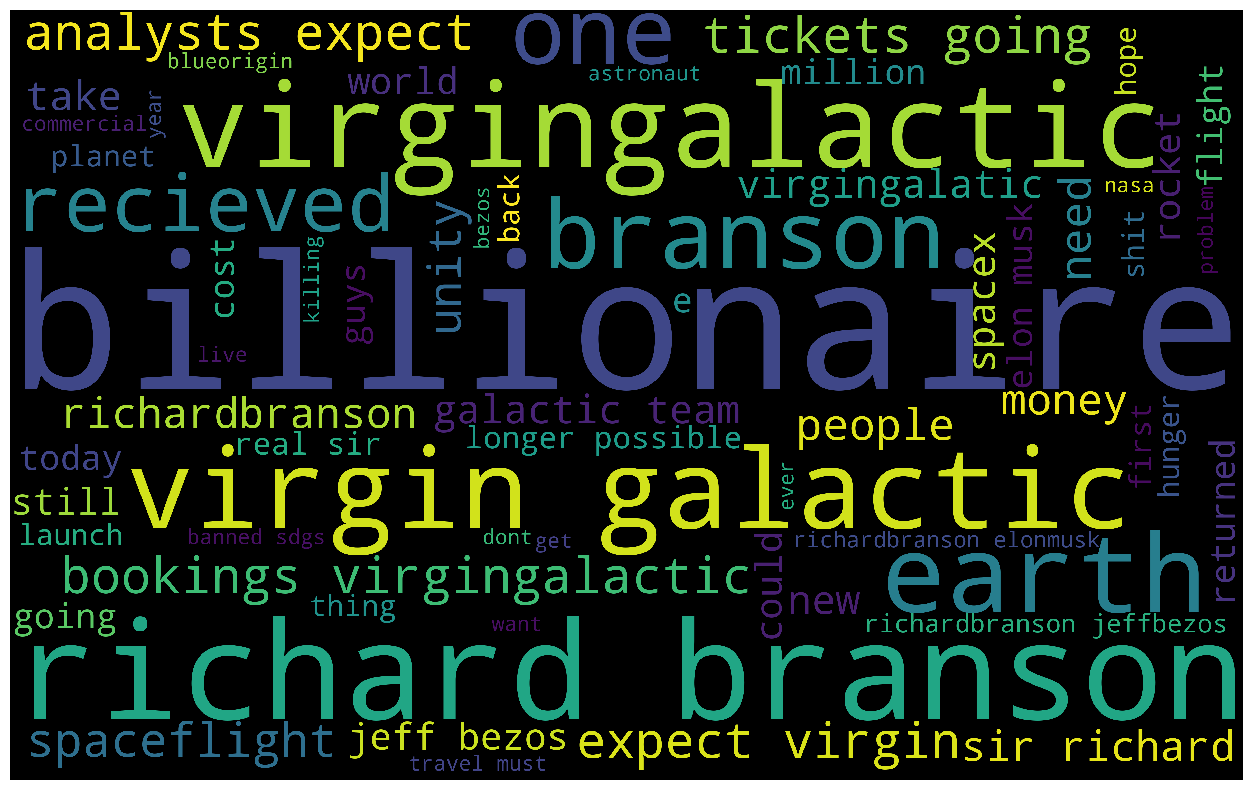

In [1411]:
neg_processed_doc_4 = []
for text in df_st_negative['text'].str.lower():
    processed_text = re.sub(r"(?:\@|http?\://https?\://|www)\S+", "", text)
    processed_text = "".join(processed_text).strip()
    neg_processed_doc_4.append(processed_text)
    
neg_final_doc_4 =  pd.Series(neg_processed_doc_4)

neg_docs_tokens_4 = neg_final_doc_4.str.replace('[^a-z\s#@]', '').str.split(' ')

neg_tokens_4 = []
for tokens in neg_docs_tokens_4:
    neg_tokens_4.extend(tokens)

neg_strings_4 = ' '.join(neg_tokens_4)
neg_wc_4 = WordCloud(background_color='black', stopwords=all_stopwords_4,width=1600,height=1000,
               scale=3,max_words=250,random_state=612,font_step=1,mode='RGB',colormap='viridis',
                   min_font_size=20,max_font_size=450,prefer_horizontal=0.5).generate(neg_strings_4)
plt.figure(figsize=(40,10))
plt.imshow(neg_wc_4)
plt.axis('off');

##### Wordcloud of neutral tweets

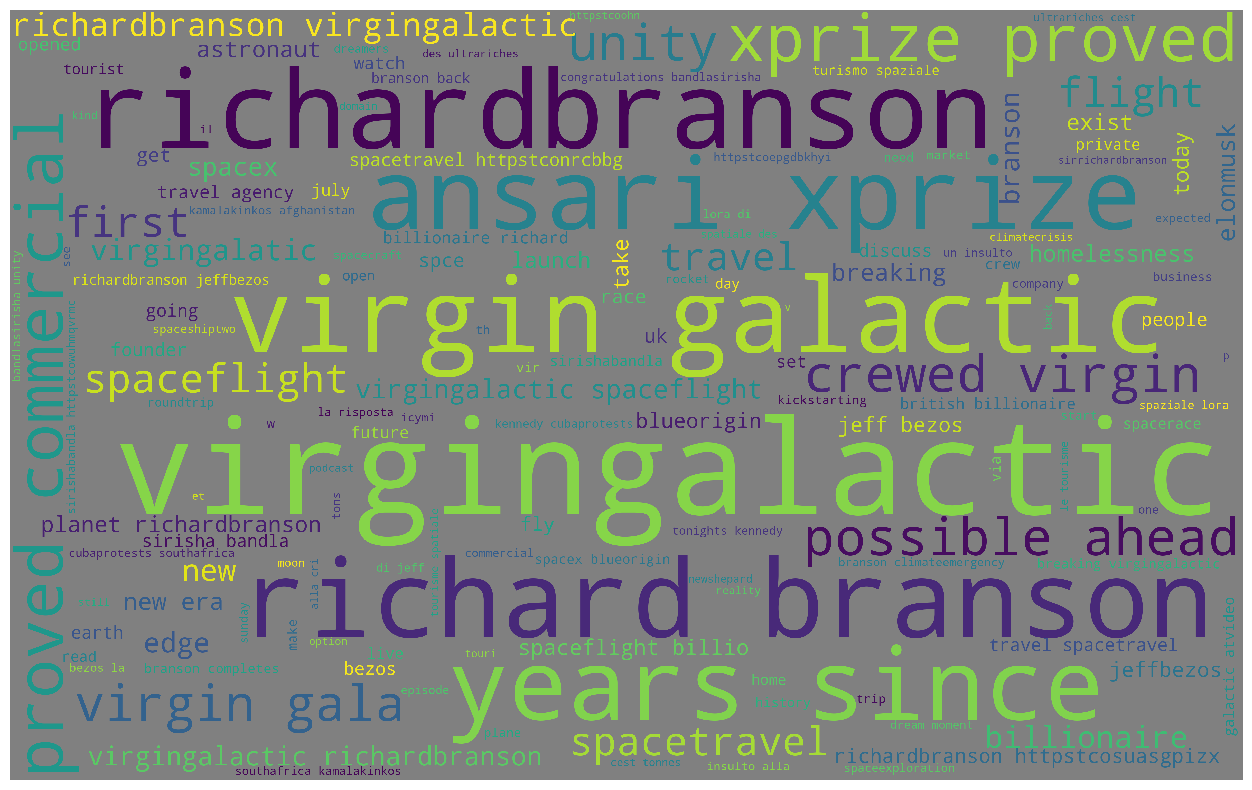

In [1412]:
neu_processed_doc_4 = []
for text in df_st_neutral['text'].str.lower():
    processed_text = re.sub(r"(?:\@|http?\://https?\://|www)\S+", "", text)
    processed_text = "".join(processed_text).strip()
    neu_processed_doc_4.append(processed_text)
    
neu_final_doc_4 =  pd.Series(neu_processed_doc_4)

neu_docs_tokens_4 = neu_final_doc_4.str.replace('[^a-z\s#@]', '').str.split(' ')

neu_tokens_4 = []
for tokens in neu_docs_tokens_4:
    neu_tokens_4.extend(tokens)

neu_strings_4 = ' '.join(neu_tokens_4)
neu_wc_4 = WordCloud(background_color='gray', stopwords=all_stopwords_4,width=1600,height=1000,
               scale=3,max_words=150,random_state=837,font_step=1,mode='RGB',colormap='viridis').generate(neu_strings_4)
plt.figure(figsize=(40,10))
plt.imshow(neu_wc_4)
plt.axis('off');

### Model 2: Sentiment Analysis using Logistic Regression

In [1413]:
st_log_senti = st_senti.copy()

In [1414]:
st_log_senti

created_at  likes  retweets      screen_name  \
0    2021-07-16 20:06:23    0.0       6.0         arukundo   
1    2021-07-16 20:05:02    0.0       0.0       NSR_SatCom   
2    2021-07-16 19:57:34    0.0      21.0   simplemama2013   
3    2021-07-16 19:54:04    0.0       6.0    thegentlejain   
4    2021-07-16 19:49:13    0.0       6.0         Shi4Tech   
...                  ...    ...       ...              ...   
1982 2021-07-09 00:25:06    1.0       1.0      grahm_larry   
1983 2021-07-08 18:16:42    0.0       0.0  YourChiaroscuro   
1984 2021-07-08 15:10:04    0.0       1.0       godfrey_G_   
1985 2021-07-08 12:50:03    0.0       0.0       maristpoll   
1986 2021-07-08 12:32:49    1.0       0.0  officiallydarko   

                   source                                               text  \
0     Twitter for Android  RT @PawlowskiMario: This is what #JeffBezos's ...   
1          Hootsuite Inc.  Space Tourism &amp; Travel Market opportunity ...   
2     Twitter for Android  RT @touristmtravel: First Space Tourism Travel...   
3     Twitter for Android  RT @PawlowskiMario: This is what #JeffBezos's ...   
4         Twitter Web App  RT @PawlowskiMario: This is what #JeffBezos's ...   
...                   ...                                                ...   
1982      Twitter Web App  $SPCE \nThe Run Can Continue After 7/11\n\nhtt...   
1983     Twitter for iPad  This was, of course, before “Lord Help the Poo...   
1984           AiSpaceBot  RT @JohnStoepler: Factbox: #JeffBezos, #Richar...   
1985        Sprout Social  Is the Silent Generation over space? No comet....   
1986  Twitter for Android  Counting with you...\n\n#VirginGalactic #space...   

                                             user_name  sentiment score  
0                                         Alex Rukundo           0.0000  
1                                                  NSR           0.4215  
2                                  Simple Mama At Home           0.0000  
3                                         Akshat Jain✨           0.0000  
4                            Shi4Tech 💙 #TechForGood 💙           0.0000  
...                                                ...              ...  
1982                                       Larry Grahm           0.0000  
1983  ShootThatDeerBetweenTheHeadlights (Figurative 🤬)           0.5859  
1984                                          godfrey™           0.5267  
1985                                       Marist Poll          -0.3802  
1986                                             Darko           0.0000  

[1987 rows x 8 columns]

In [1415]:
sentiment_st = []
for score in st_log_senti['sentiment score']:
    if score > 0:
        sentiment_st.append('Positive')
    elif score < 0:
        sentiment_st.append('Negative')
    else:
        sentiment_st.append('Neutral')

In [1416]:
st_log_senti['sentiment'] = sentiment_st

In [1417]:
st_log_senti

created_at  likes  retweets      screen_name  \
0    2021-07-16 20:06:23    0.0       6.0         arukundo   
1    2021-07-16 20:05:02    0.0       0.0       NSR_SatCom   
2    2021-07-16 19:57:34    0.0      21.0   simplemama2013   
3    2021-07-16 19:54:04    0.0       6.0    thegentlejain   
4    2021-07-16 19:49:13    0.0       6.0         Shi4Tech   
...                  ...    ...       ...              ...   
1982 2021-07-09 00:25:06    1.0       1.0      grahm_larry   
1983 2021-07-08 18:16:42    0.0       0.0  YourChiaroscuro   
1984 2021-07-08 15:10:04    0.0       1.0       godfrey_G_   
1985 2021-07-08 12:50:03    0.0       0.0       maristpoll   
1986 2021-07-08 12:32:49    1.0       0.0  officiallydarko   

                   source                                               text  \
0     Twitter for Android  RT @PawlowskiMario: This is what #JeffBezos's ...   
1          Hootsuite Inc.  Space Tourism &amp; Travel Market opportunity ...   
2     Twitter for Android  RT @touristmtravel: First Space Tourism Travel...   
3     Twitter for Android  RT @PawlowskiMario: This is what #JeffBezos's ...   
4         Twitter Web App  RT @PawlowskiMario: This is what #JeffBezos's ...   
...                   ...                                                ...   
1982      Twitter Web App  $SPCE \nThe Run Can Continue After 7/11\n\nhtt...   
1983     Twitter for iPad  This was, of course, before “Lord Help the Poo...   
1984           AiSpaceBot  RT @JohnStoepler: Factbox: #JeffBezos, #Richar...   
1985        Sprout Social  Is the Silent Generation over space? No comet....   
1986  Twitter for Android  Counting with you...\n\n#VirginGalactic #space...   

                                             user_name  sentiment score  \
0                                         Alex Rukundo           0.0000   
1                                                  NSR           0.4215   
2                                  Simple Mama At Home           0.0000   
3                                         Akshat Jain✨           0.0000   
4                            Shi4Tech 💙 #TechForGood 💙           0.0000   
...                                                ...              ...   
1982                                       Larry Grahm           0.0000   
1983  ShootThatDeerBetweenTheHeadlights (Figurative 🤬)           0.5859   
1984                                          godfrey™           0.5267   
1985                                       Marist Poll          -0.3802   
1986                                             Darko           0.0000   

     sentiment  
0      Neutral  
1     Positive  
2      Neutral  
3      Neutral  
4      Neutral  
...        ...  
1982   Neutral  
1983  Positive  
1984  Positive  
1985  Negative  
1986   Neutral  

[1987 rows x 9 columns]

In [1418]:
st_log_df_final = st_log_senti[['text','sentiment']]

In [1419]:
st_log_df_final

text sentiment
0     RT @PawlowskiMario: This is what #JeffBezos's ...   Neutral
1     Space Tourism &amp; Travel Market opportunity ...  Positive
2     RT @touristmtravel: First Space Tourism Travel...   Neutral
3     RT @PawlowskiMario: This is what #JeffBezos's ...   Neutral
4     RT @PawlowskiMario: This is what #JeffBezos's ...   Neutral
...                                                 ...       ...
1982  $SPCE \nThe Run Can Continue After 7/11\n\nhtt...   Neutral
1983  This was, of course, before “Lord Help the Poo...  Positive
1984  RT @JohnStoepler: Factbox: #JeffBezos, #Richar...  Positive
1985  Is the Silent Generation over space? No comet....  Negative
1986  Counting with you...\n\n#VirginGalactic #space...   Neutral

[1987 rows x 2 columns]

In [1420]:
docs_log_st = st_log_df_final['text'].str.lower().str.replace('[^a-z\s]', '')
docs_log_st = docs_log_st.apply(remove_stopwords)
stemmer = PorterStemmer()
docs_log_st = stemmer.stem_documents(docs_log_st)

In [1421]:
train_docs_log_st, test_docs_log_st = train_test_split(pd.Series(docs_log_st), test_size=0.2, random_state=1)


vectorizer_log_st = CountVectorizer().fit(train_docs_log_st)
vocab_log_st = vectorizer_log_st.get_feature_names()

train_dtm_log_st = vectorizer_log_st.transform(train_docs_log_st)
test_dtm_log_st= vectorizer_log_st.transform(test_docs_log_st)

train_y_log_st = st_log_df_final.loc[train_docs_log_st.index, 'sentiment']
test_y_log_st = st_log_df_final.loc[test_docs_log_st.index, 'sentiment']
print(train_y_log_st.shape)
print(test_y_log_st.shape)

(1589,)
(398,)


In [1422]:
train_dtm_log_st

<1589x4453 sparse matrix of type '<class 'numpy.int64'>'
	with 20489 stored elements in Compressed Sparse Row format>

In [1423]:
test_dtm_log_st

<398x4453 sparse matrix of type '<class 'numpy.int64'>'
	with 4523 stored elements in Compressed Sparse Row format>

In [1424]:
logistic_model_st = LogisticRegression().fit(train_dtm_log_st, train_y_log_st)
test_y_log_pred_st = logistic_model_st.predict(test_dtm_log_st)

In [1425]:
print('Accuracy score: ', accuracy_score(test_y_log_st, test_y_log_pred_st))
print('F1 score: ', f1_score(test_y_log_st, test_y_log_pred_st,average='weighted'))

Accuracy score:  0.8592964824120602
F1 score:  0.8507692807735958


In [1426]:
print(confusion_matrix(test_y_log_st, test_y_log_pred_st))

[[ 14  14   7]
 [  0 193   5]
 [  4  26 135]]


In [1427]:
print(classification_report(test_y_log_st, test_y_log_pred_st))

              precision    recall  f1-score   support

    Negative       0.78      0.40      0.53        35
     Neutral       0.83      0.97      0.90       198
    Positive       0.92      0.82      0.87       165

    accuracy                           0.86       398
   macro avg       0.84      0.73      0.76       398
weighted avg       0.86      0.86      0.85       398



### Model 3: Sentiment Analysis using NaiveBayes Algorithm

In [1428]:
docs_mnb_st = st_log_df_final['text'].str.lower().str.replace('[^a-z\s]', '')
docs_mnb_st = docs_mnb_st.apply(remove_stopwords)
stemmer = PorterStemmer()
docs_mnb_st = stemmer.stem_documents(docs_mnb_st)

train_docs_mnb_st, test_docs_mnb_st = train_test_split(pd.Series(docs_mnb_st), test_size=0.2, random_state=1)


vectorizer_mnb_st = CountVectorizer().fit(train_docs_mnb_st)
vocab_mnb_st = vectorizer_mnb_st.get_feature_names()

train_dtm_mnb_st = vectorizer_mnb_st.transform(train_docs_mnb_st)
test_dtm_mnb_st= vectorizer_mnb_st.transform(test_docs_mnb_st)

train_y_mnb_st = st_log_df_final.loc[train_docs_mnb_st.index, 'sentiment']
test_y_mnb_st = st_log_df_final.loc[test_docs_mnb_st.index, 'sentiment']

In [1429]:
train_dtm_mnb_st

<1589x4453 sparse matrix of type '<class 'numpy.int64'>'
	with 20489 stored elements in Compressed Sparse Row format>

In [1430]:
test_dtm_mnb_st

<398x4453 sparse matrix of type '<class 'numpy.int64'>'
	with 4523 stored elements in Compressed Sparse Row format>

In [1431]:
mnb_model_st = MultinomialNB().fit(train_dtm_mnb_st, train_y_mnb_st)
test_y_mnb_pred_st = mnb_model_st.predict(test_dtm_mnb_st)
print('Accuracy score: ', accuracy_score(test_y_mnb_st, test_y_mnb_pred_st))
print('F1 score: ', f1_score(test_y_mnb_st, test_y_mnb_pred_st,average='weighted'))

Accuracy score:  0.8266331658291457
F1 score:  0.8190303759694831


In [1432]:
print(confusion_matrix(test_y_mnb_st, test_y_mnb_pred_st))

[[ 13  10  12]
 [  1 165  32]
 [  2  12 151]]


In [1433]:
print(classification_report(test_y_mnb_st, test_y_mnb_pred_st))

              precision    recall  f1-score   support

    Negative       0.81      0.37      0.51        35
     Neutral       0.88      0.83      0.86       198
    Positive       0.77      0.92      0.84       165

    accuracy                           0.83       398
   macro avg       0.82      0.71      0.74       398
weighted avg       0.83      0.83      0.82       398



##### Polarity Analysis

In [1650]:
st_senti[['sentiment score']].describe()

sentiment score
count      1987.000000
mean          0.159478
std           0.344057
min          -0.889900
25%           0.000000
50%           0.000000
75%           0.401900
max           0.972900

Conclusion: The polarity score for the tweets associated with the hashtag "#spacetourism" is positive

# Keyword search: donald trump

In [1515]:
df_dt_tweets_2.shape

(5000, 7)

In [1516]:
docs_5 = df_dt_tweets_2['text'].str.lower()
docs_5.head()

0    armin laschet ist donald trump https://t.co/dy...
1    rt @gingergano: i proudly stand with donald tr...
2    rt @donwinslow: .@ivankatrump is trying to rew...
3    rt @projectlincoln: donald trump and the gop w...
4    rt @reallizusa: new!\n\npowerful statement fro...
Name: text, dtype: object

In [1517]:
processed_doc_5 = []
for text in docs_5:
    processed_text = re.sub(r"(?:\@|http?\://https?\://|www)\S+", "", text)
    processed_text = "".join(processed_text).strip()
    processed_doc_5.append(processed_text)
    
final_doc_5 =  pd.Series(processed_doc_5)

docs_tokens_5 = final_doc_5.str.replace('[^a-z\s#@]', '').str.split(' ')

tokens_5 = []
for tokens in docs_tokens_5:
    tokens_5.extend(tokens)
print('No. of tokens in entire corpus:', len(tokens_5))

No. of tokens in entire corpus: 104952


In [1518]:
tokens_freq_5 = pd.Series(tokens_5).value_counts().drop([''])
tokens_freq_5[:5]

the       5226
rt        4374
trump     3789
donald    3648
a         2871
dtype: int64

In [1522]:
common_stopwords = nltk.corpus.stopwords.words('english')
custom_stopwords_5 = ['rt',"it's",'amp','yes','like','also','would','us','im','donald trump','donald','trump','j']
all_stopwords_5 = np.hstack([common_stopwords, custom_stopwords_5])
len(all_stopwords_5)

192

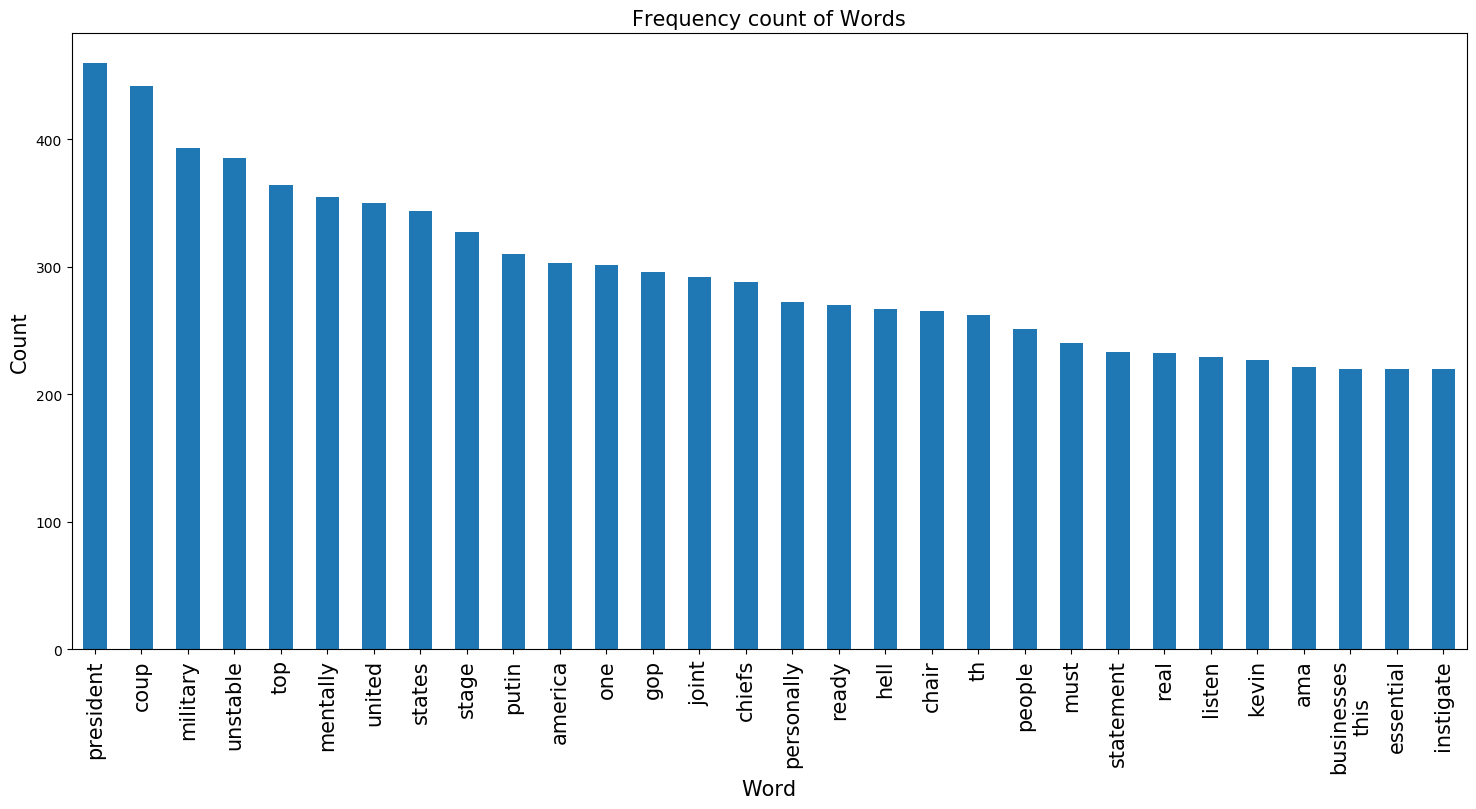

In [1523]:
df_tokens_5 = pd.DataFrame(tokens_freq_5).reset_index().rename(columns={'index': 'token', 0: 'frequency'})
df_tokens_5 = df_tokens_5[~df_tokens_5['token'].isin(all_stopwords_5)]
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
df_tokens_5.set_index('token')['frequency'].head(30).plot.bar()
plt.title('Frequency count of Words',fontsize=15)
plt.xlabel('Word',fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

##### Wordcloud of tweets

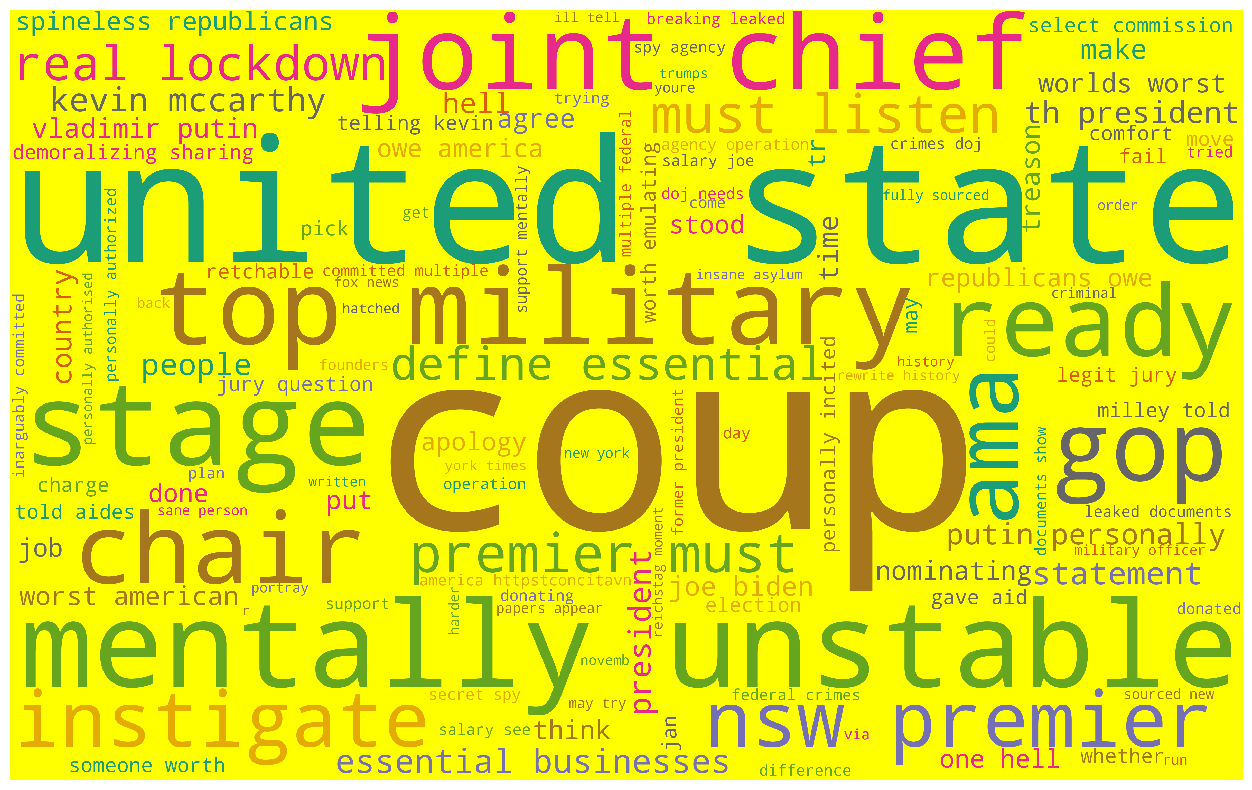

In [1524]:
docs_strings_5 = ' '.join(tokens_5)
wc_5 = WordCloud(background_color='yellow', stopwords=all_stopwords_5,width=1600,height=1000,
               scale=3,max_words=125,random_state=612,font_step=1,mode='RGB',colormap='Dark2_r').generate(docs_strings_5)
plt.figure(figsize=(40,10))
plt.imshow(wc_5)
plt.axis('off');

### Model 1:  Sentiment Analysis using SentimentIntensityAnalyzer

In [1525]:
djt_senti = df_dt_tweets_2.copy()

In [1526]:
djt_senti.head()

created_at  likes  retweets      screen_name               source  \
0 2021-07-16 07:41:08    0.0       0.0  ImDylanForsberg      Twitter Web App   
1 2021-07-16 07:41:08    0.0     392.0  getonboardkag24     Twitter for iPad   
2 2021-07-16 07:41:05    0.0     712.0   GailB4611579CA     Twitter for iPad   
3 2021-07-16 07:41:04    0.0    8678.0     patmore_kate   Twitter for iPhone   
4 2021-07-16 07:41:00    0.0     775.0  LindaPo48395205  Twitter for Android   

                                                text      user_name  
0  Armin Laschet ist Donald Trump https://t.co/dY...  dylan soprano  
1  RT @GingerGano: I proudly stand with Donald Tr...      Trump Won  
2  RT @donwinslow: .@IvankaTrump is trying to rew...   gail briones  
3  RT @ProjectLincoln: Donald Trump and the GOP w...   Kate Patmore  
4  RT @realLizUSA: NEW!\n\nPowerful statement fro...   Linda Porter

In [1527]:
analyzer = SentimentIntensityAnalyzer()
djt_senti['sentiment score'] = djt_senti['text'].apply(lambda v: analyzer.polarity_scores(v)['compound'])
print(djt_senti['sentiment score'].max())
print(djt_senti['sentiment score'].min())

0.9653
-0.9844


In [1529]:
djt_senti[djt_senti['sentiment score'] == 0.9653]

created_at  likes  retweets   screen_name           source  \
2504 2021-07-16 06:21:01    0.0       0.0  UrNewsLies2U  Twitter Web App   

                                                   text          user_name  \
2504  @KeithOlbermann @RonDobsonTalk LOVE TRUMP !!! ...  Defender of TRUTH   

      sentiment score  
2504           0.9653

In [1530]:
djt_senti[djt_senti['sentiment score'] == -0.9844]

created_at  likes  retweets screen_name           source  \
2992 2021-07-16 06:08:19    0.0       0.0   OChenault  Twitter Web App   

                                                   text  \
2992  Murder, 600, Thousand death. Willful Neglect i...   

                               user_name  sentiment score  
2992  Never Give Up On Humans Rights 🌎💚🌱          -0.9844

In [1531]:
positive_5 = 0
negative_5 = 0
neutral_5 = 0
for score in djt_senti['sentiment score']:
    if score > 0:
        positive_5+=1
    elif score < 0:
        negative_5+=1
    else:
        neutral_5+=1

In [1532]:
print(positive_5)
print(negative_5)
print(neutral_5)

1662
1661
1677


In [1533]:
pos5_percent = round((positive_5/(positive_5 + negative_5 + neutral_5))*100,2)
neg5_percent = round((negative_5/(positive_5 + negative_5 + neutral_5))*100,2)
neu5_percent = round((neutral_5/(positive_5 + negative_5 + neutral_5))*100,2)

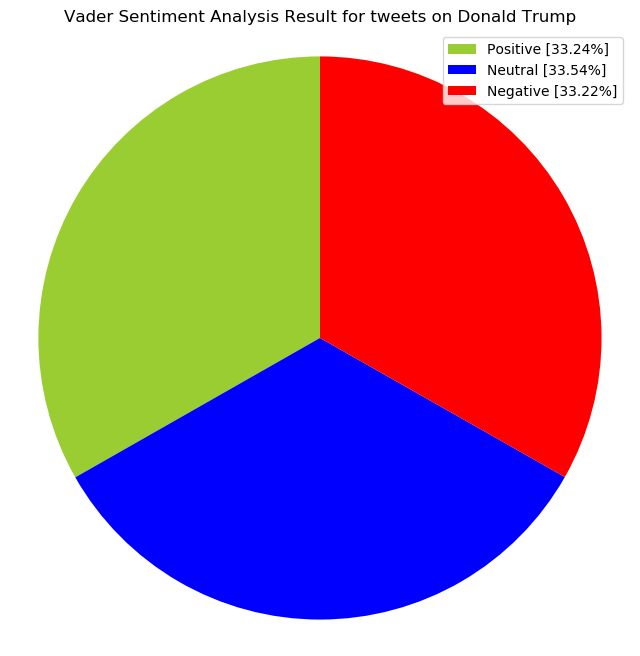

In [1535]:
plt.figure(figsize=(8,8))
labels = ['Positive ['+str(pos5_percent)+'%]' , 'Neutral ['+str(neu5_percent)+'%]','Negative ['+str(neg5_percent)+'%]']
sizes = [positive_5, neutral_5, negative_5]
colors = ['yellowgreen','blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Vader Sentiment Analysis Result for tweets on Donald Trump" )
plt.axis('equal')
plt.show()

In [1536]:
df_djt_positive = djt_senti[djt_senti['sentiment score'] > 0]
df_djt_negative = djt_senti[djt_senti['sentiment score'] < 0]
df_djt_neutral = djt_senti[djt_senti['sentiment score'] == 0]

##### Wordcloud of positive tweets

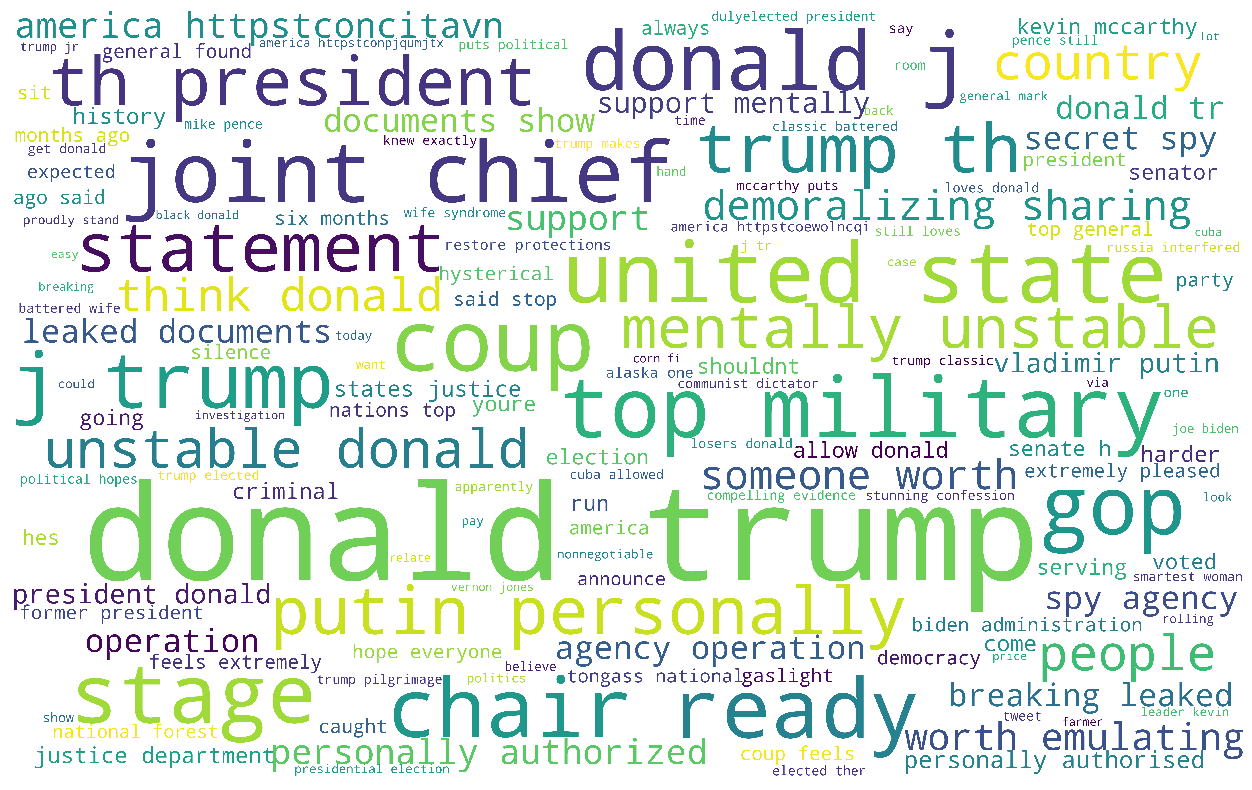

In [1544]:
pos_processed_doc_5 = []
for text in df_djt_positive['text'].str.lower():
    processed_text = re.sub(r"(?:\@|http?\://https?\://|www)\S+", "", text)
    processed_text = "".join(processed_text).strip()
    pos_processed_doc_5.append(processed_text)
    
pos_final_doc_5 =  pd.Series(pos_processed_doc_5)

pos_docs_tokens_5 = pos_final_doc_5.str.replace('[^a-z\s#@]', '').str.split(' ')

pos_tokens_5 = []
for tokens in pos_docs_tokens_5:
    pos_tokens_5.extend(tokens)

pos_strings_5 = ' '.join(pos_tokens_5)
pos_wc_5 = WordCloud(background_color='White', stopwords=all_stopwords_2,width=1600,height=1000,
               scale=5,max_words=150,random_state=837,font_step=1,mode='RGB',colormap='viridis',prefer_horizontal=1).generate(pos_strings_5)
plt.figure(figsize=(40,10))
plt.imshow(pos_wc_5)
plt.axis('off');

##### Wordcloud of negative tweets

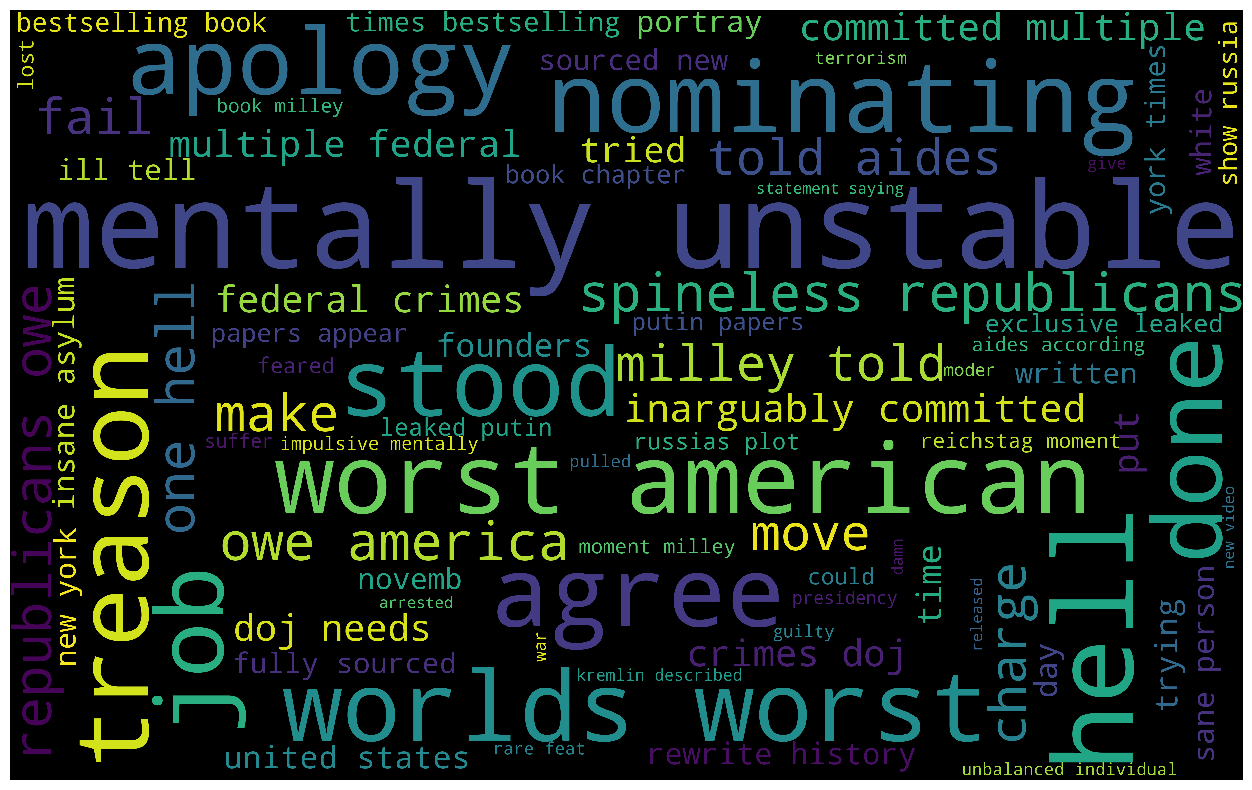

In [1547]:
neg_processed_doc_5 = []
for text in df_djt_negative['text'].str.lower():
    processed_text = re.sub(r"(?:\@|http?\://https?\://|www)\S+", "", text)
    processed_text = "".join(processed_text).strip()
    neg_processed_doc_5.append(processed_text)
    
neg_final_doc_5 =  pd.Series(neg_processed_doc_5)

neg_docs_tokens_5 = neg_final_doc_5.str.replace('[^a-z\s#@]', '').str.split(' ')

neg_tokens_5 = []
for tokens in neg_docs_tokens_5:
    neg_tokens_5.extend(tokens)

neg_strings_5 = ' '.join(neg_tokens_5)
neg_wc_5 = WordCloud(background_color='black', stopwords=all_stopwords_5,width=1600,height=1000,
               scale=3,max_words=200,random_state=612,font_step=1,mode='RGB',colormap='viridis',
                   min_font_size=20,max_font_size=450,prefer_horizontal=0.5).generate(neg_strings_5)
plt.figure(figsize=(40,10))
plt.imshow(neg_wc_5)
plt.axis('off');

##### Wordcloud of neutral tweets

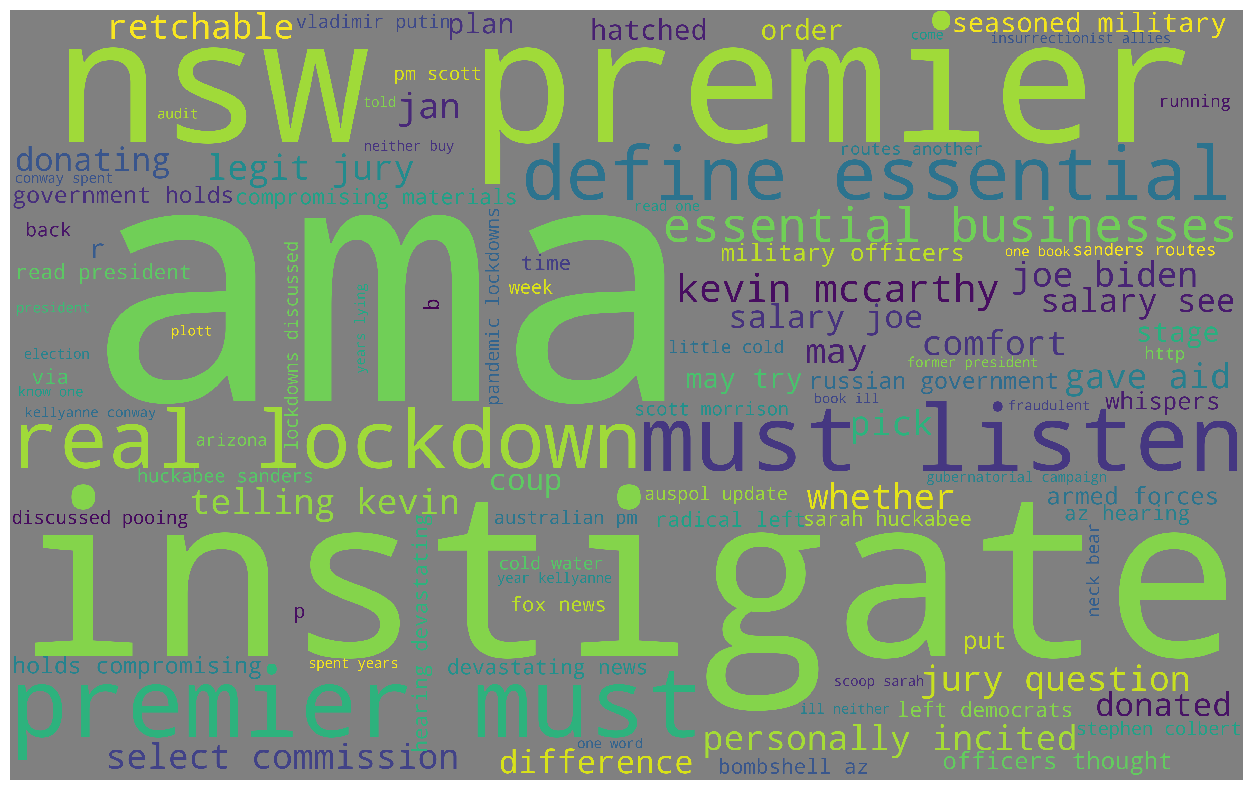

In [1550]:
neu_processed_doc_5 = []
for text in df_djt_neutral['text'].str.lower():
    processed_text = re.sub(r"(?:\@|http?\://https?\://|www)\S+", "", text)
    processed_text = "".join(processed_text).strip()
    neu_processed_doc_5.append(processed_text)
    
neu_final_doc_5 =  pd.Series(neu_processed_doc_5)

neu_docs_tokens_5 = neu_final_doc_5.str.replace('[^a-z\s#@]', '').str.split(' ')

neu_tokens_5 = []
for tokens in neu_docs_tokens_5:
    neu_tokens_5.extend(tokens)

neu_strings_5 = ' '.join(neu_tokens_5)
neu_wc_5 = WordCloud(background_color='gray', stopwords=all_stopwords_5,width=1600,height=1000,
               scale=3,max_words=100,random_state=837,font_step=1,mode='RGB',colormap='viridis').generate(neu_strings_5)
plt.figure(figsize=(40,10))
plt.imshow(neu_wc_5)
plt.axis('off');

### Model 3: Sentiment Analysis using Logistic Regression

In [1551]:
djt_log_senti =djt_senti.copy()

In [1552]:
djt_log_senti

created_at  likes  retweets      screen_name  \
0    2021-07-16 07:41:08    0.0       0.0  ImDylanForsberg   
1    2021-07-16 07:41:08    0.0     392.0  getonboardkag24   
2    2021-07-16 07:41:05    0.0     712.0   GailB4611579CA   
3    2021-07-16 07:41:04    0.0    8678.0     patmore_kate   
4    2021-07-16 07:41:00    0.0     775.0  LindaPo48395205   
...                  ...    ...       ...              ...   
4995 2021-07-16 05:21:00    0.0      77.0      LaReeKirby1   
4996 2021-07-16 05:21:00    0.0     379.0  kristineshofner   
4997 2021-07-16 05:20:59    0.0    1969.0        l_haefner   
4998 2021-07-16 05:20:59    0.0       0.0      danangell11   
4999 2021-07-16 05:20:59    0.0    3156.0        SketchyRN   

                   source                                               text  \
0         Twitter Web App  Armin Laschet ist Donald Trump https://t.co/dY...   
1        Twitter for iPad  RT @GingerGano: I proudly stand with Donald Tr...   
2        Twitter for iPad  RT @donwinslow: .@IvankaTrump is trying to rew...   
3      Twitter for iPhone  RT @ProjectLincoln: Donald Trump and the GOP w...   
4     Twitter for Android  RT @realLizUSA: NEW!\n\nPowerful statement fro...   
...                   ...                                                ...   
4995  Twitter for Android  RT @TrumpFile: @politvidchannel @Ty___Webb Thi...   
4996      Twitter Web App  RT @AlexandraChalup: While this document relea...   
4997     Twitter for iPad  RT @SethAbramson: I'll tell you that it's a he...   
4998      Twitter Web App  @Christi54508025 @AnthonyCarneir2 @axiomatic11...   
4999  Twitter for Android  RT @KaivanShroff: 🚨BREAKING: leaked documents ...   

                          user_name  sentiment score  
0                     dylan soprano           0.0000  
1                         Trump Won           0.5983  
2                      gail briones          -0.4019  
3                      Kate Patmore           0.5106  
4                      Linda Porter           0.4753  
...                             ...              ...  
4995                    LaRee Kirby           0.0000  
4996  Kris Shofner #BidenHarris2020           0.0000  
4997                    Haefner____          -0.6808  
4998                     Dan Angell           0.7430  
4999                          Becky           0.1027  

[5000 rows x 8 columns]

In [1553]:
sentiment_djt = []
for score in djt_log_senti['sentiment score']:
    if score > 0:
        sentiment_djt.append('Positive')
    elif score < 0:
        sentiment_djt.append('Negative')
    else:
        sentiment_djt.append('Neutral')
djt_log_senti['sentiment'] = sentiment_djt
djt_log_senti

created_at  likes  retweets      screen_name  \
0    2021-07-16 07:41:08    0.0       0.0  ImDylanForsberg   
1    2021-07-16 07:41:08    0.0     392.0  getonboardkag24   
2    2021-07-16 07:41:05    0.0     712.0   GailB4611579CA   
3    2021-07-16 07:41:04    0.0    8678.0     patmore_kate   
4    2021-07-16 07:41:00    0.0     775.0  LindaPo48395205   
...                  ...    ...       ...              ...   
4995 2021-07-16 05:21:00    0.0      77.0      LaReeKirby1   
4996 2021-07-16 05:21:00    0.0     379.0  kristineshofner   
4997 2021-07-16 05:20:59    0.0    1969.0        l_haefner   
4998 2021-07-16 05:20:59    0.0       0.0      danangell11   
4999 2021-07-16 05:20:59    0.0    3156.0        SketchyRN   

                   source                                               text  \
0         Twitter Web App  Armin Laschet ist Donald Trump https://t.co/dY...   
1        Twitter for iPad  RT @GingerGano: I proudly stand with Donald Tr...   
2        Twitter for iPad  RT @donwinslow: .@IvankaTrump is trying to rew...   
3      Twitter for iPhone  RT @ProjectLincoln: Donald Trump and the GOP w...   
4     Twitter for Android  RT @realLizUSA: NEW!\n\nPowerful statement fro...   
...                   ...                                                ...   
4995  Twitter for Android  RT @TrumpFile: @politvidchannel @Ty___Webb Thi...   
4996      Twitter Web App  RT @AlexandraChalup: While this document relea...   
4997     Twitter for iPad  RT @SethAbramson: I'll tell you that it's a he...   
4998      Twitter Web App  @Christi54508025 @AnthonyCarneir2 @axiomatic11...   
4999  Twitter for Android  RT @KaivanShroff: 🚨BREAKING: leaked documents ...   

                          user_name  sentiment score sentiment  
0                     dylan soprano           0.0000   Neutral  
1                         Trump Won           0.5983  Positive  
2                      gail briones          -0.4019  Negative  
3                      Kate Patmore           0.5106  Positive  
4                      Linda Porter           0.4753  Positive  
...                             ...              ...       ...  
4995                    LaRee Kirby           0.0000   Neutral  
4996  Kris Shofner #BidenHarris2020           0.0000   Neutral  
4997                    Haefner____          -0.6808  Negative  
4998                     Dan Angell           0.7430  Positive  
4999                          Becky           0.1027  Positive  

[5000 rows x 9 columns]

In [1554]:
djt_log_df_final = djt_log_senti[['text','sentiment']]

In [1555]:
djt_log_df_final

text sentiment
0     Armin Laschet ist Donald Trump https://t.co/dY...   Neutral
1     RT @GingerGano: I proudly stand with Donald Tr...  Positive
2     RT @donwinslow: .@IvankaTrump is trying to rew...  Negative
3     RT @ProjectLincoln: Donald Trump and the GOP w...  Positive
4     RT @realLizUSA: NEW!\n\nPowerful statement fro...  Positive
...                                                 ...       ...
4995  RT @TrumpFile: @politvidchannel @Ty___Webb Thi...   Neutral
4996  RT @AlexandraChalup: While this document relea...   Neutral
4997  RT @SethAbramson: I'll tell you that it's a he...  Negative
4998  @Christi54508025 @AnthonyCarneir2 @axiomatic11...  Positive
4999  RT @KaivanShroff: 🚨BREAKING: leaked documents ...  Positive

[5000 rows x 2 columns]

In [1556]:
docs_log_djt = djt_log_df_final['text'].str.lower().str.replace('[^a-z\s]', '')
docs_log_djt = docs_log_djt.apply(remove_stopwords)
stemmer = PorterStemmer()
docs_log_djt = stemmer.stem_documents(docs_log_djt)

In [1557]:
train_docs_log_djt, test_docs_log_djt = train_test_split(pd.Series(docs_log_djt), test_size=0.2, random_state=1)


vectorizer_log_djt = CountVectorizer().fit(train_docs_log_djt)
vocab_log_djt = vectorizer_log_djt.get_feature_names()

train_dtm_log_djt = vectorizer_log_djt.transform(train_docs_log_djt)
test_dtm_log_djt= vectorizer_log_djt.transform(test_docs_log_djt)

train_y_log_djt = djt_log_df_final.loc[train_docs_log_djt.index, 'sentiment']
test_y_log_djt = djt_log_df_final.loc[test_docs_log_djt.index, 'sentiment']
print(train_y_log_djt.shape)
print(test_y_log_djt.shape)

(4000,)
(1000,)


In [1558]:
train_dtm_log_djt

<4000x4693 sparse matrix of type '<class 'numpy.int64'>'
	with 49314 stored elements in Compressed Sparse Row format>

In [1559]:
test_dtm_log_djt

<1000x4693 sparse matrix of type '<class 'numpy.int64'>'
	with 11546 stored elements in Compressed Sparse Row format>

In [1561]:
logistic_model_djt = LogisticRegression().fit(train_dtm_log_djt, train_y_log_djt)
test_y_log_pred_djt = logistic_model_djt.predict(test_dtm_log_djt)
print('Accuracy score: ', accuracy_score(test_y_log_djt, test_y_log_pred_djt))
print('F1 score: ', f1_score(test_y_log_djt, test_y_log_pred_djt,average='weighted'))

Accuracy score:  0.931
F1 score:  0.9309463820926601


In [1562]:
print(confusion_matrix(test_y_log_djt, test_y_log_pred_djt))

[[313  18  11]
 [ 17 346   9]
 [  6   8 272]]


In [1563]:
print(classification_report(test_y_log_djt, test_y_log_pred_djt))

              precision    recall  f1-score   support

    Negative       0.93      0.92      0.92       342
     Neutral       0.93      0.93      0.93       372
    Positive       0.93      0.95      0.94       286

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000



### Model 3: Sentiment Analysis using NaiveBayes Algorithm

In [1564]:
docs_mnb_djt = djt_log_df_final['text'].str.lower().str.replace('[^a-z\s]', '')
docs_mnb_djt = docs_mnb_djt.apply(remove_stopwords)
stemmer = PorterStemmer()
docs_mnb_djt = stemmer.stem_documents(docs_mnb_djt)

train_docs_mnb_djt, test_docs_mnb_djt = train_test_split(pd.Series(docs_mnb_djt), test_size=0.2, random_state=1)


vectorizer_mnb_djt = CountVectorizer().fit(train_docs_mnb_djt)
vocab_mnb_djt = vectorizer_mnb_djt.get_feature_names()

train_dtm_mnb_djt = vectorizer_mnb_djt.transform(train_docs_mnb_djt)
test_dtm_mnb_djt= vectorizer_mnb_djt.transform(test_docs_mnb_djt)

train_y_mnb_djt = djt_log_df_final.loc[train_docs_mnb_djt.index, 'sentiment']
test_y_mnb_djt = djt_log_df_final.loc[test_docs_mnb_djt.index, 'sentiment']

In [1565]:
train_dtm_mnb_djt

<4000x4693 sparse matrix of type '<class 'numpy.int64'>'
	with 49314 stored elements in Compressed Sparse Row format>

In [1566]:
test_dtm_mnb_djt

<1000x4693 sparse matrix of type '<class 'numpy.int64'>'
	with 11546 stored elements in Compressed Sparse Row format>

In [1569]:
mnb_model_djt = MultinomialNB().fit(train_dtm_mnb_djt, train_y_mnb_djt)
test_y_mnb_pred_djt = mnb_model_djt.predict(test_dtm_mnb_djt)
print('Accuracy score: ', accuracy_score(test_y_mnb_djt, test_y_mnb_pred_djt))
print('F1 score: ', f1_score(test_y_mnb_djt, test_y_mnb_pred_djt,average='weighted'))

Accuracy score:  0.904
F1 score:  0.9038714713603376


In [1570]:
print(confusion_matrix(test_y_mnb_djt, test_y_mnb_pred_djt))

[[317   7  18]
 [ 32 317  23]
 [  7   9 270]]


In [1571]:
print(classification_report(test_y_mnb_djt, test_y_mnb_pred_djt))

              precision    recall  f1-score   support

    Negative       0.89      0.93      0.91       342
     Neutral       0.95      0.85      0.90       372
    Positive       0.87      0.94      0.90       286

    accuracy                           0.90      1000
   macro avg       0.90      0.91      0.90      1000
weighted avg       0.91      0.90      0.90      1000



##### Polarity Analysis

In [1652]:
djt_senti[['sentiment score']].describe()

sentiment score
count      5000.000000
mean         -0.022259
std           0.414524
min          -0.984400
25%          -0.340000
50%           0.000000
75%           0.361200
max           0.965300

Conclusion: The polarity of tweets with the keyword 'Donald Trump' is negative

# Hashtag search: #secondwave

In [1579]:
df_sec_tweets.shape

(1910, 7)

In [1576]:
df_sec_tweets.head()

created_at  likes  retweets     screen_name               source  \
0  16-07-2021 18:22      0        11  Rai_jijeevisha  Twitter for Android   
1  16-07-2021 17:57      0         0      kkmajumdar   Twitter for iPhone   
2  16-07-2021 17:57      0         0      kkmajumdar   Twitter for iPhone   
3  16-07-2021 17:37      0         5        prabha_j      Twitter Web App   
4  16-07-2021 17:31      0        19   PIBChandigarh  Twitter for Android   

                                                text  \
0  RT @ArunDeshpande20: @myogiadityanath has been...   
1  @BBCNews Seriously #UK you seriously want #Fre...   
2  Seriously #UK you seriously want #FreedomDay c...   
3  RT @newslaundry: UP's peak positivity figure o...   
4  RT @PIB_India: Dr. VK Paul, Member (Health), @...   

                            user_name  
0                     PAWAN KUMAR RAI  
1  Kaushik Majumdar #YNWA #LFCforlife  
2  Kaushik Majumdar #YNWA #LFCforlife  
3                for Aslan! پربھا آپا  
4                   PIB in Chandigarh

In [1577]:
docs_6 = df_sec_tweets['text'].str.lower()
docs_6.head()

0    rt @arundeshpande20: @myogiadityanath has been...
1    @bbcnews seriously #uk you seriously want #fre...
2    seriously #uk you seriously want #freedomday c...
3    rt @newslaundry: up's peak positivity figure o...
4    rt @pib_india: dr. vk paul, member (health), @...
Name: text, dtype: object

In [1583]:
processed_doc_6 = []
for text in docs_6:
    processed_text = re.sub(r"(?:\@|http?\://https?\://|www)\S+", "", text)
    processed_text = "".join(processed_text).strip()
    processed_doc_6.append(processed_text)
    
final_doc_6 =  pd.Series(processed_doc_6).apply(lambda x: re.compile(r'[\n\r\t\n\n]').sub("",x))

docs_tokens_6 = final_doc_6.str.replace('[^a-z\s#@]', '').str.split(' ')

tokens_6 = []
for tokens in docs_tokens_6:
    tokens_6.extend(tokens)
print('No. of tokens in entire corpus:', len(tokens_6))

No. of tokens in entire corpus: 35760


In [1584]:
tokens_freq_6 = pd.Series(tokens_6).value_counts().drop([''])
tokens_freq_6[:5]

my             1785
rt             1523
#secondwave    1470
the            1135
#corona         886
dtype: int64

In [1616]:
common_stopwords = nltk.corpus.stopwords.words('english')
custom_stopwords_6 = ['rt',"it's",'amp','yes','like','also','would','us','im','#secondwave','httpst','httpstcozuiddoiwall',
                     'secondwave','second','wave','second wave','httpstcozuiddoiw']
all_stopwords_6 = np.hstack([common_stopwords, custom_stopwords_6])
len(all_stopwords_6)

196

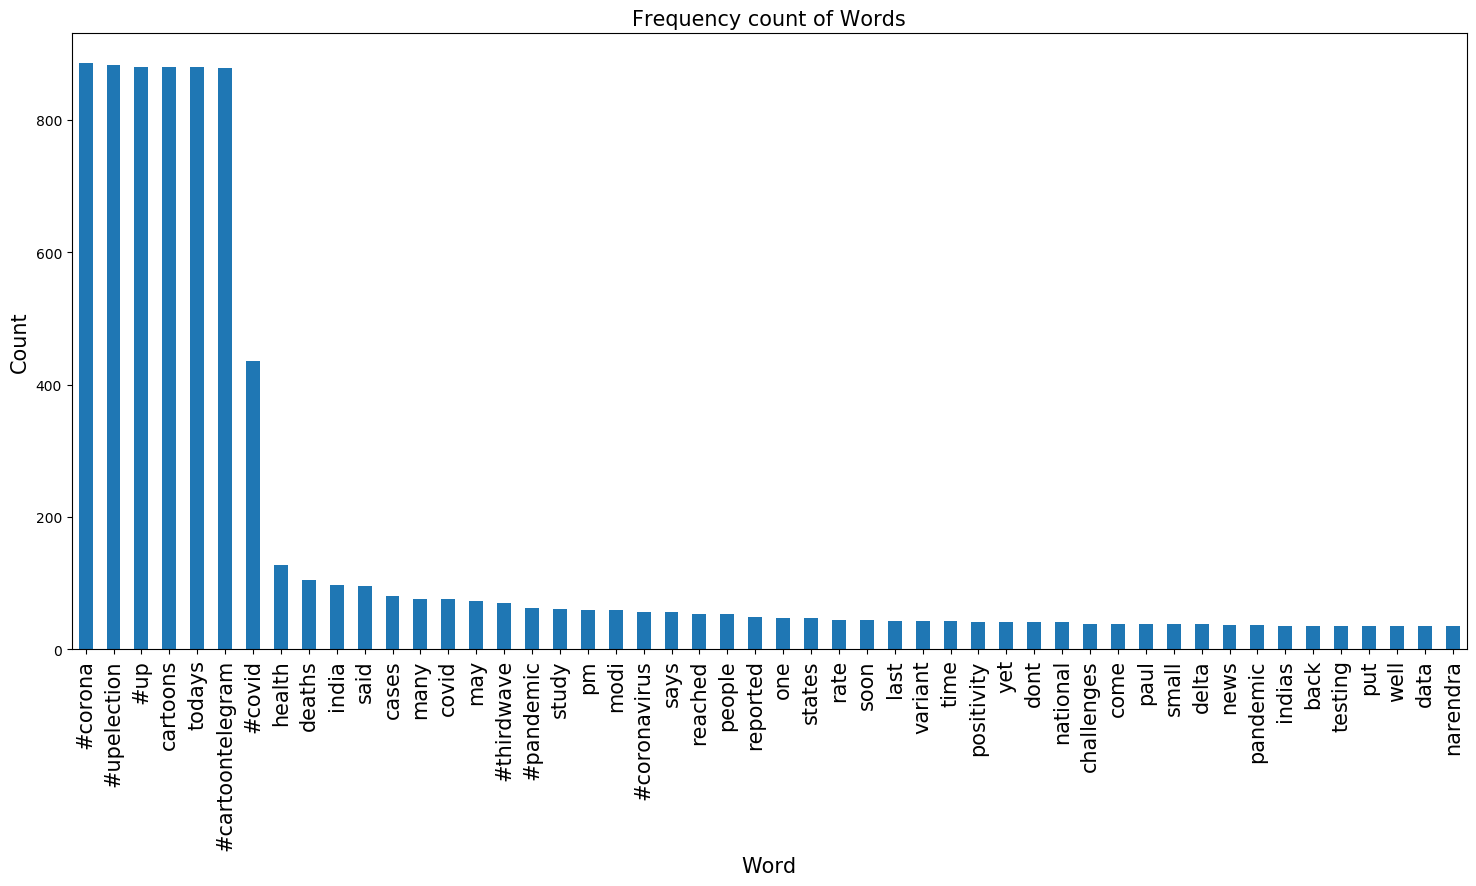

In [1594]:
df_tokens_6 = pd.DataFrame(tokens_freq_6).reset_index().rename(columns={'index': 'token', 0: 'frequency'})
df_tokens_6 = df_tokens_6[~df_tokens_6['token'].isin(all_stopwords_6)]
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
df_tokens_6.set_index('token')['frequency'].head(50).plot.bar()
plt.title('Frequency count of Words',fontsize=15)
plt.xlabel('Word',fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

##### Wordcloud of  tweets

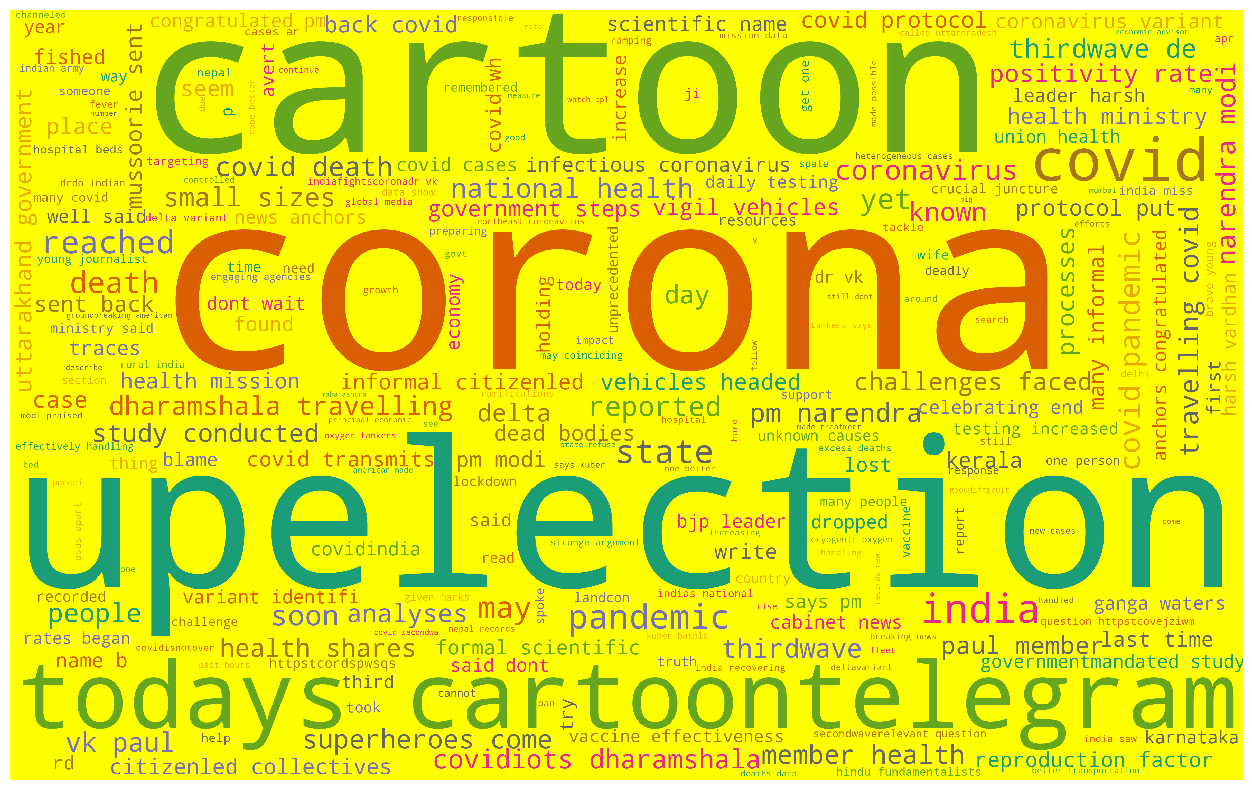

In [1598]:
docs_strings_6 = ' '.join(tokens_6)
wc_6 = WordCloud(background_color='yellow', stopwords=all_stopwords_6,width=1600,height=1000,
               scale=3,max_words=250,random_state=612,font_step=1,mode='RGB',colormap='Dark2_r').generate(docs_strings_6)
plt.figure(figsize=(40,10))
plt.imshow(wc_6)
plt.axis('off');

### Model 1:  Sentiment Analysis using SentimentIntensityAnalyzer

In [1599]:
sec_senti = df_sec_tweets.copy()

In [1600]:
sec_senti.head()

created_at  likes  retweets     screen_name               source  \
0  16-07-2021 18:22      0        11  Rai_jijeevisha  Twitter for Android   
1  16-07-2021 17:57      0         0      kkmajumdar   Twitter for iPhone   
2  16-07-2021 17:57      0         0      kkmajumdar   Twitter for iPhone   
3  16-07-2021 17:37      0         5        prabha_j      Twitter Web App   
4  16-07-2021 17:31      0        19   PIBChandigarh  Twitter for Android   

                                                text  \
0  RT @ArunDeshpande20: @myogiadityanath has been...   
1  @BBCNews Seriously #UK you seriously want #Fre...   
2  Seriously #UK you seriously want #FreedomDay c...   
3  RT @newslaundry: UP's peak positivity figure o...   
4  RT @PIB_India: Dr. VK Paul, Member (Health), @...   

                            user_name  
0                     PAWAN KUMAR RAI  
1  Kaushik Majumdar #YNWA #LFCforlife  
2  Kaushik Majumdar #YNWA #LFCforlife  
3                for Aslan! پربھا آپا  
4                   PIB in Chandigarh

In [1601]:
analyzer = SentimentIntensityAnalyzer()
sec_senti['sentiment score'] = sec_senti['text'].apply(lambda v: analyzer.polarity_scores(v)['compound'])
print(sec_senti['sentiment score'].max())
print(sec_senti['sentiment score'].min())

0.9201
-0.9375


In [1602]:
sec_senti[sec_senti['sentiment score'] == 0.9201]

created_at  likes  retweets   screen_name               source  \
1273  14-07-2021 04:13      0         0  IHHCHomeCare  Twitter for Android   

                                                   text            user_name  \
1273  The #secondwave of pandemic has robbed familie...  IndiaHomeHealthCare   

      sentiment score  
1273           0.9201

In [1603]:
sec_senti[sec_senti['sentiment score'] == -0.9375]

created_at  likes  retweets screen_name           source  \
1417  12-07-2021 15:18      0         0      ormiga  Twitter Web App   
1418  12-07-2021 15:16      0         0      ormiga  Twitter Web App   

                                                   text user_name  \
1417  ¿what #modi went WRONG w/ #covid19 response #I...    ormiga   
1418  ¿what #modi went WRONG w/ #covid19 response #I...    ormiga   

      sentiment score  
1417          -0.9375  
1418          -0.9375

In [1604]:
positive_6 = 0
negative_6 = 0
neutral_6 = 0
for score in sec_senti['sentiment score']:
    if score > 0:
        positive_6+=1
    elif score < 0:
        negative_6+=1
    else:
        neutral_6+=1

In [1605]:
print(positive_6)
print(negative_6)
print(neutral_6)

427
290
1193


In [1606]:
pos6_percent = round((positive_6/(positive_6 + negative_6 + neutral_6))*100,2)
neg6_percent = round((negative_6/(positive_6 + negative_6 + neutral_6))*100,2)
neu6_percent = round((neutral_6/(positive_6 + negative_6 + neutral_6))*100,2)

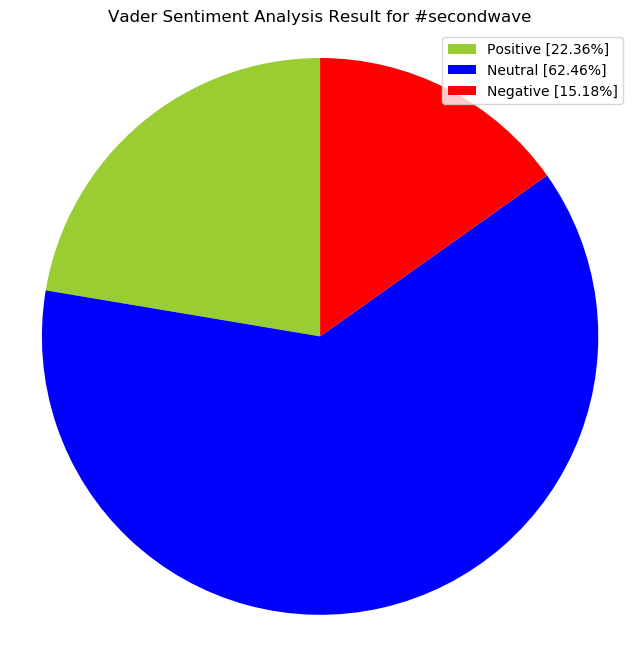

In [1608]:
plt.figure(figsize=(8,8))
labels = ['Positive ['+str(pos6_percent)+'%]' , 'Neutral ['+str(neu6_percent)+'%]','Negative ['+str(neg6_percent)+'%]']
sizes = [positive_6, neutral_6, negative_6]
colors = ['yellowgreen','blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Vader Sentiment Analysis Result for #secondwave" )
plt.axis('equal')
plt.show()

In [1609]:
df_sec_positive = sec_senti[sec_senti['sentiment score'] > 0]
df_sec_negative = sec_senti[sec_senti['sentiment score'] < 0]
df_sec_neutral = sec_senti[sec_senti['sentiment score'] == 0]

##### Wordcloud of positive tweets

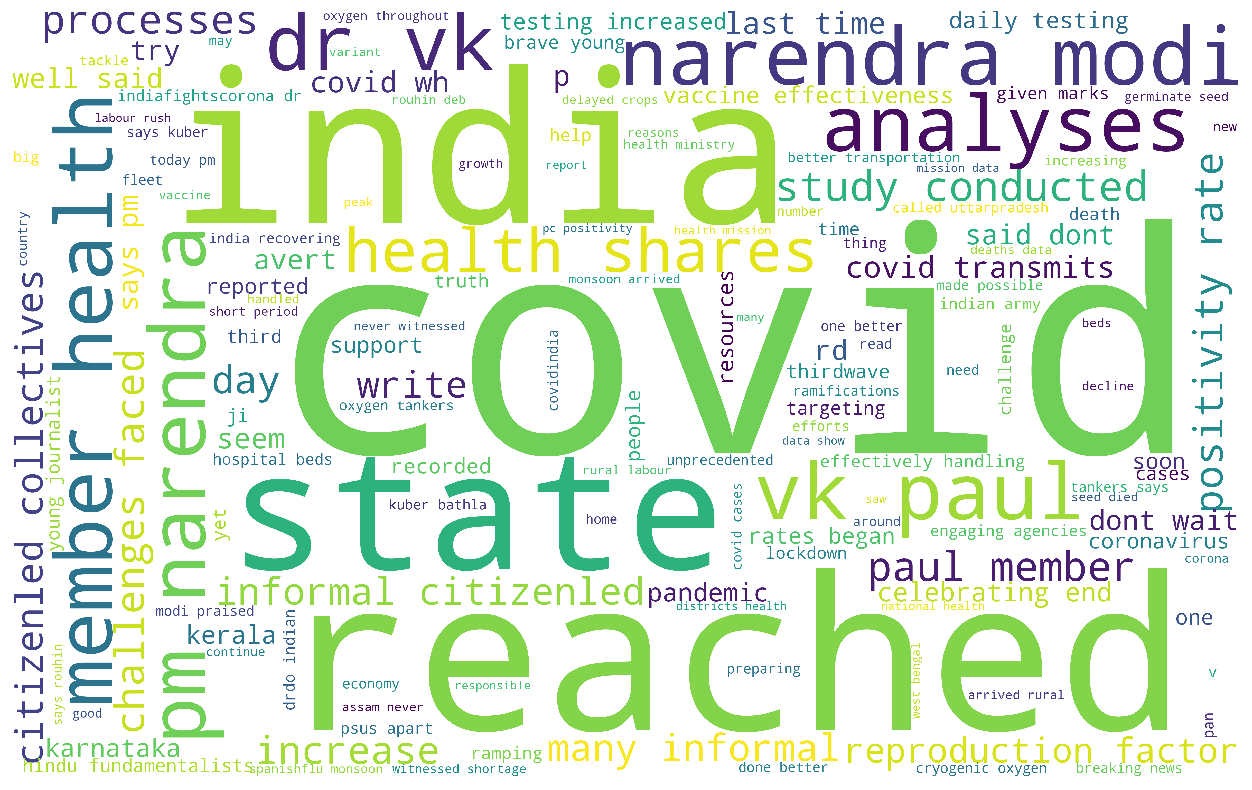

In [1610]:
pos_processed_doc_6 = []
for text in df_sec_positive['text'].str.lower():
    processed_text = re.sub(r"(?:\@|http?\://https?\://|www)\S+", "", text)
    processed_text = "".join(processed_text).strip()
    pos_processed_doc_6.append(processed_text)
    
pos_final_doc_6 =  pd.Series(pos_processed_doc_6)

pos_docs_tokens_6 = pos_final_doc_6.str.replace('[^a-z\s#@]', '').str.split(' ')

pos_tokens_6 = []
for tokens in pos_docs_tokens_6:
    pos_tokens_6.extend(tokens)

pos_strings_6 = ' '.join(pos_tokens_6)
pos_wc_6 = WordCloud(background_color='White', stopwords=all_stopwords_6,width=1600,height=1000,
               scale=3,max_words=150,random_state=837,font_step=1,mode='RGB',colormap='viridis').generate(pos_strings_6)
plt.figure(figsize=(40,10))
plt.imshow(pos_wc_6)
plt.axis('off');

##### Wordcloud of negative tweets

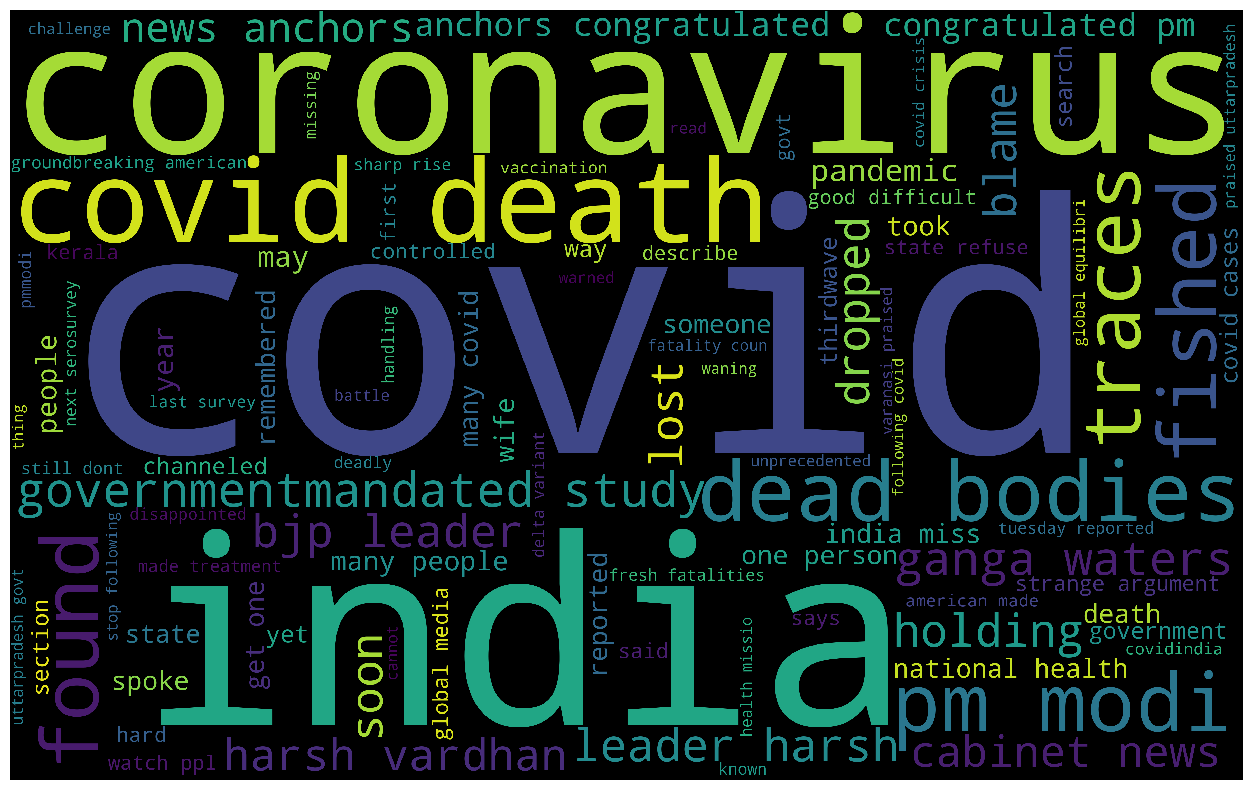

In [1611]:
neg_processed_doc_6 = []
for text in df_sec_negative['text'].str.lower():
    processed_text = re.sub(r"(?:\@|http?\://https?\://|www)\S+", "", text)
    processed_text = "".join(processed_text).strip()
    neg_processed_doc_6.append(processed_text)
    
neg_final_doc_6 =  pd.Series(neg_processed_doc_6)

neg_docs_tokens_6 = neg_final_doc_6.str.replace('[^a-z\s#@]', '').str.split(' ')

neg_tokens_6 = []
for tokens in neg_docs_tokens_6:
    neg_tokens_6.extend(tokens)

neg_strings_6 = ' '.join(neg_tokens_6)
neg_wc_6 = WordCloud(background_color='black', stopwords=all_stopwords_6,width=1600,height=1000,
               scale=3,max_words=150,random_state=612,font_step=1,mode='RGB',colormap='viridis',
                   min_font_size=20,max_font_size=450,prefer_horizontal=0.5).generate(neg_strings_6)
plt.figure(figsize=(40,10))
plt.imshow(neg_wc_6)
plt.axis('off');

##### Wordcloud of neutral tweets

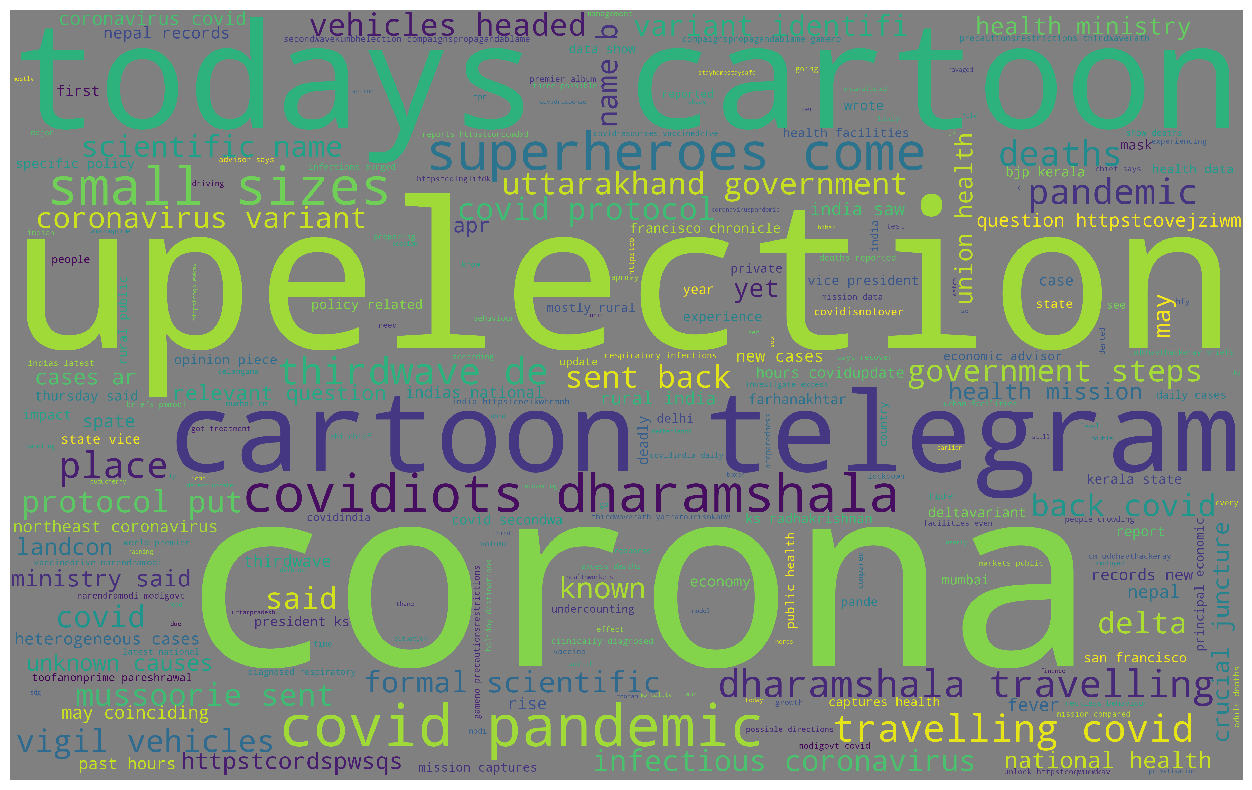

In [1617]:
neu_processed_doc_6 = []
for text in df_sec_neutral['text'].str.lower():
    processed_text = re.sub(r"(?:\@|http?\://https?\://|www)\S+", "", text)
    processed_text = "".join(processed_text).strip()
    neu_processed_doc_6.append(processed_text)
    
neu_final_doc_6 =  pd.Series(neu_processed_doc_6)

neu_docs_tokens_6 = neu_final_doc_6.str.replace('[^a-z\s#@]', '').str.split(' ')

neu_tokens_6 = []
for tokens in neu_docs_tokens_6:
    neu_tokens_6.extend(tokens)

neu_strings_6 = ' '.join(neu_tokens_6)
neu_wc_6 = WordCloud(background_color='gray', stopwords=all_stopwords_6,width=1600,height=1000,
               scale=3,max_words=250,random_state=837,font_step=1,mode='RGB',colormap='viridis').generate(neu_strings_6)
plt.figure(figsize=(40,10))
plt.imshow(neu_wc_6)
plt.axis('off');

### Model 2: Sentiment Analysis using Logistic Regression

In [1618]:
sec_log_senti = sec_senti.copy()

In [1619]:
sec_log_senti

created_at  likes  retweets      screen_name               source  \
0     16-07-2021 18:22      0        11   Rai_jijeevisha  Twitter for Android   
1     16-07-2021 17:57      0         0       kkmajumdar   Twitter for iPhone   
2     16-07-2021 17:57      0         0       kkmajumdar   Twitter for iPhone   
3     16-07-2021 17:37      0         5         prabha_j      Twitter Web App   
4     16-07-2021 17:31      0        19    PIBChandigarh  Twitter for Android   
...                ...    ...       ...              ...                  ...   
1905  08-07-2021 13:32     50         3         htTweets            TweetDeck   
1906  08-07-2021 13:25      0         2        rohit2093      Twitter Web App   
1907  08-07-2021 13:11      0         1  fiona_fionnagal      Twitter Web App   
1908  08-07-2021 13:07      0         1   BlayneyDeborah  Twitter for Android   
1909  08-07-2021 12:39      3         2        ApniShala  Twitter for Android   

                                                   text  \
0     RT @ArunDeshpande20: @myogiadityanath has been...   
1     @BBCNews Seriously #UK you seriously want #Fre...   
2     Seriously #UK you seriously want #FreedomDay c...   
3     RT @newslaundry: UP's peak positivity figure o...   
4     RT @PIB_India: Dr. VK Paul, Member (Health), @...   
...                                                 ...   
1905  "Rs 23,000 crores package to be given to deal ...   
1906  RT @ApniShala: A big thank you to all the part...   
1907  RT @BlayneyDeborah: @globalhlthtwit @MegHillie...   
1908  @globalhlthtwit @MegHillier @NAOorguk highly c...   
1909  A big thank you to all the participants for ma...   

                               user_name  sentiment score  
0                        PAWAN KUMAR RAI           0.4404  
1     Kaushik Majumdar #YNWA #LFCforlife           0.7590  
2     Kaushik Majumdar #YNWA #LFCforlife           0.7590  
3                   for Aslan! پربھا آپا           0.2960  
4                      PIB in Chandigarh           0.2960  
...                                  ...              ...  
1905                     Hindustan Times          -0.4019  
1906                               Rohit           0.3612  
1907               Sniomhadair MacKenzie          -0.4376  
1908                     deborah blayney          -0.8064  
1909                          Apni Shala           0.3612  

[1910 rows x 8 columns]

In [1620]:
sentiment_sec = []
for score in sec_log_senti['sentiment score']:
    if score > 0:
        sentiment_sec.append('Positive')
    elif score < 0:
        sentiment_sec.append('Negative')
    else:
        sentiment_sec.append('Neutral')

In [1621]:
sec_log_senti['sentiment'] = sentiment_sec

In [1622]:
sec_log_senti

created_at  likes  retweets      screen_name               source  \
0     16-07-2021 18:22      0        11   Rai_jijeevisha  Twitter for Android   
1     16-07-2021 17:57      0         0       kkmajumdar   Twitter for iPhone   
2     16-07-2021 17:57      0         0       kkmajumdar   Twitter for iPhone   
3     16-07-2021 17:37      0         5         prabha_j      Twitter Web App   
4     16-07-2021 17:31      0        19    PIBChandigarh  Twitter for Android   
...                ...    ...       ...              ...                  ...   
1905  08-07-2021 13:32     50         3         htTweets            TweetDeck   
1906  08-07-2021 13:25      0         2        rohit2093      Twitter Web App   
1907  08-07-2021 13:11      0         1  fiona_fionnagal      Twitter Web App   
1908  08-07-2021 13:07      0         1   BlayneyDeborah  Twitter for Android   
1909  08-07-2021 12:39      3         2        ApniShala  Twitter for Android   

                                                   text  \
0     RT @ArunDeshpande20: @myogiadityanath has been...   
1     @BBCNews Seriously #UK you seriously want #Fre...   
2     Seriously #UK you seriously want #FreedomDay c...   
3     RT @newslaundry: UP's peak positivity figure o...   
4     RT @PIB_India: Dr. VK Paul, Member (Health), @...   
...                                                 ...   
1905  "Rs 23,000 crores package to be given to deal ...   
1906  RT @ApniShala: A big thank you to all the part...   
1907  RT @BlayneyDeborah: @globalhlthtwit @MegHillie...   
1908  @globalhlthtwit @MegHillier @NAOorguk highly c...   
1909  A big thank you to all the participants for ma...   

                               user_name  sentiment score sentiment  
0                        PAWAN KUMAR RAI           0.4404  Positive  
1     Kaushik Majumdar #YNWA #LFCforlife           0.7590  Positive  
2     Kaushik Majumdar #YNWA #LFCforlife           0.7590  Positive  
3                   for Aslan! پربھا آپا           0.2960  Positive  
4                      PIB in Chandigarh           0.2960  Positive  
...                                  ...              ...       ...  
1905                     Hindustan Times          -0.4019  Negative  
1906                               Rohit           0.3612  Positive  
1907               Sniomhadair MacKenzie          -0.4376  Negative  
1908                     deborah blayney          -0.8064  Negative  
1909                          Apni Shala           0.3612  Positive  

[1910 rows x 9 columns]

In [1623]:
sec_log_df_final = sec_log_senti[['text','sentiment']]

In [1624]:
sec_log_df_final

text sentiment
0     RT @ArunDeshpande20: @myogiadityanath has been...  Positive
1     @BBCNews Seriously #UK you seriously want #Fre...  Positive
2     Seriously #UK you seriously want #FreedomDay c...  Positive
3     RT @newslaundry: UP's peak positivity figure o...  Positive
4     RT @PIB_India: Dr. VK Paul, Member (Health), @...  Positive
...                                                 ...       ...
1905  "Rs 23,000 crores package to be given to deal ...  Negative
1906  RT @ApniShala: A big thank you to all the part...  Positive
1907  RT @BlayneyDeborah: @globalhlthtwit @MegHillie...  Negative
1908  @globalhlthtwit @MegHillier @NAOorguk highly c...  Negative
1909  A big thank you to all the participants for ma...  Positive

[1910 rows x 2 columns]

In [1625]:
docs_log_sec = sec_log_df_final['text'].str.lower().str.replace('[^a-z\s]', '')
docs_log_sec = docs_log_sec.apply(remove_stopwords)
stemmer = PorterStemmer()
docs_log_sec = stemmer.stem_documents(docs_log_sec)

In [1626]:
train_docs_log_sec, test_docs_log_sec = train_test_split(pd.Series(docs_log_sec), test_size=0.2, random_state=1)


vectorizer_log_sec = CountVectorizer().fit(train_docs_log_sec)
vocab_log_sec = vectorizer_log_sec.get_feature_names()

train_dtm_log_sec = vectorizer_log_sec.transform(train_docs_log_sec)
test_dtm_log_sec= vectorizer_log_sec.transform(test_docs_log_sec)

train_y_log_sec = sec_log_df_final.loc[train_docs_log_sec.index, 'sentiment']
test_y_log_sec = sec_log_df_final.loc[test_docs_log_sec.index, 'sentiment']
print(train_y_log_sec.shape)
print(test_y_log_sec.shape)

(1528,)
(382,)


In [1627]:
train_dtm_log_sec

<1528x2457 sparse matrix of type '<class 'numpy.int64'>'
	with 18657 stored elements in Compressed Sparse Row format>

In [1628]:
test_dtm_log_sec

<382x2457 sparse matrix of type '<class 'numpy.int64'>'
	with 4222 stored elements in Compressed Sparse Row format>

In [1630]:
logistic_model_sec = LogisticRegression().fit(train_dtm_log_sec, train_y_log_sec)
test_y_log_pred_sec = logistic_model_sec.predict(test_dtm_log_sec)
print('Accuracy score: ', accuracy_score(test_y_log_sec, test_y_log_pred_sec))
print('F1 score: ', f1_score(test_y_log_sec, test_y_log_pred_sec,average='weighted'))

Accuracy score:  0.9057591623036649
F1 score:  0.9047527697632664


In [1631]:
print(confusion_matrix(test_y_log_sec, test_y_log_pred_sec))

[[ 49   4  11]
 [  2 223   6]
 [  2  11  74]]


In [1632]:
print(classification_report(test_y_log_sec, test_y_log_pred_sec))

              precision    recall  f1-score   support

    Negative       0.92      0.77      0.84        64
     Neutral       0.94      0.97      0.95       231
    Positive       0.81      0.85      0.83        87

    accuracy                           0.91       382
   macro avg       0.89      0.86      0.87       382
weighted avg       0.91      0.91      0.90       382



### Model 3: Sentiment Analysis using NaiveBayes Algorithm

In [1633]:
docs_mnb_sec = sec_log_df_final['text'].str.lower().str.replace('[^a-z\s]', '')
docs_mnb_sec = docs_mnb_sec.apply(remove_stopwords)
stemmer = PorterStemmer()
docs_mnb_sec = stemmer.stem_documents(docs_mnb_sec)

train_docs_mnb_sec, test_docs_mnb_sec = train_test_split(pd.Series(docs_mnb_sec), test_size=0.2, random_state=1)


vectorizer_mnb_sec = CountVectorizer().fit(train_docs_mnb_sec)
vocab_mnb_sec = vectorizer_mnb_sec.get_feature_names()

train_dtm_mnb_sec = vectorizer_mnb_sec.transform(train_docs_mnb_sec)
test_dtm_mnb_sec= vectorizer_mnb_sec.transform(test_docs_mnb_sec)

train_y_mnb_sec = sec_log_df_final.loc[train_docs_mnb_sec.index, 'sentiment']
test_y_mnb_sec = sec_log_df_final.loc[test_docs_mnb_sec.index, 'sentiment']

In [1634]:
train_dtm_mnb_sec

<1528x2457 sparse matrix of type '<class 'numpy.int64'>'
	with 18657 stored elements in Compressed Sparse Row format>

In [1635]:
test_dtm_mnb_sec

<382x2457 sparse matrix of type '<class 'numpy.int64'>'
	with 4222 stored elements in Compressed Sparse Row format>

In [1637]:
mnb_model_sec = MultinomialNB().fit(train_dtm_mnb_sec, train_y_mnb_sec)
test_y_mnb_pred_sec = mnb_model_sec.predict(test_dtm_mnb_sec)
print('Accuracy score: ', accuracy_score(test_y_mnb_sec, test_y_mnb_pred_sec))
print('F1 score: ', f1_score(test_y_mnb_sec, test_y_mnb_pred_sec,average='weighted'))

Accuracy score:  0.8691099476439791
F1 score:  0.8729181783144422


In [1638]:
print(confusion_matrix(test_y_mnb_sec, test_y_mnb_pred_sec))

[[ 50   0  14]
 [  5 208  18]
 [  7   6  74]]


In [1639]:
print(classification_report(test_y_mnb_sec, test_y_mnb_pred_sec))

              precision    recall  f1-score   support

    Negative       0.81      0.78      0.79        64
     Neutral       0.97      0.90      0.93       231
    Positive       0.70      0.85      0.77        87

    accuracy                           0.87       382
   macro avg       0.83      0.84      0.83       382
weighted avg       0.88      0.87      0.87       382



##### Polarity Analysis

In [1653]:
sec_senti[['sentiment score']].describe()

sentiment score
count      1910.000000
mean          0.019200
std           0.309321
min          -0.937500
25%           0.000000
50%           0.000000
75%           0.000000
max           0.920100

Conclusion: The polarity of the tweets with the hashtag "#secondwave" are more or less neutral

### Inferences


- It was observed that the performance of the Logistic Regression model was better than the Multinomial NaiveBayes model for the different profiles analysed


- The tweets analysed for the keyword "donald trump" had an almost equal distribution of positive, negative and neutral tweets, and consequently the models built on these tweets performed the best achieving an accuracy of upto 93.1% and an F1 score of 0.93, thereby proving the fact that class imbalance plays a factor in the model performance


- The polarity scores provided by the VADER algorithm and TextBlob algorithm were almost comparable, except for a few instances of discrepancies, and after careful analysis, we concluded that the VADER algorithm was slightly better in terms of the sentiment prediction